In [1]:
#import ipywidgets as widgets
#%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dft = pd.read_excel('descriptors.xlsx', sheet_name='DFT_data')
xtb = pd.read_excel('descriptors.xlsx', sheet_name='XTB_data_noNi')
com = pd.read_csv('Commercial_only.csv')

In [3]:
com.head()

Unnamed: 0                                             smiles  pat  \
0           1  CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...  pc3   
1           2   CN(C)c1cccc(N(C)C)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1  pc3   
2           3         COc1cccc(OC)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1  pc3   
3           4  CC(C)Oc1cccc(OC(C)C)c1-c1ccccc1P(C1CCCCC1)C1CC...  pc3   
4           5             c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1  pc3   

   pat_enc  ph  ph3  pb  pb3  pc  pc3  ...  pc2o1  po1n2  po2n1  pcn  pco  \
0        0   0    0   0    0   1    1  ...      0      0      0    0    0   
1        0   0    0   0    0   1    1  ...      0      0      0    0    0   
2        0   0    0   0    0   1    1  ...      0      0      0    0    0   
3        0   0    0   0    0   1    1  ...      0      0      0    0    0   
4        0   0    0   0    0   1    1  ...      0      0      0    0    0   

   pon  par3  buch  ring  com  
0    0     0     1     0    1  
1    0     0     1     0    1  
2    0     0     1     0    1  
3    0     0     1     0    1  
4    0     0     1     0    1  

[5 rows x 33 columns]

In [4]:
# collating dft and xtb data together

smiles = []
dft_E = []
xtb_cone = []
dft_vbur1 = []
dft_vbur2 = []


for i in range(len(xtb['smiles'])):
    xtb_smiles = xtb['smiles'][i]
    for j in range(len(dft['smiles'])):
        dft_smiles = dft['smiles'][j]
        if xtb_smiles == dft_smiles:
            xtb_cone.append(xtb['cone_angle_boltz'][i])
            dft_E.append(dft['nbo_bds_e_min_boltz'][j])
            smiles.append(xtb_smiles)
            dft_vbur1.append(dft['vbur_ovbur_min_boltz'][j])
            dft_vbur2.append(dft['vbur_ovtot_min_max'][j])

print('dft_E: ', dft_E, '/nlength:', len(dft_E))
print('')
print('xtb_cone: ', xtb_cone, '/nlength:', len(xtb_cone))
print('')
print('smiles: ', smiles, '/nlength:', len(smiles))
        

dft_E:  [0.203063797, 0.21133822, 0.209768238, 0.210560779, 0.200092159, 0.19322, 0.230351075, 0.17692, 0.232030233, 0.201408912, 0.200299413, 0.18192, 0.17381, 0.18211, 0.239869375, 0.19365, 0.22426, 0.23111, 0.180170638, 0.20328868, 0.200551486, 0.20119, 0.222572705, 0.226085654, 0.224142295, 0.196842006, 0.237268531, 0.213139424, 0.193332222, 0.184769515, 0.18062, 0.183342272, 0.196847605, 0.212814657, 0.208051386, 0.182375, 0.184845267, 0.204497063, 0.200483945, 0.222108472, 0.192705404, 0.1832527, 0.198116758, 0.20112905, 0.198833767, 0.20125202, 0.193073721, 0.200558067, 0.243254217, 0.24683782, 0.237139844, 0.251381197, 0.24801249, 0.217833874, 0.242592771, 0.241479472, 0.233734937, 0.243708795, 0.226242477, 0.24855, 0.21163, 0.234671213, 0.233157643, 0.196829869, 0.18211532, 0.199997039, 0.199019953, 0.198602467, 0.206675558, 0.210249773, 0.17033, 0.199080028, 0.194417231, 0.200130281, 0.165214365, 0.231252281, 0.190492901, 0.181073685, 0.19155465, 0.197607004, 0.19825, 0.22895

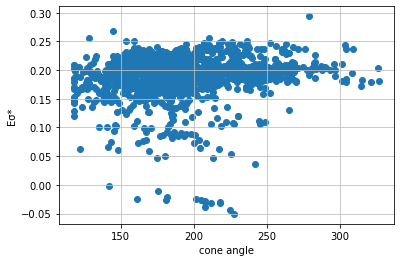

In [5]:
plt.scatter(xtb_cone,dft_E)
plt.xlabel('cone angle')
plt.ylabel('Eσ*')
plt.grid(True,linestyle='-',color='0.75')
plt.show()

v v v Find Commercial Scatterplot v v v

In [6]:
com_cone = []
com_E = []
smiles_com = []
vbur1_com = []
vbur2_com = []

for i in range(len(com['smiles'])):
    com_smiles = com['smiles'][i]
    for j in range(len(xtb['smiles'])):
        xtb_com_smiles = xtb['smiles'][j]
        if com_smiles == xtb_com_smiles:
            for k in range(len(dft['smiles'])):
                dft_com_smiles = dft['smiles'][k]
                if com_smiles == dft_com_smiles:
                    smiles_com.append(com['smiles'][i])
                    com_cone.append(xtb['cone_angle_boltz'][j])
                    com_E.append(dft['nbo_bds_e_min_boltz'][k])
                    vbur1_com.append(dft['vbur_ovbur_min_boltz'][k])
                    vbur2_com.append(dft['vbur_ovtot_min_max'][k])
                    
for i in range(len(smiles_com)):
    print(i+1,":smiles:",smiles_com[i])
    print('cone angle:',com_cone[i])
    print('nbo_bds_e_min_boltz:',com_E[i],'\n')

1 :smiles: CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2)c(C(C)C)c1
cone angle: 263.535019873238
nbo_bds_e_min_boltz: 0.203063797 

2 :smiles: CN(C)c1cccc(N(C)C)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1
cone angle: 282.789544205036
nbo_bds_e_min_boltz: 0.21133822 

3 :smiles: COc1cccc(OC)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1
cone angle: 233.115763052694
nbo_bds_e_min_boltz: 0.209768238 

4 :smiles: CC(C)Oc1cccc(OC(C)C)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1
cone angle: 267.157078213112
nbo_bds_e_min_boltz: 0.210560779 

5 :smiles: c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1
cone angle: 257.640380608451
nbo_bds_e_min_boltz: 0.200092159 

6 :smiles: C1C2CC3CC1CC(P(C14CC5CC(CC(C5)C1)C4)C14CC5CC(CC(C5)C1)C4)(C2)C3
cone angle: 191.137671768411
nbo_bds_e_min_boltz: 0.19322 

7 :smiles: COc1cccc(OC)c1-c1ccccc1P(c1ccccc1)c1ccccc1
cone angle: 225.612021499661
nbo_bds_e_min_boltz: 0.230351075 

8 :smiles: CC(C)(C)P(C(C)(C)C)C(C)(C)C
cone angle: 190.012647754329
nbo_bds_e_min_boltz: 0.17692 

9 :smiles: Cc1ccccc1P(c1ccccc1C)c1

nbo_bds_e_min_boltz: 0.142330153 

346 :smiles: COP(c1ccccc1)N(C(C)C)C(C)C
cone angle: 176.181164516381
nbo_bds_e_min_boltz: 0.189364956 

347 :smiles: CCCCP(CCCC)N(C(C)C)C(C)C
cone angle: 215.372663131718
nbo_bds_e_min_boltz: 0.210169188 

348 :smiles: CCCCNC(=O)P(c1ccccc1)c1ccccc1
cone angle: 153.203161164044
nbo_bds_e_min_boltz: 0.171477619 

349 :smiles: CP(c1ccccc1)c1nc(C#N)c(C#N)nc1Cl
cone angle: 159.006023348557
nbo_bds_e_min_boltz: 0.168535144 

350 :smiles: C=C(C)COP(OCC(=C)C)c1ccccc1
cone angle: 206.134948218096
nbo_bds_e_min_boltz: 0.193930235 

351 :smiles: CN(C)P(c1ccc([N+](=O)[O-])cc1)N(C)C
cone angle: 166.949228869658
nbo_bds_e_min_boltz: 0.211689647 

352 :smiles: CCOP(OCC)c1ccc(Cl)cc1
cone angle: 178.604965585008
nbo_bds_e_min_boltz: 0.194068458 

353 :smiles: CC(C)OP(OC(C)C)c1ccc(Cl)cc1
cone angle: 197.573676461329
nbo_bds_e_min_boltz: 0.196969153 

354 :smiles: CCOP(OCC)c1ccc(Cl)cc1Cl
cone angle: 195.707518014272
nbo_bds_e_min_boltz: 0.191992367 

355 :smiles: CCOP(O

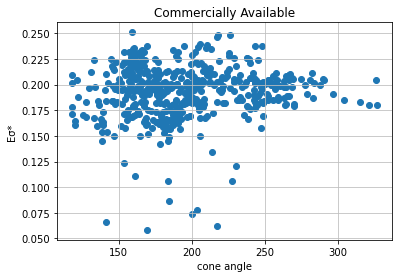

In [7]:
plt.scatter(com_cone,com_E)
plt.title("Commercially Available")
plt.xlabel('cone angle')
plt.ylabel('Eσ*')
plt.grid(True,linestyle='-',color='0.75')
plt.show()

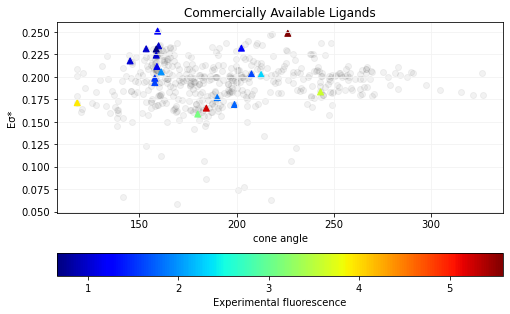

In [8]:
index = ['1','2','3','5','7','8','9','13','15','16','18','19','21','25','34','D','E','F','G','H']

# z = fluor_expr
z = [1.28,1.98,3.93,1.03,1.52,1.76,0.99,1.14,0.97,3.59,0.66,1.6,1.84,3.1,1.02,5.593258117,5.233991467,1.619285044,2.314440782,1.187104168]
# x = cone angle
x = [202.4289064,161.1591651,117.9945617,145.193538,157.8881569,198.8856236,153.454599,158.9825776,159.8444741,243.1309972,158.6354572,157.8976104,190.0126478,179.9976285,158.6208107,226.30297,184.390302,207.6134749,212.5677198,159.3299818] 
# y = nbo_bds_e_min_boltz
y = [0.232030233,0.20561503,0.17124,0.217833874,0.198499748,0.169229601,0.23131,0.21163,0.234671213,0.1832527,0.23111,0.19365,0.17692,0.158602365,0.22426,0.24855,0.165214365,0.20328868,0.202589283,0.25102] 

plt.figure(figsize=(8,5))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.scatter(com_cone,com_E, c='black',alpha=0.05)
plt.scatter(x,y,c=z,cmap='jet',marker='^')
plt.title("Commercially Available Ligands")
plt.xlabel('cone angle')
plt.ylabel('Eσ*')
plt.grid(True,linestyle='-',color='0.95')
plt.colorbar(label="Experimental fluorescence", orientation="horizontal")
plt.show()
 

In [9]:
from rdkit import Chem
from rdkit.Chem import Draw

/Users/tht13/opt/anaconda3/lib/python3.9/site-packages/rdkit/Chem/Draw/mplCanvas.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self._figure = figure(figsize=figsize)


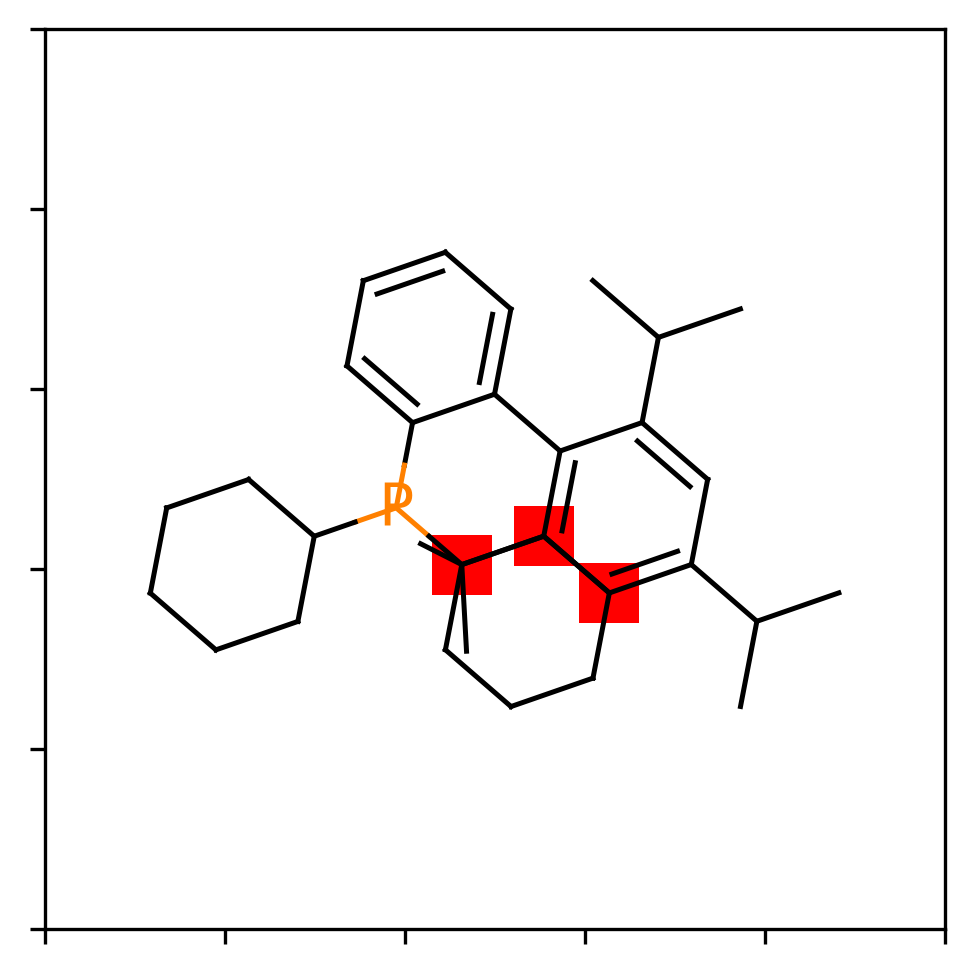

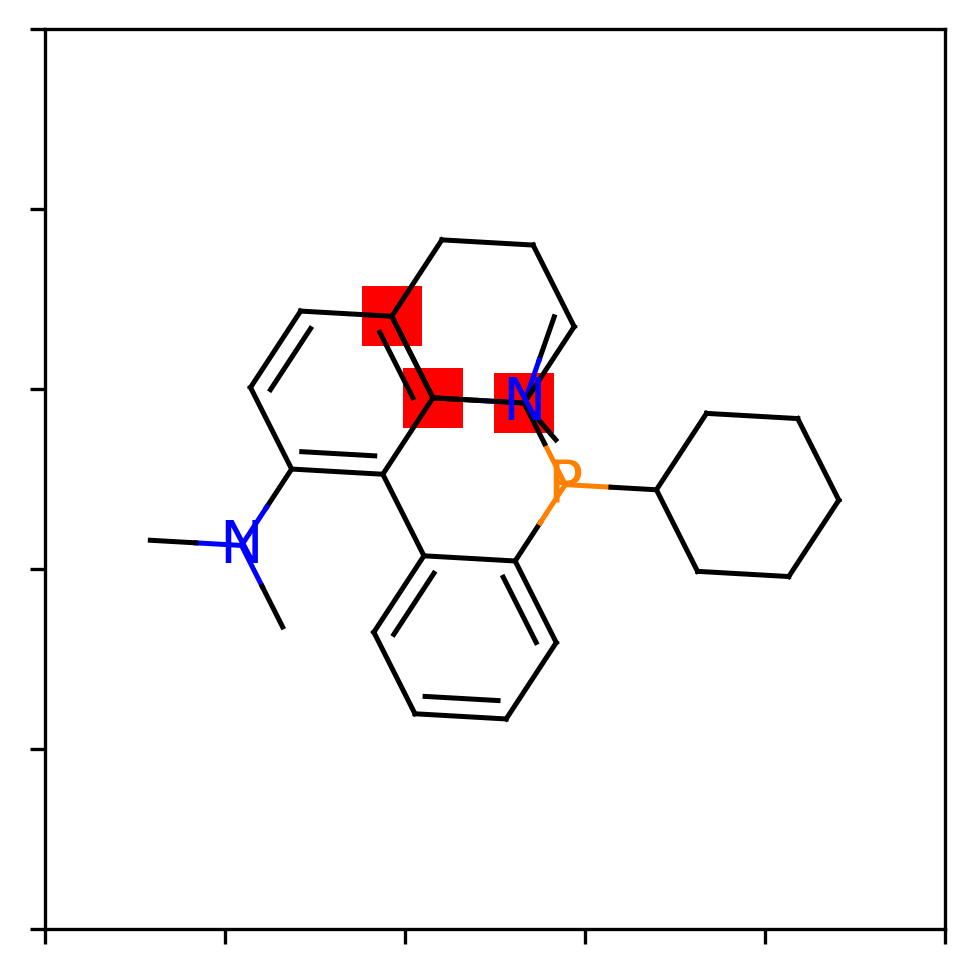

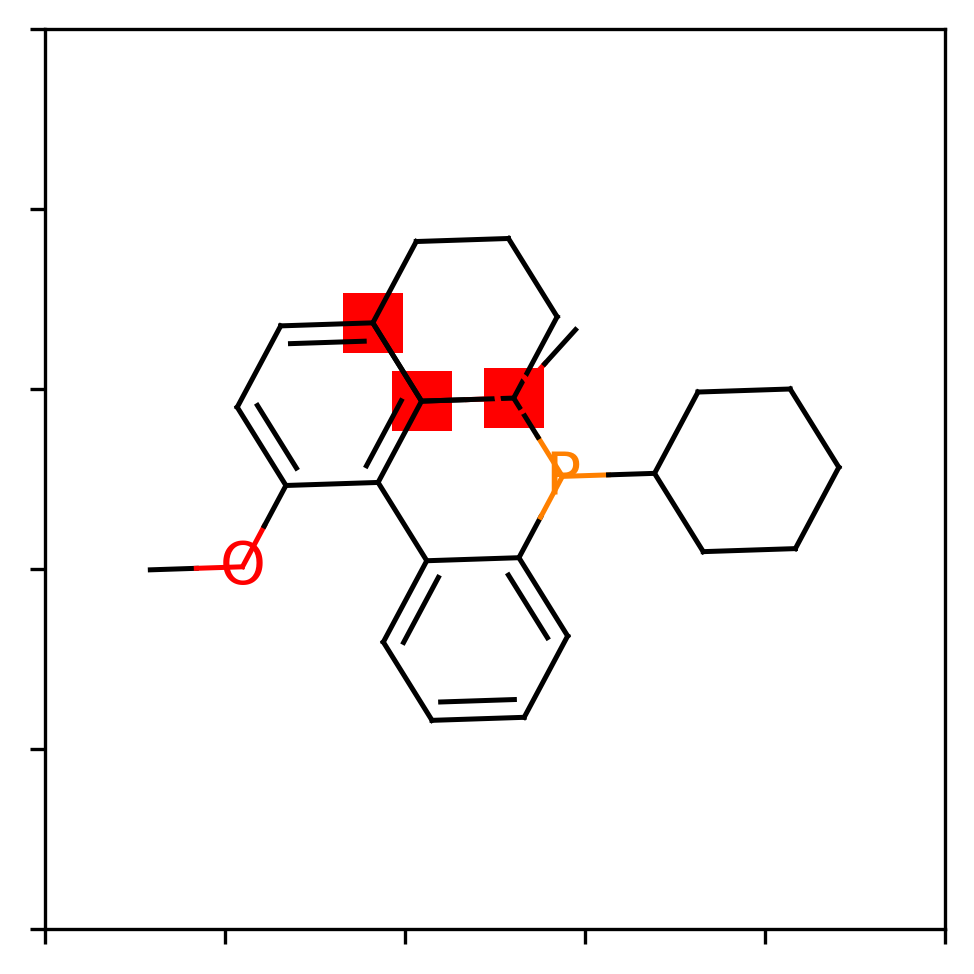

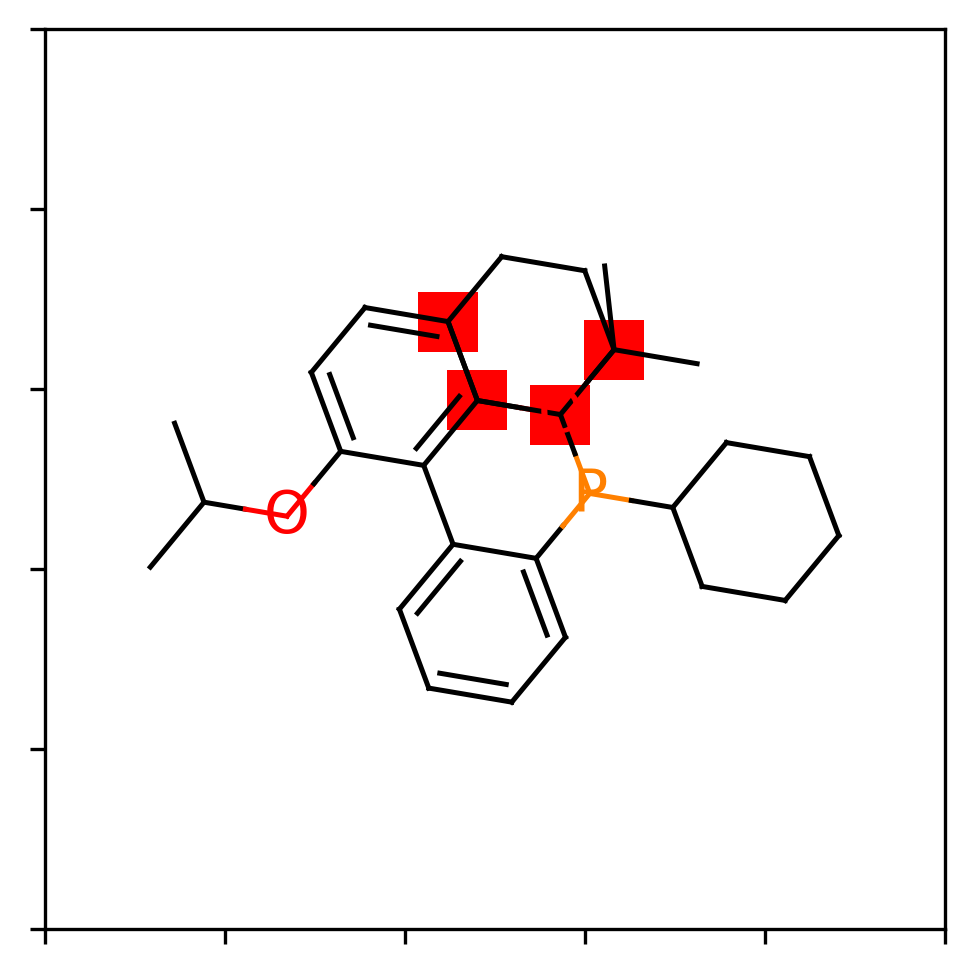

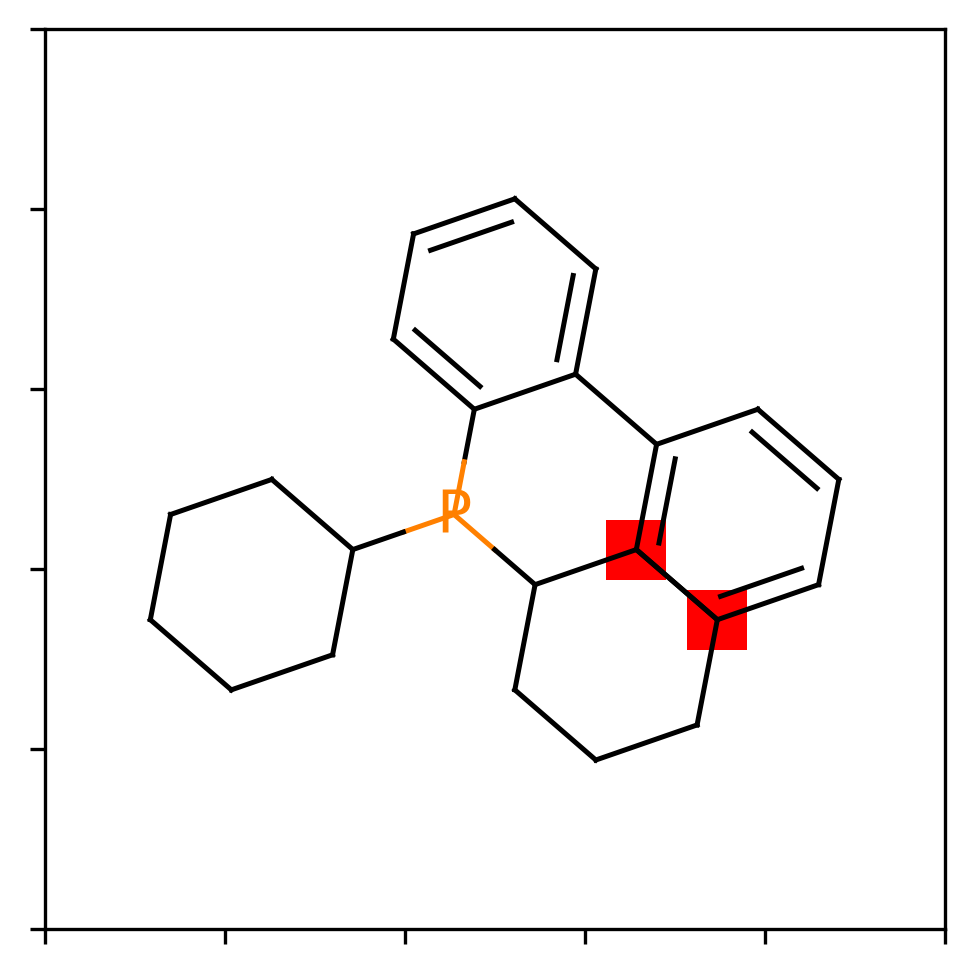

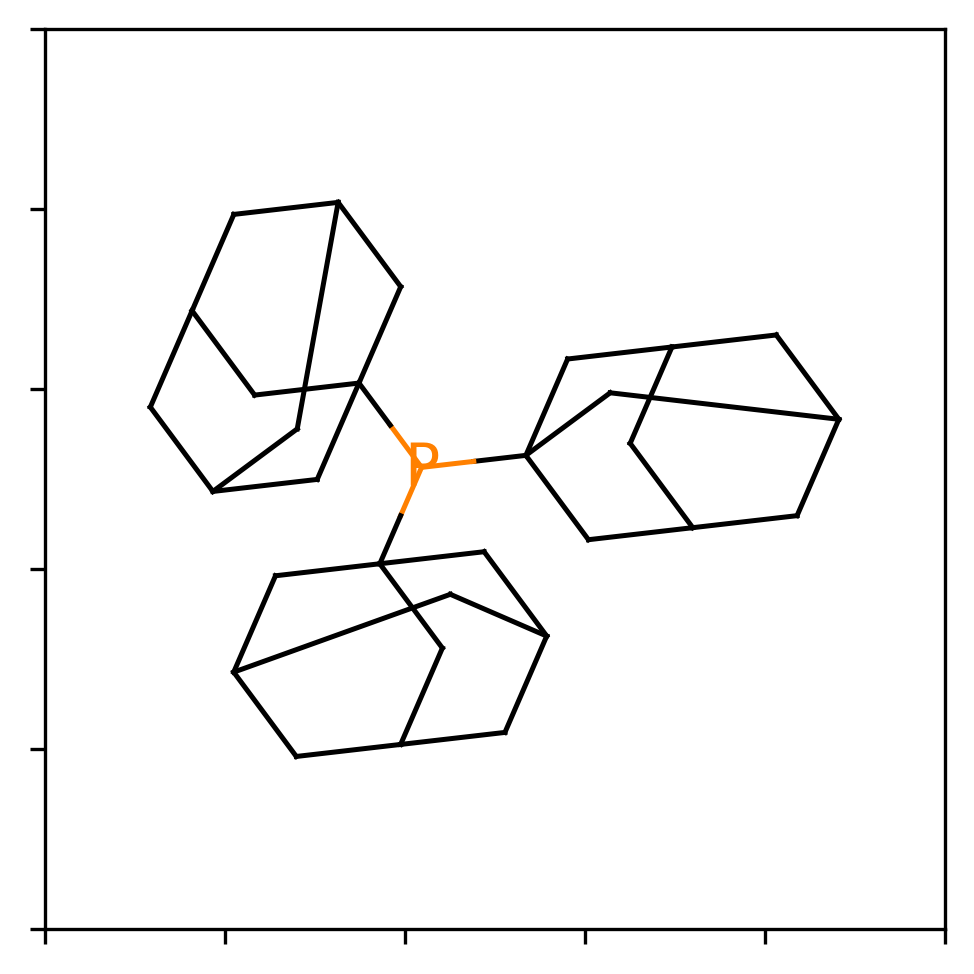

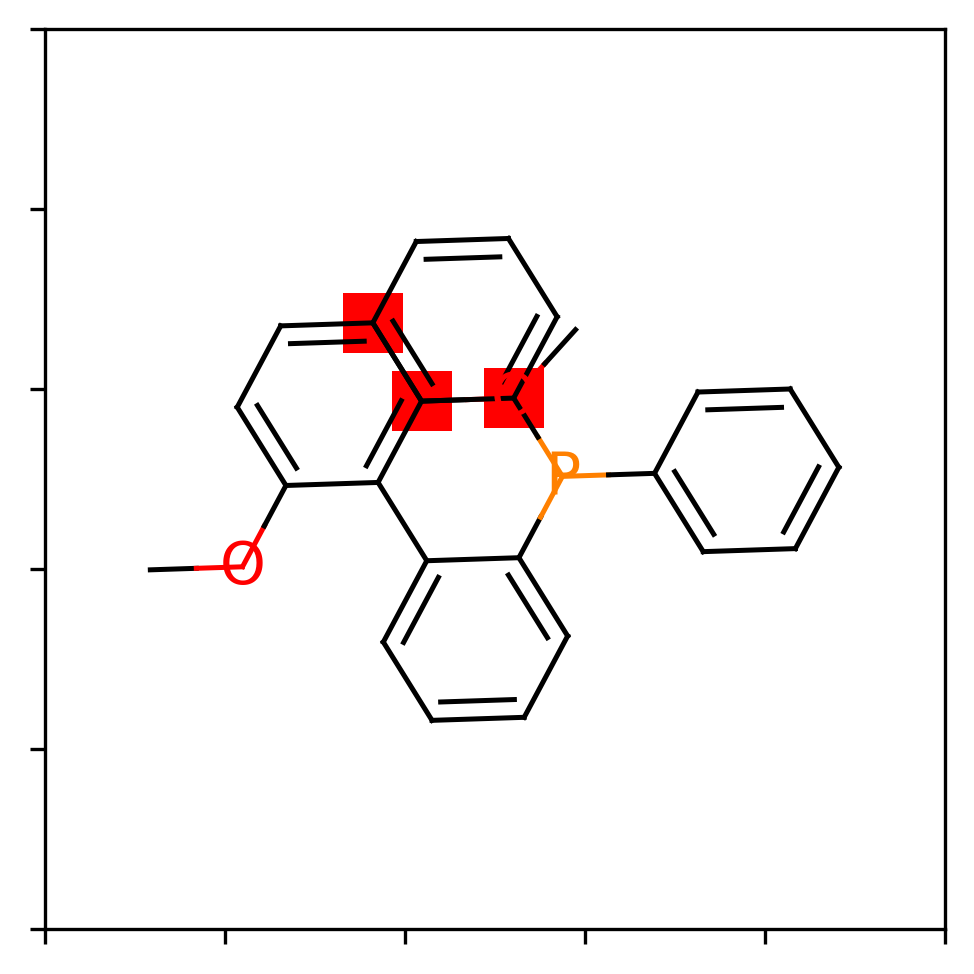

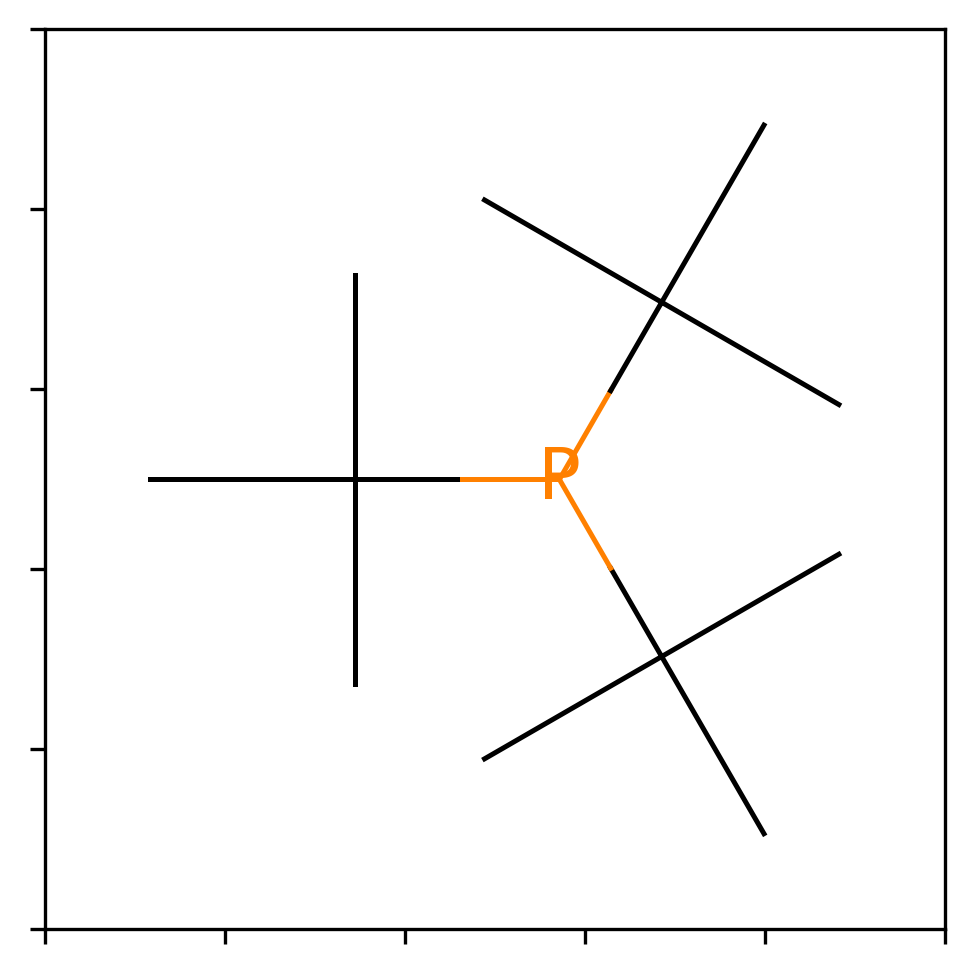

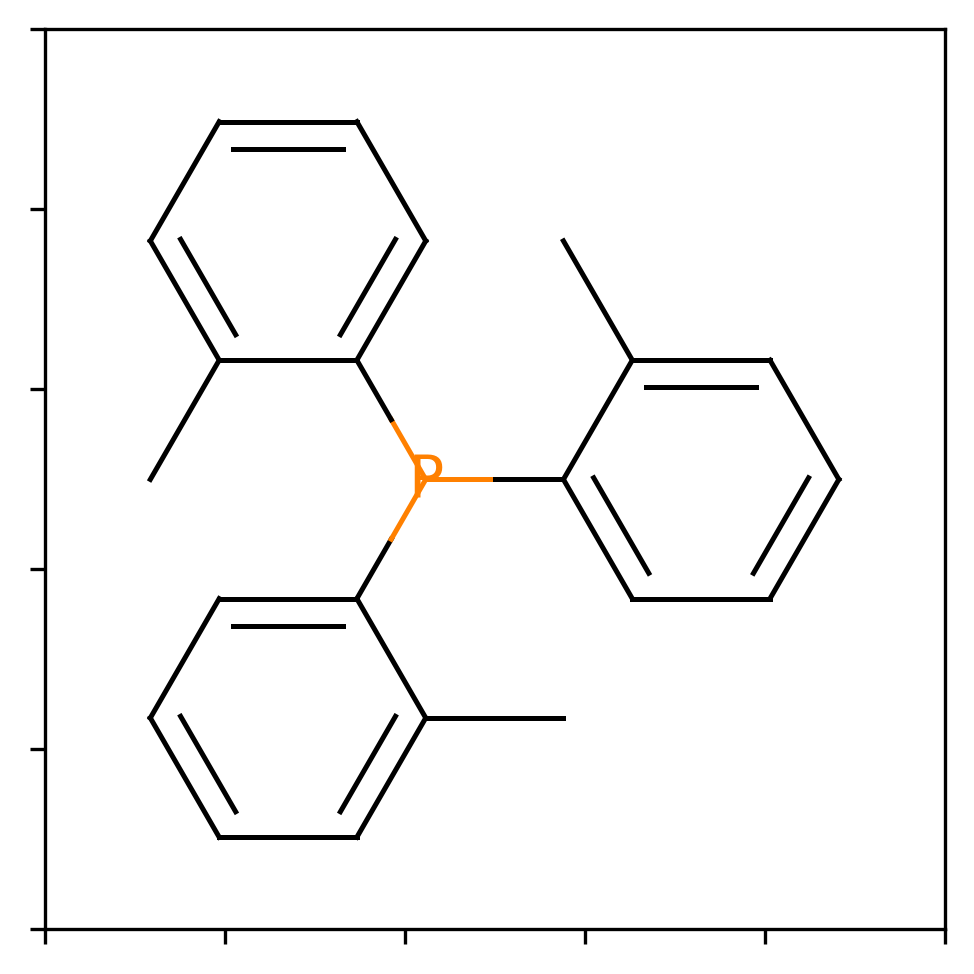

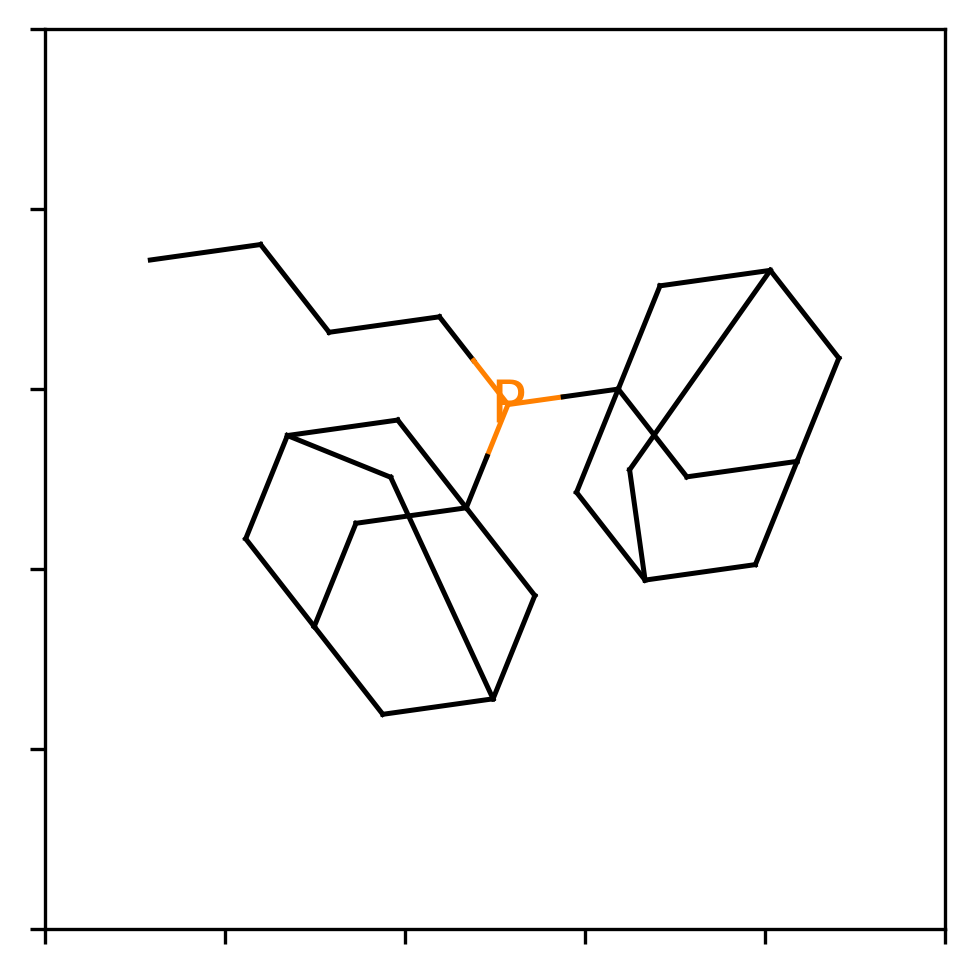

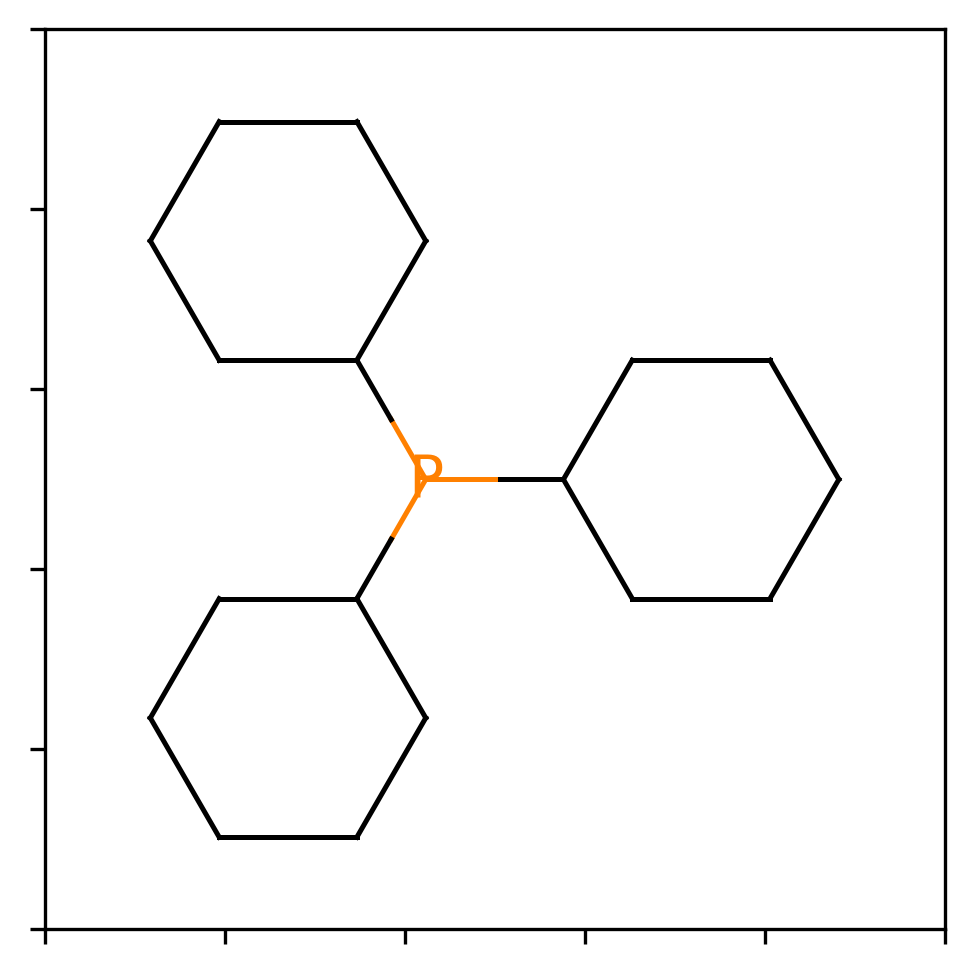

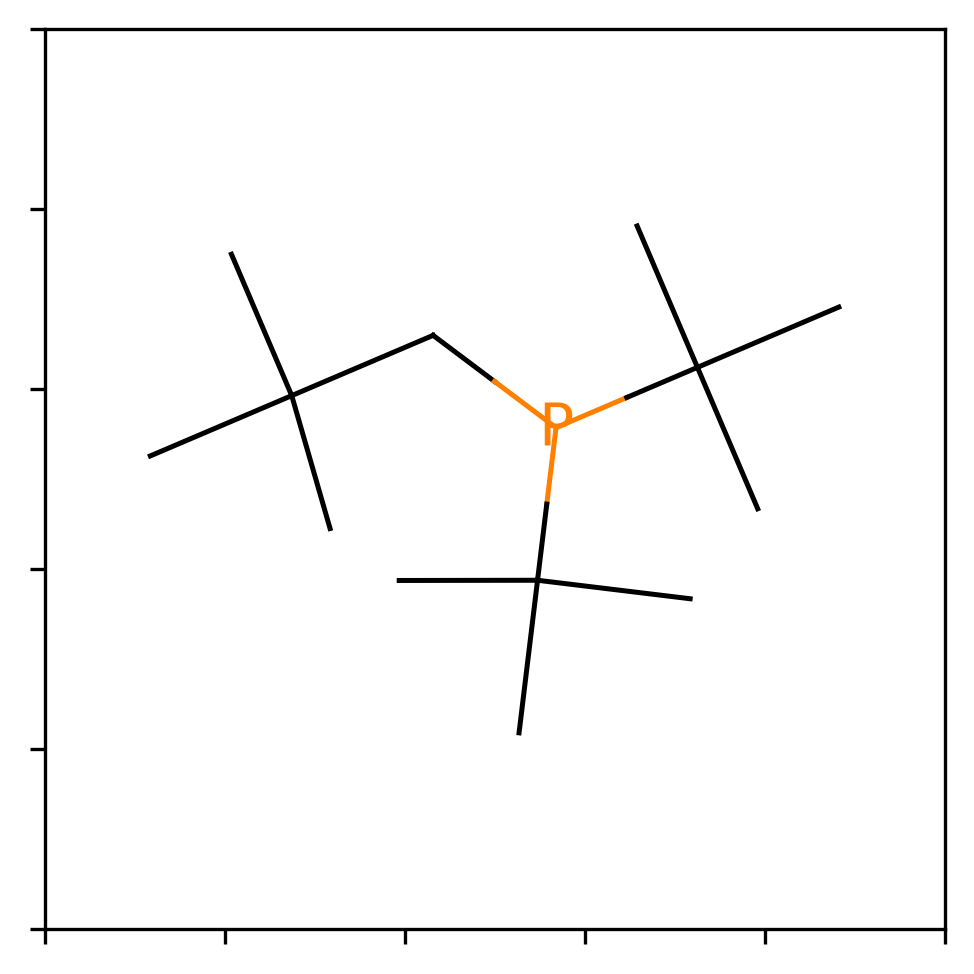

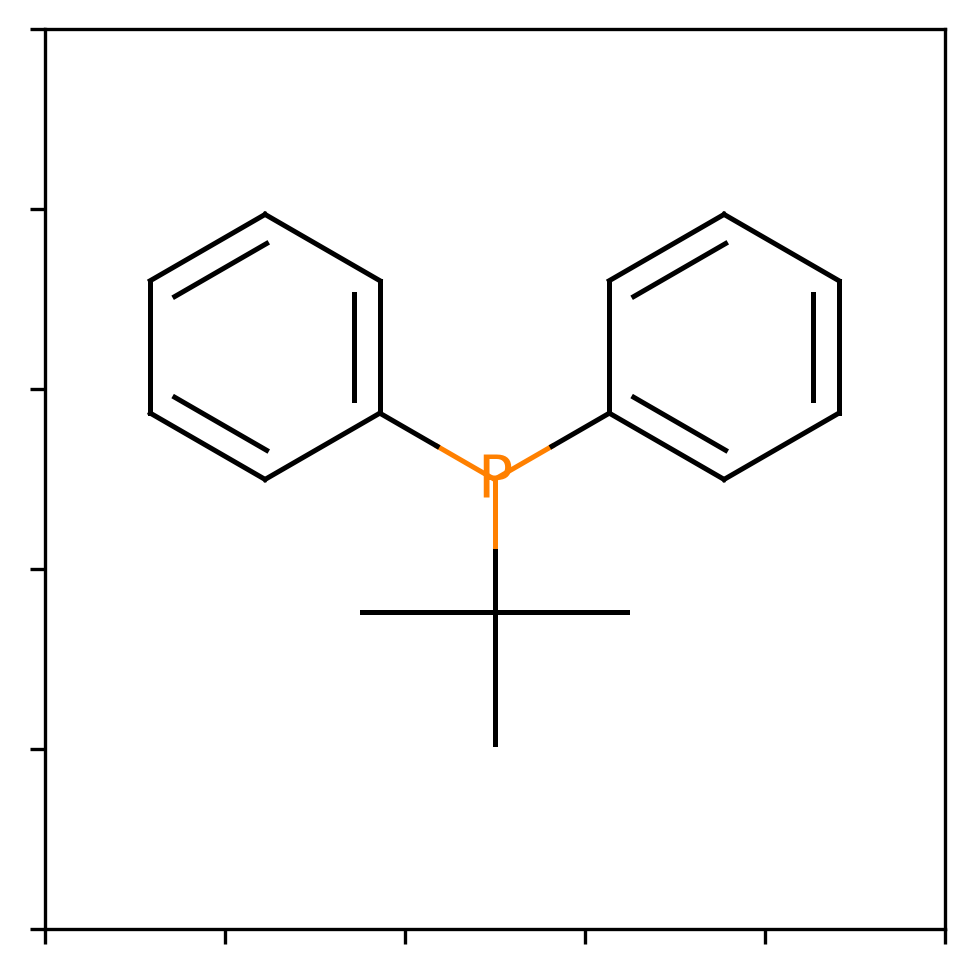

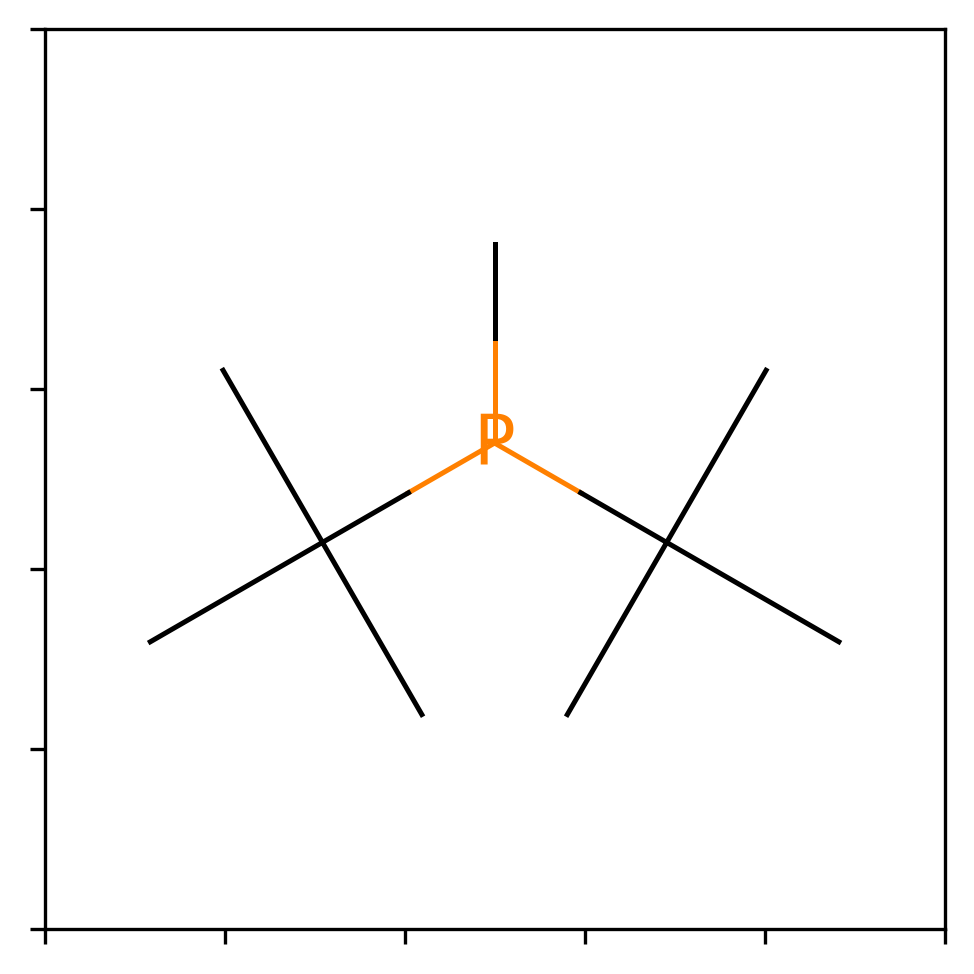

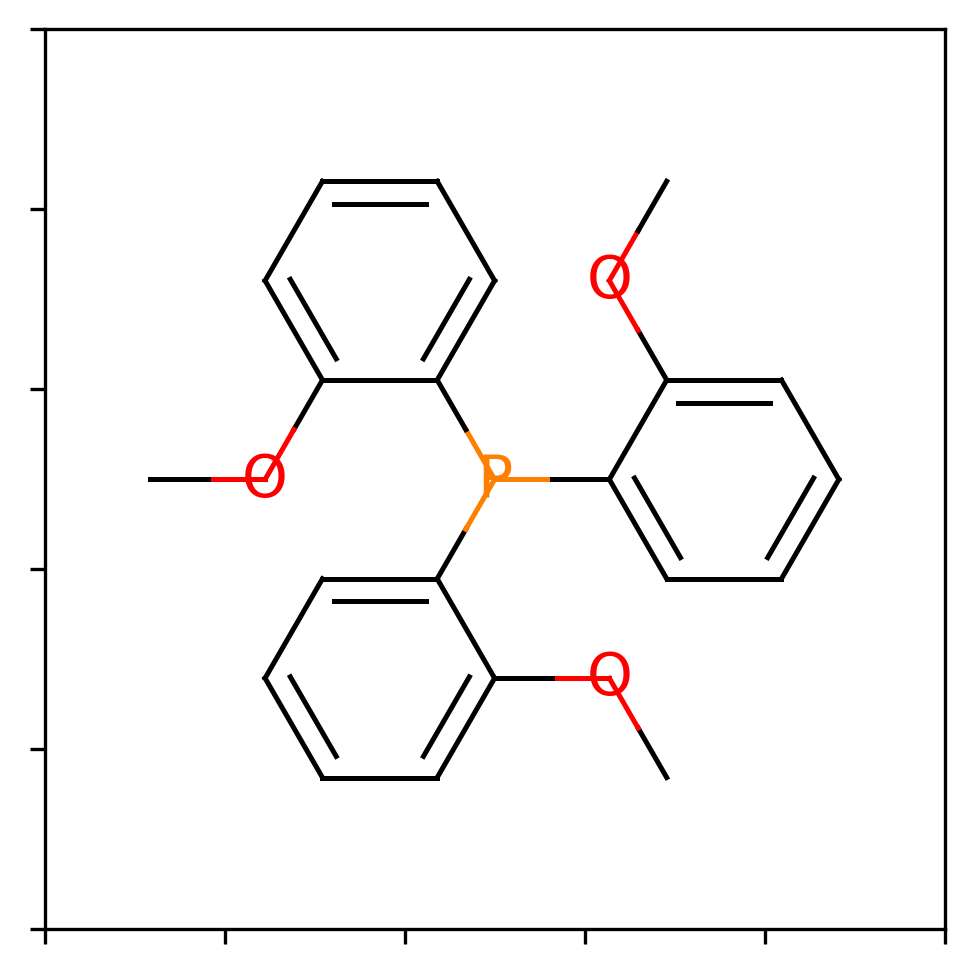

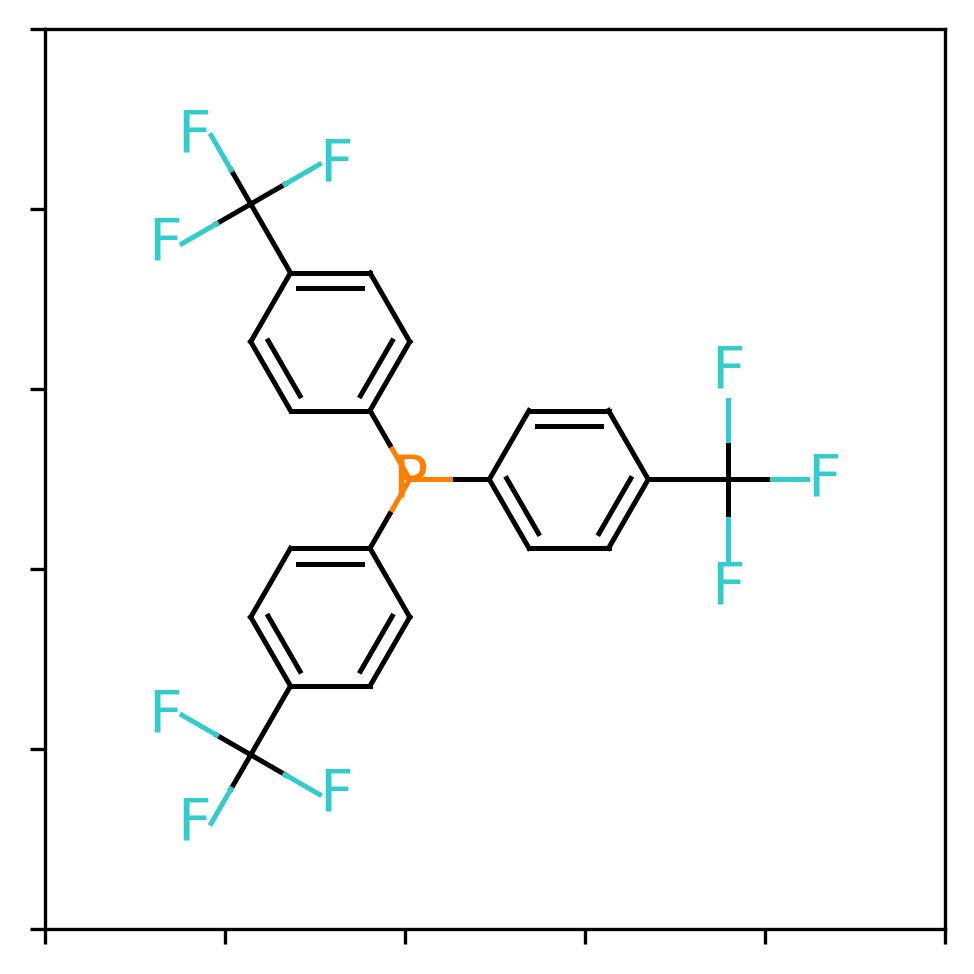

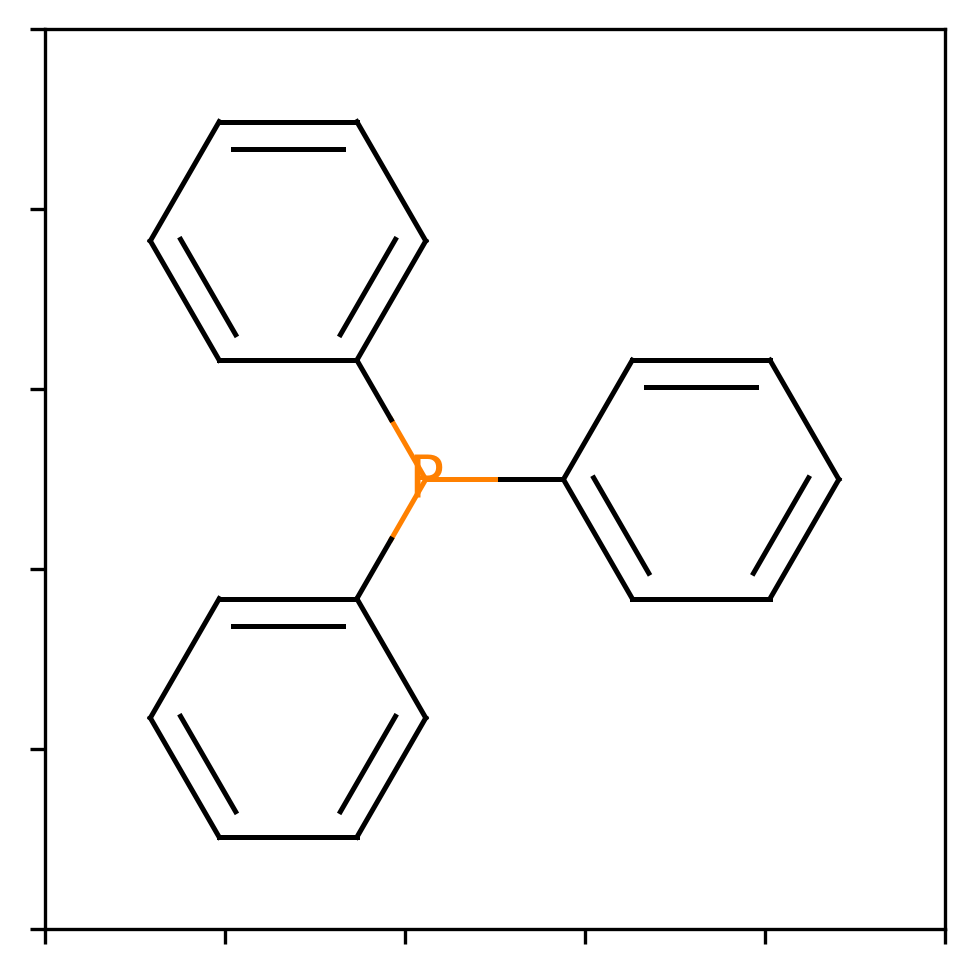

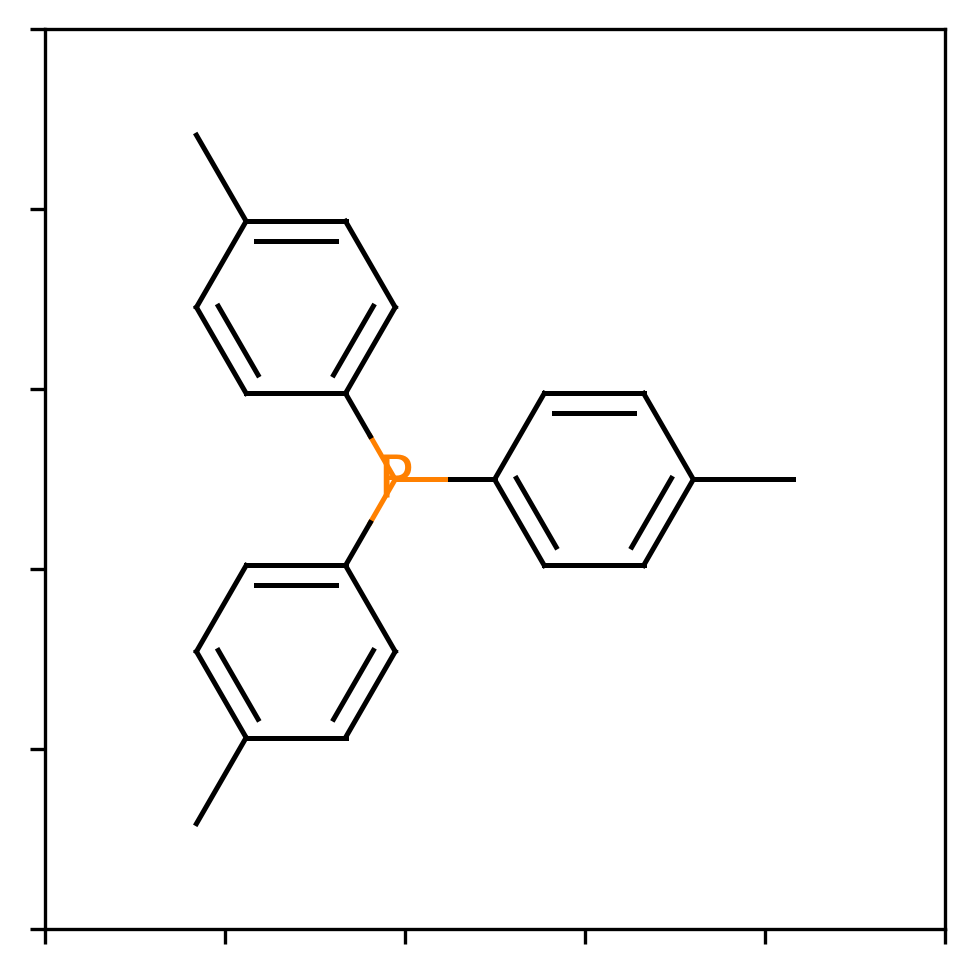

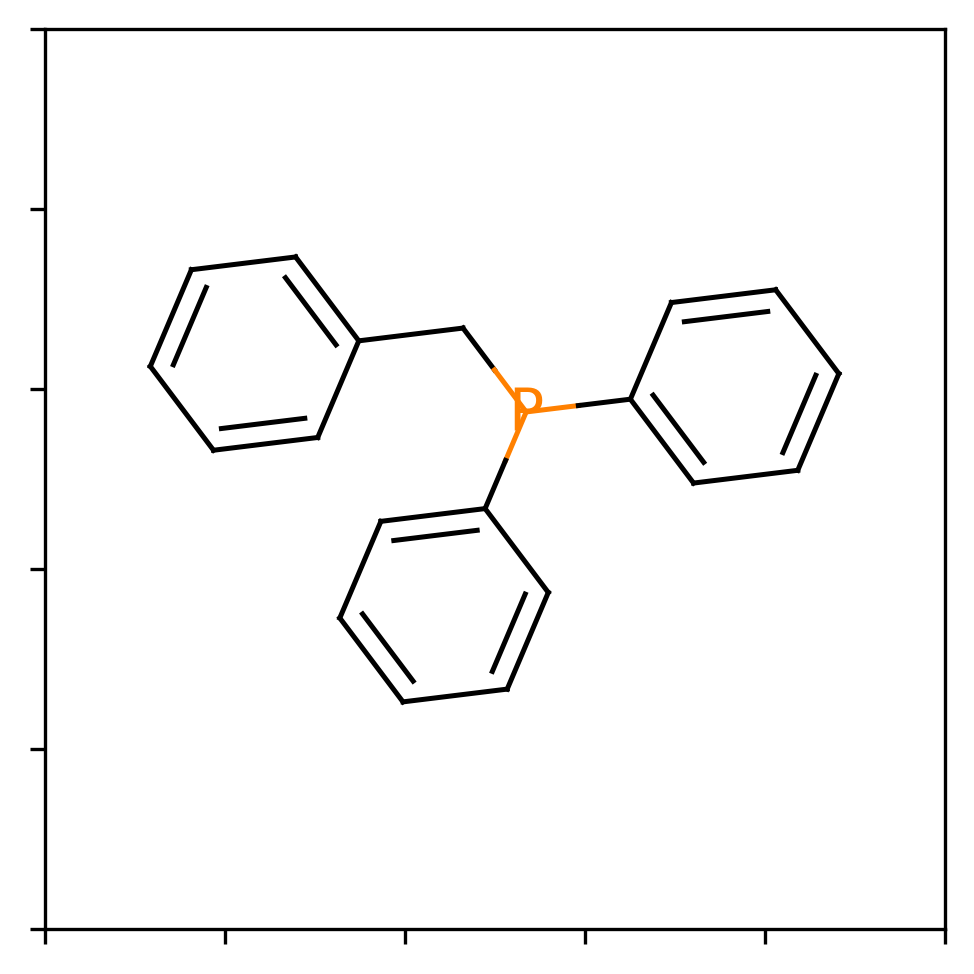

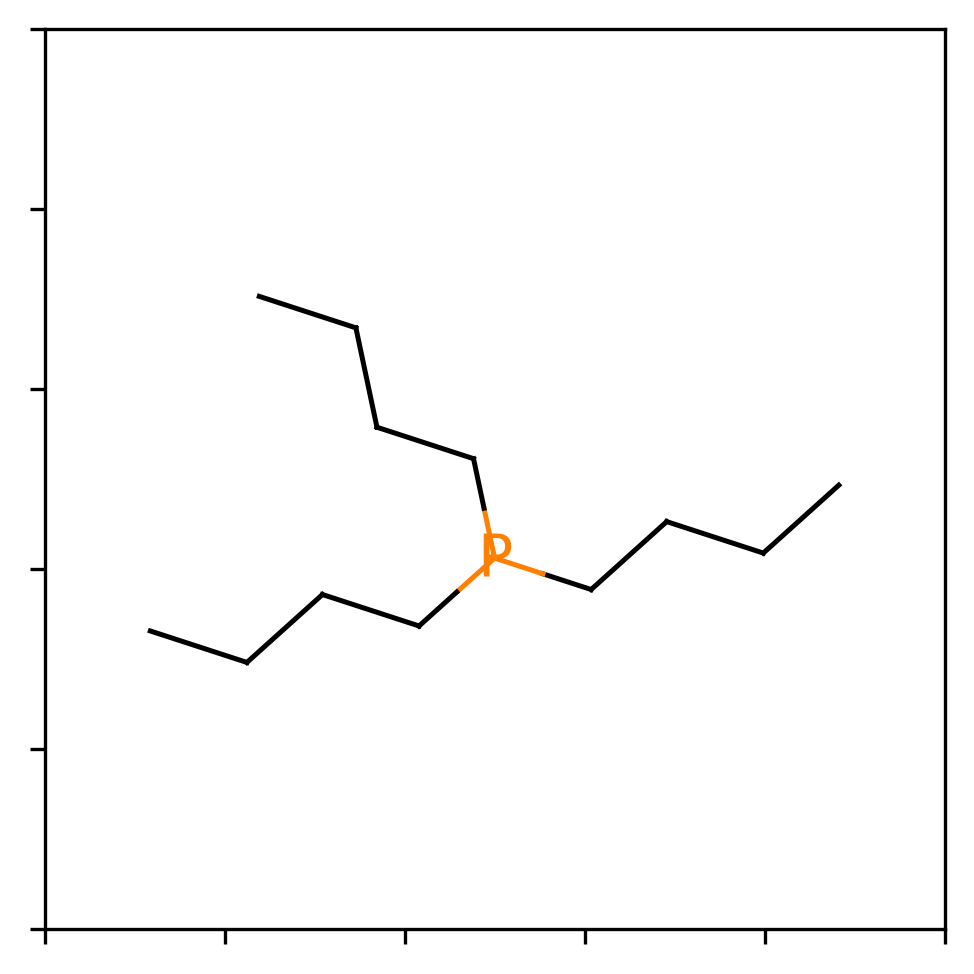

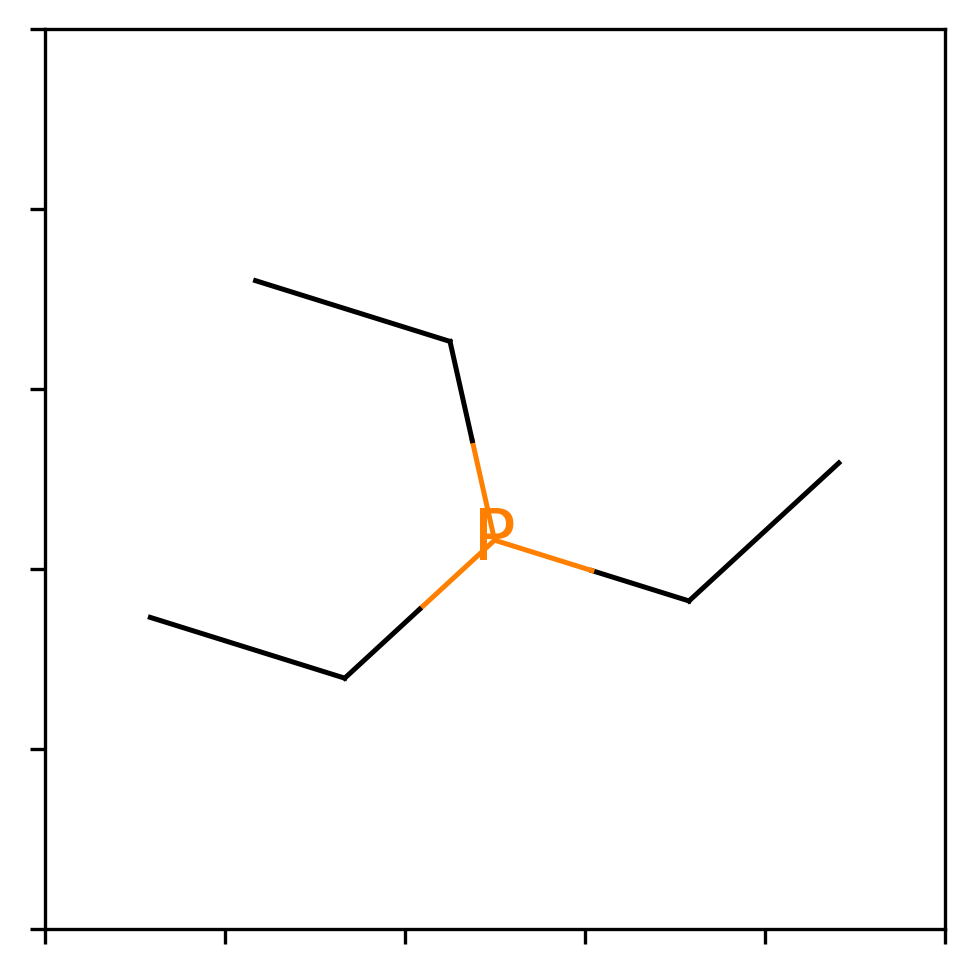

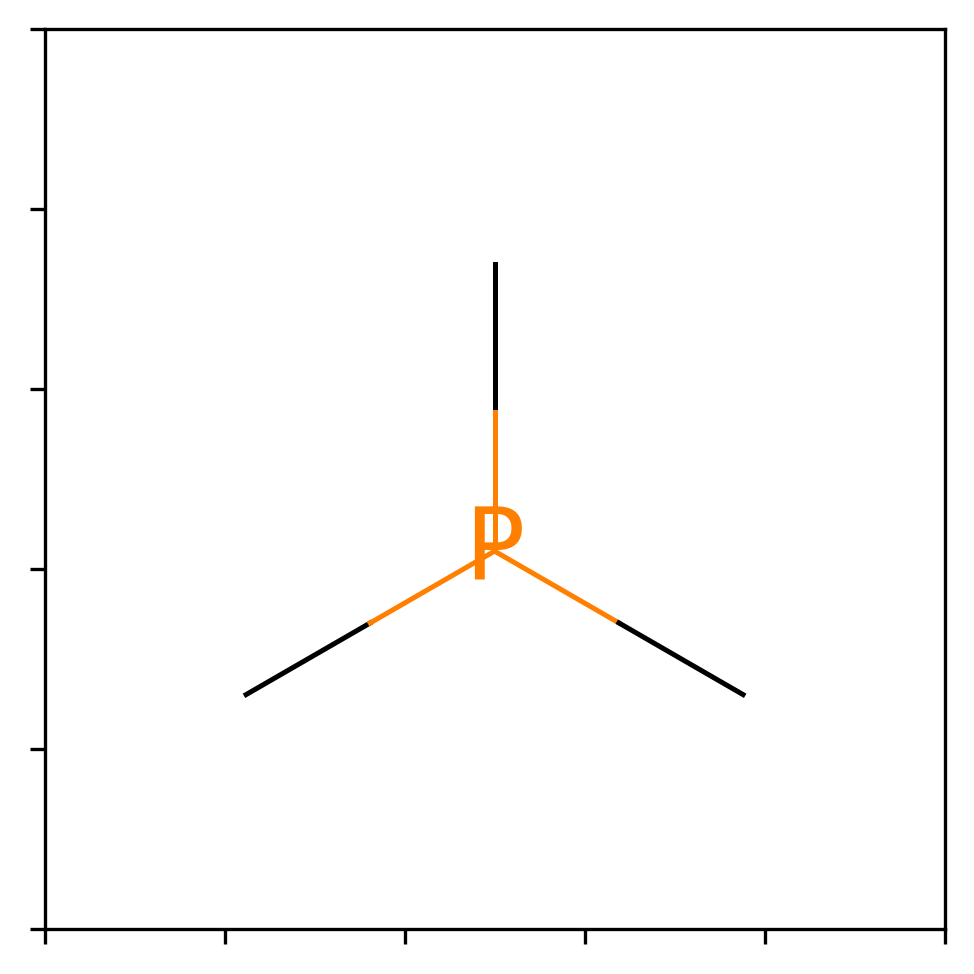

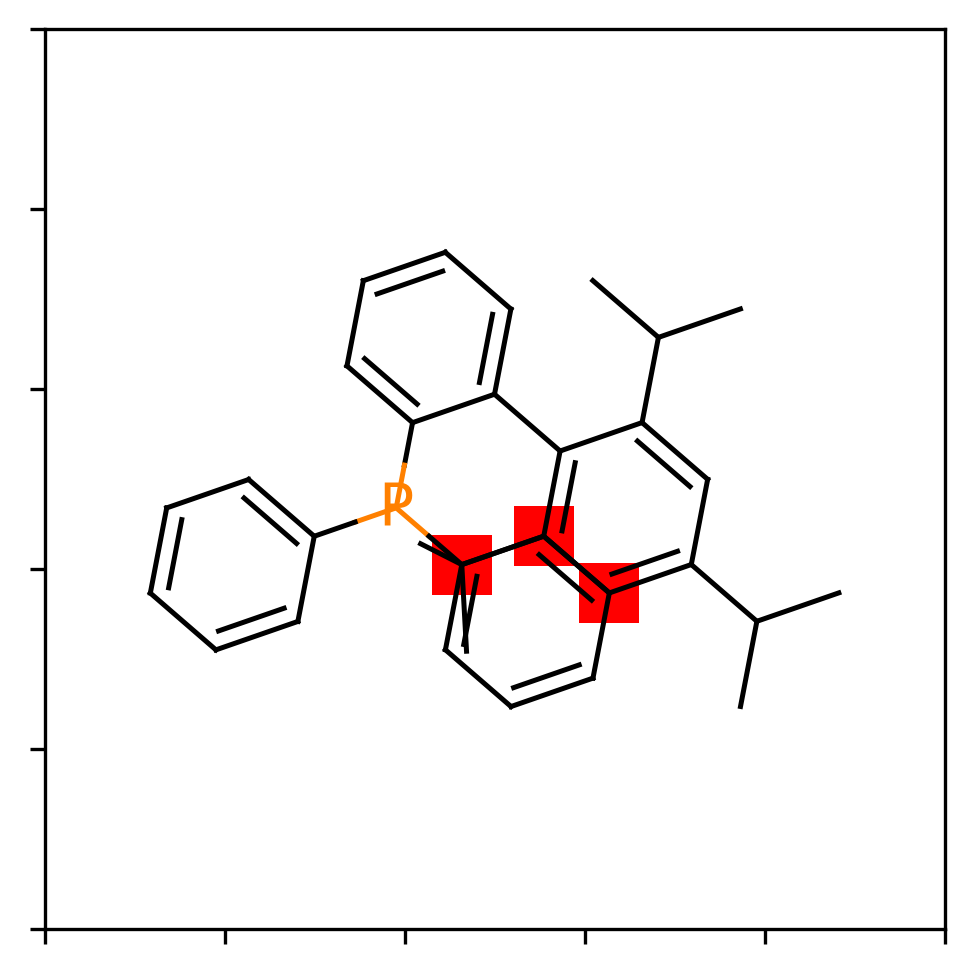

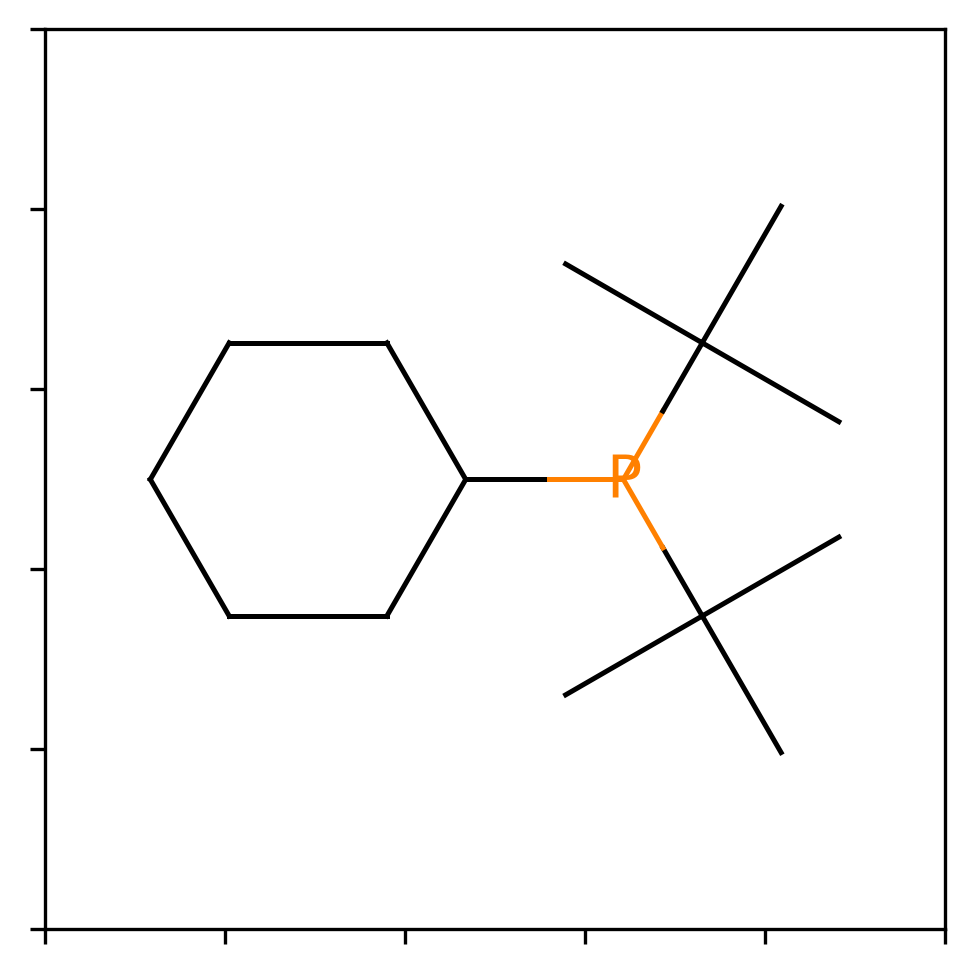

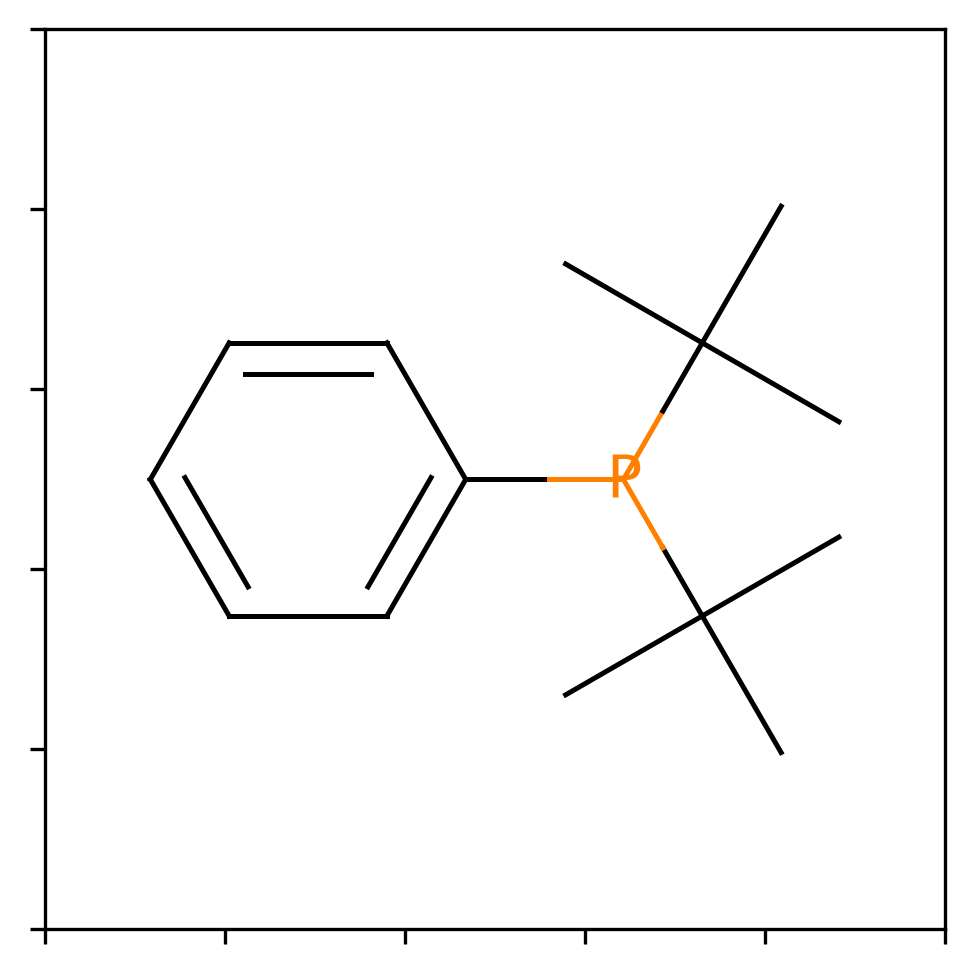

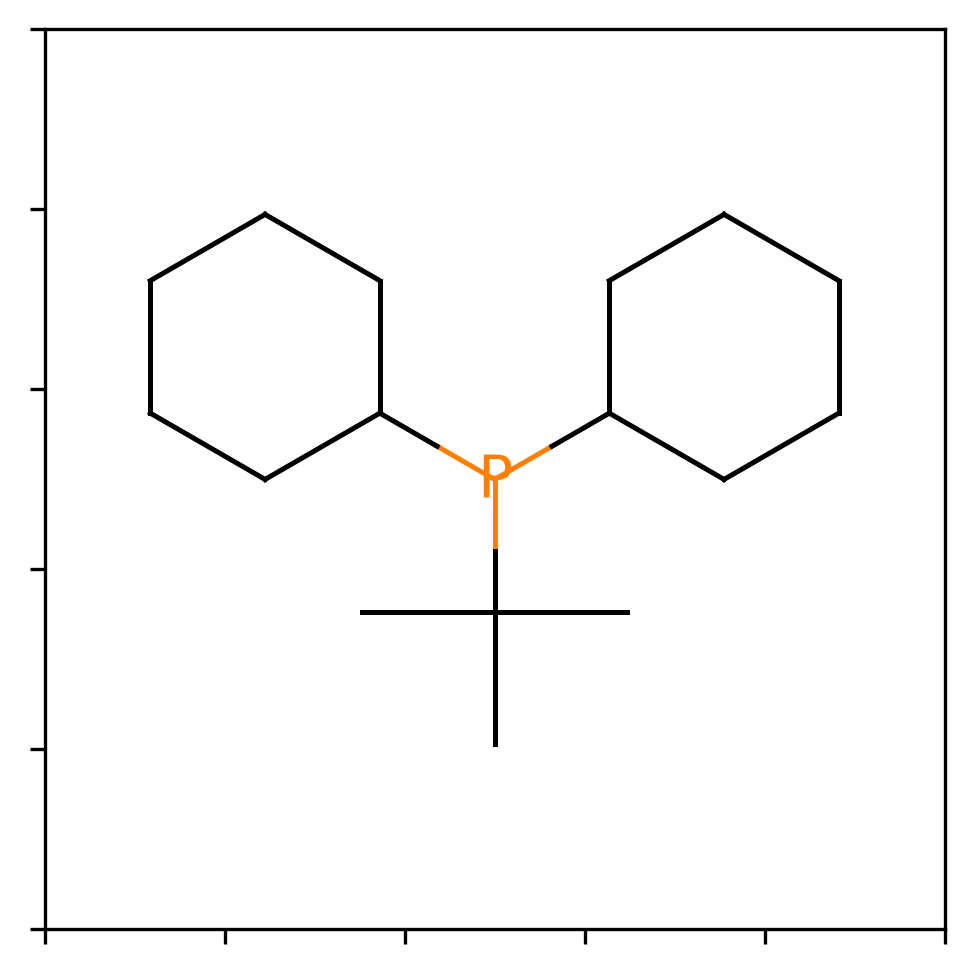

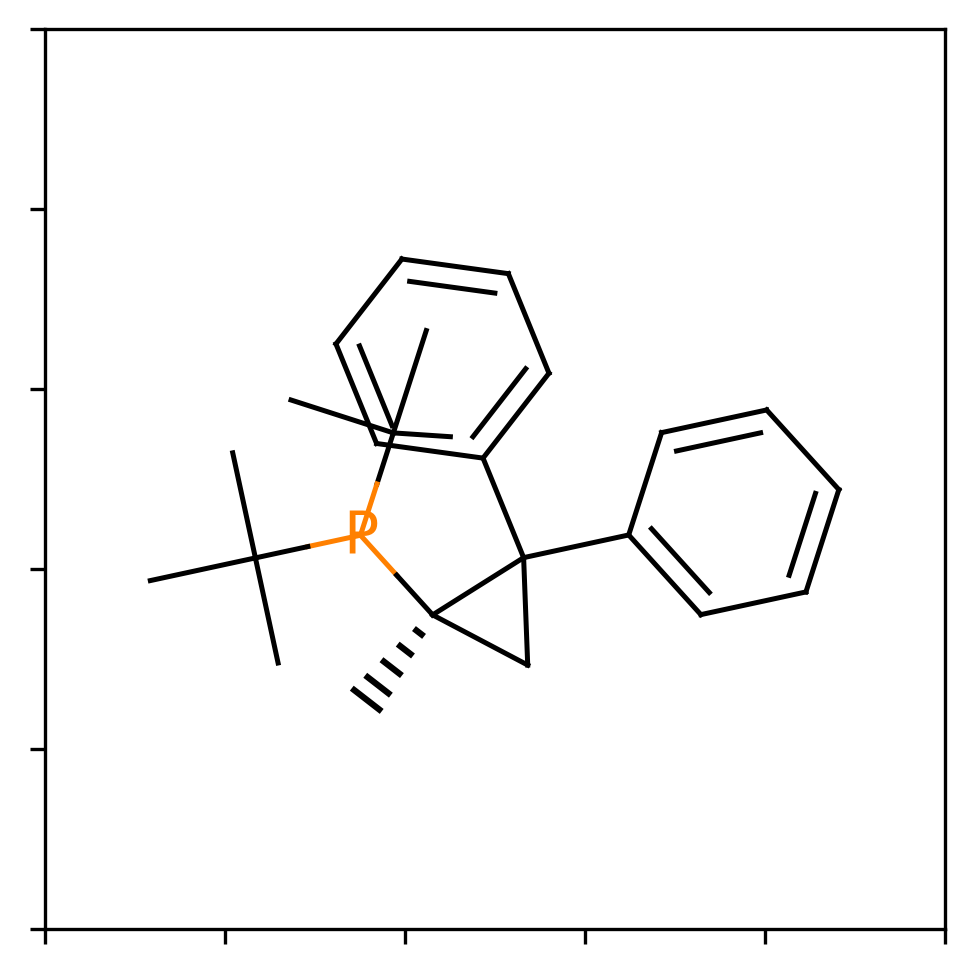

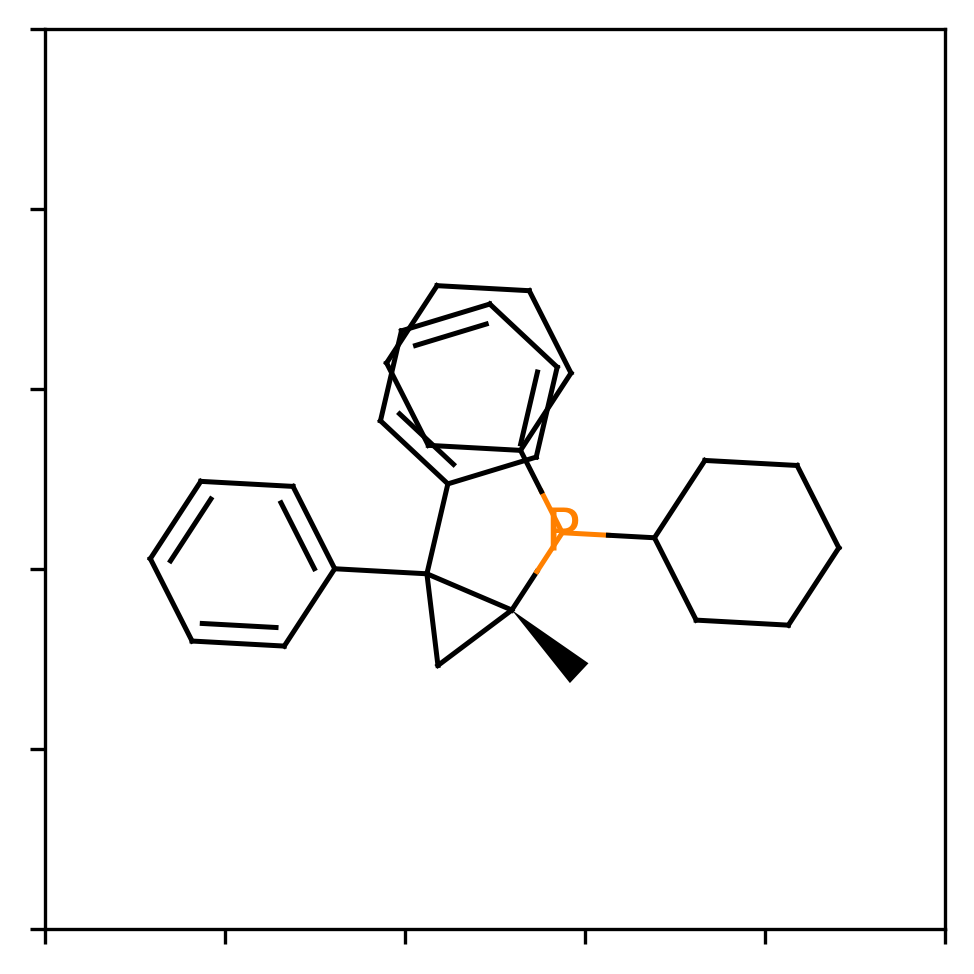

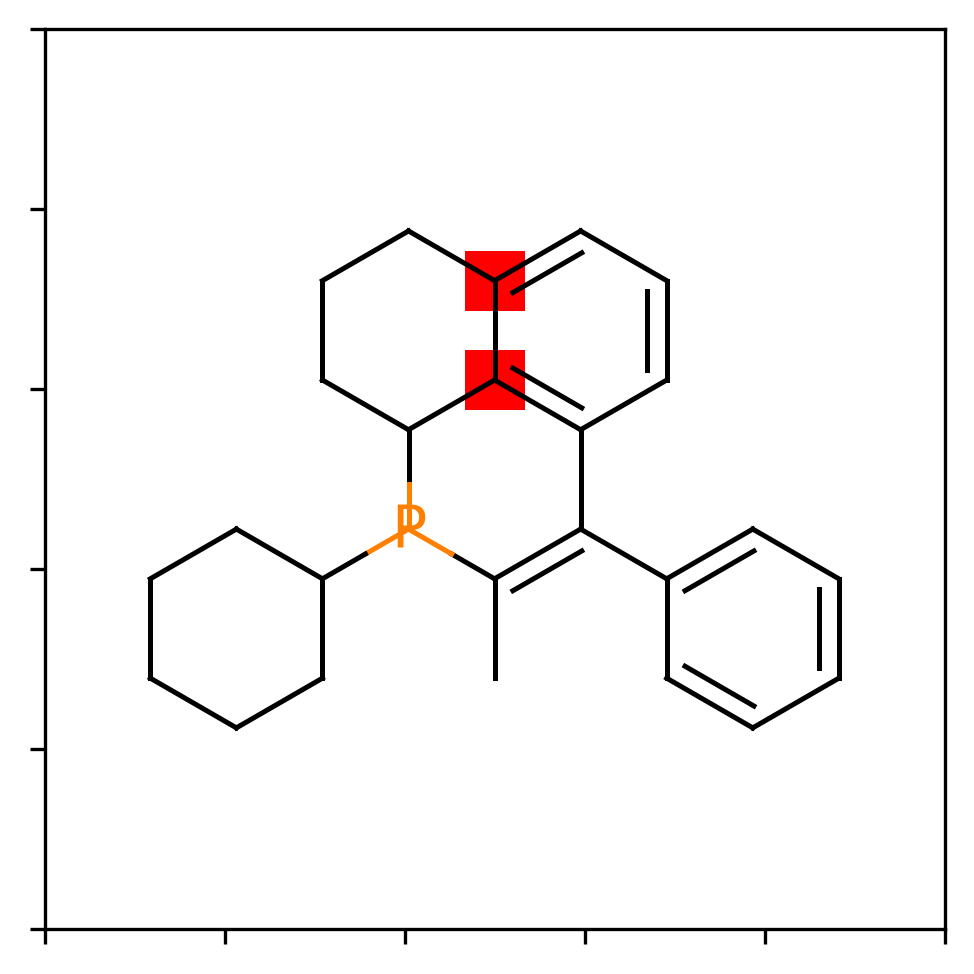

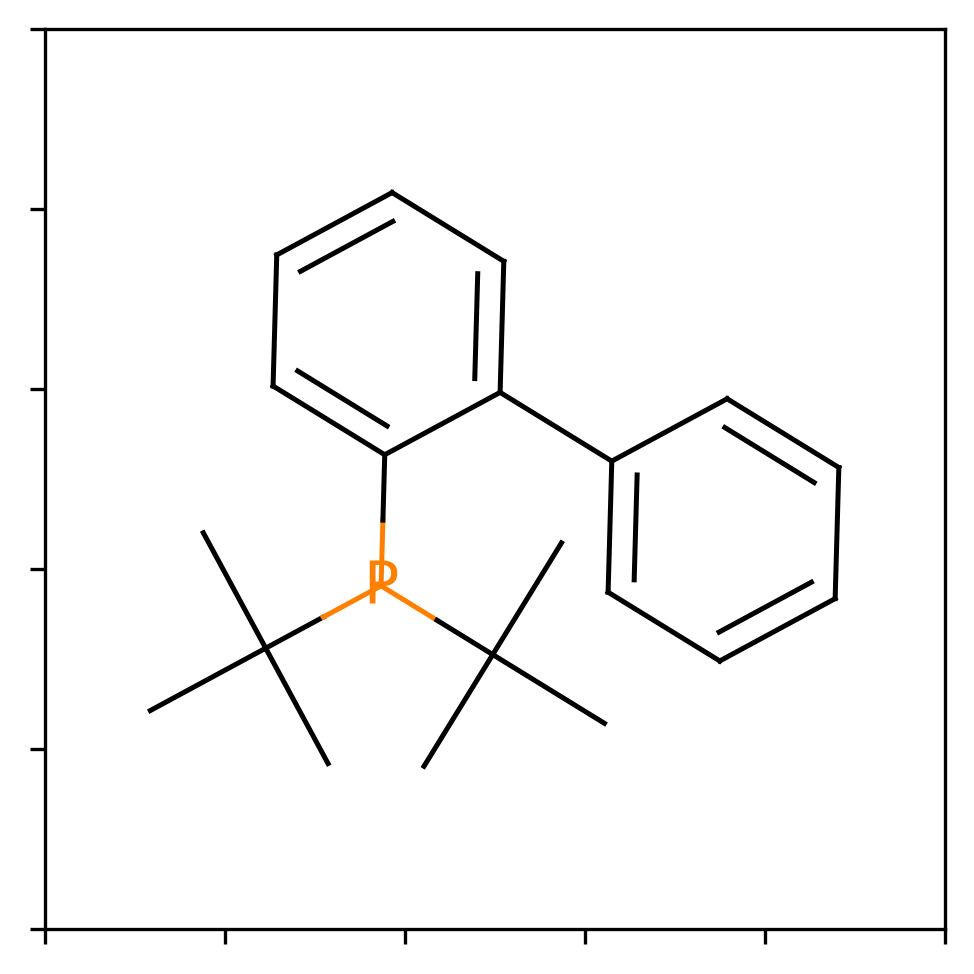

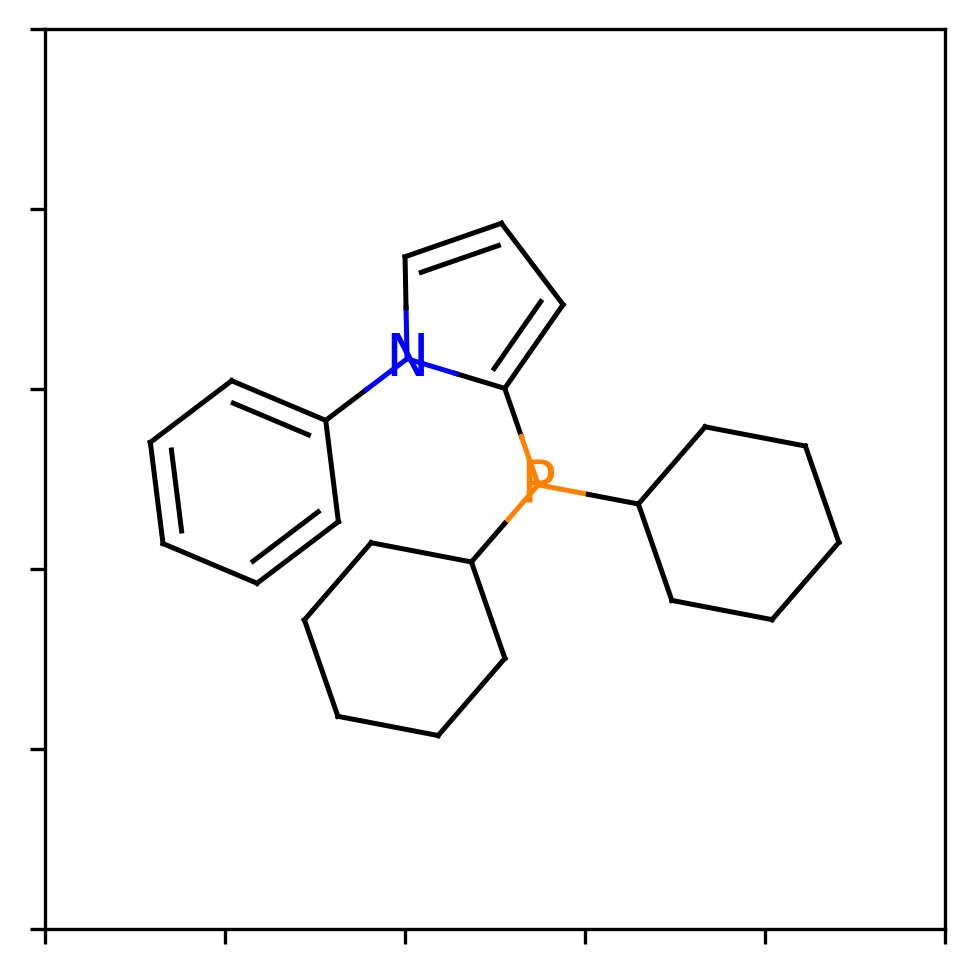

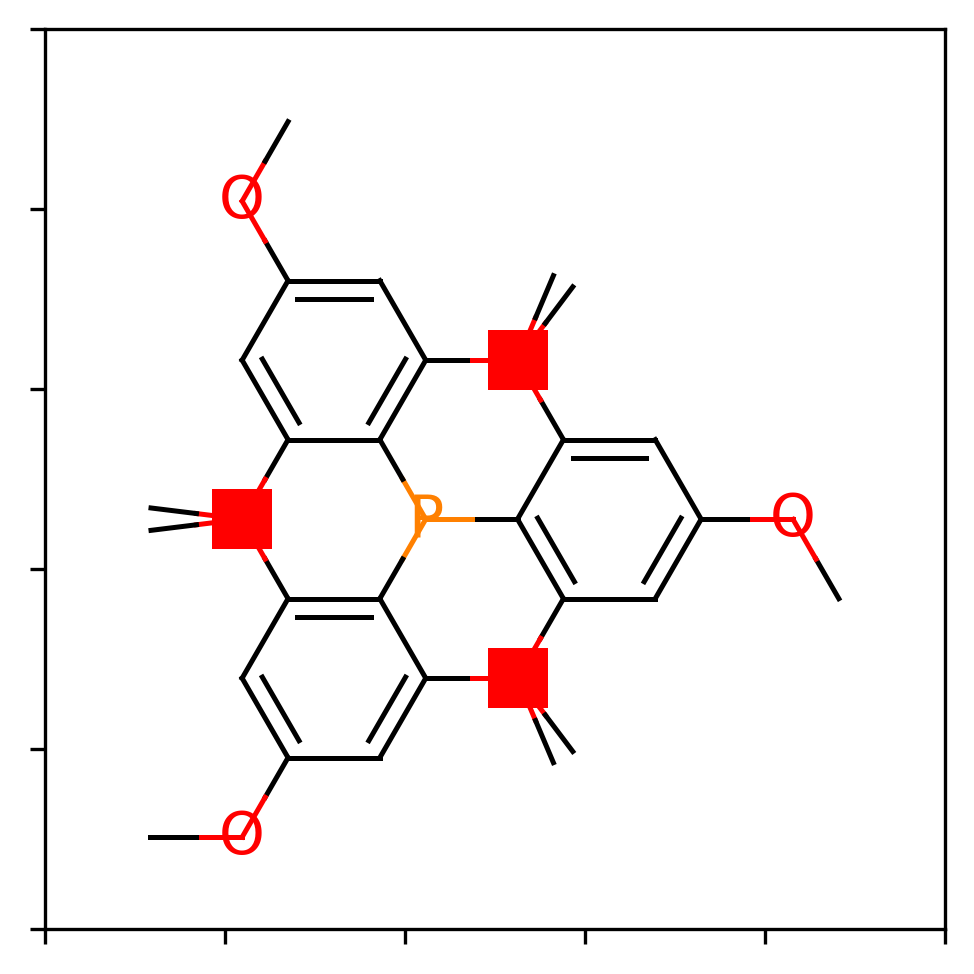

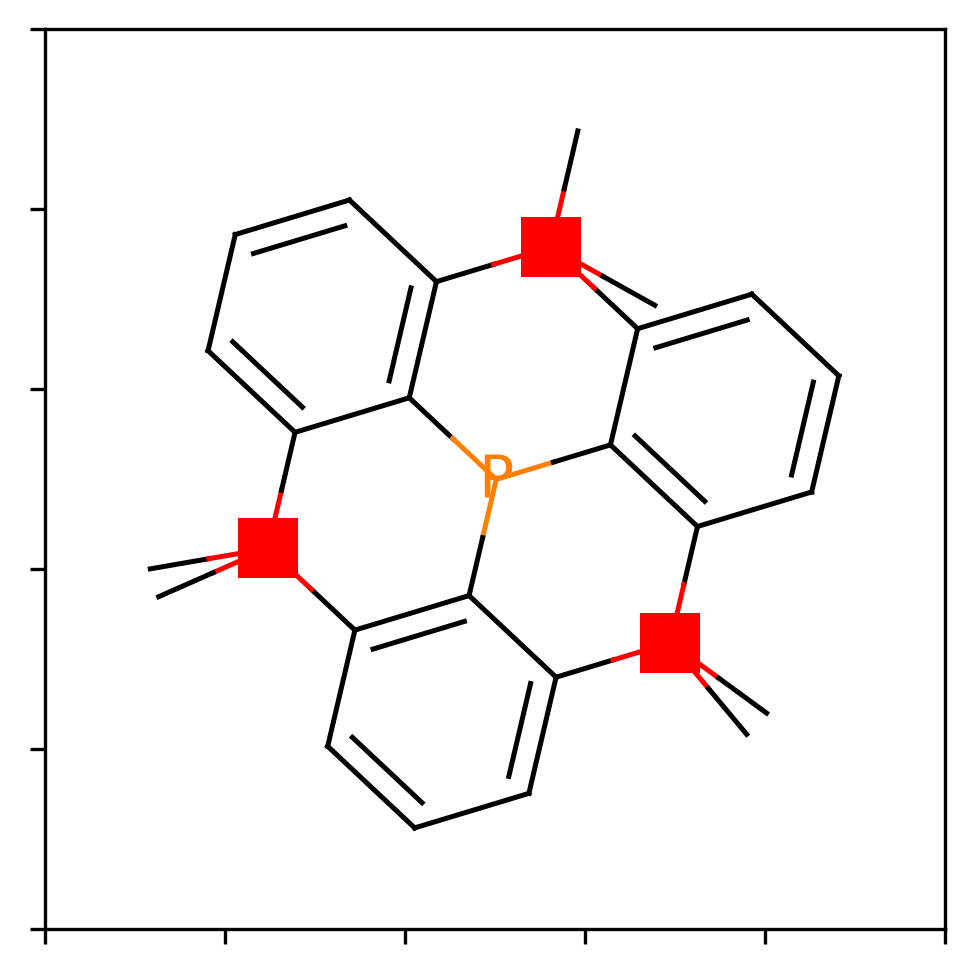

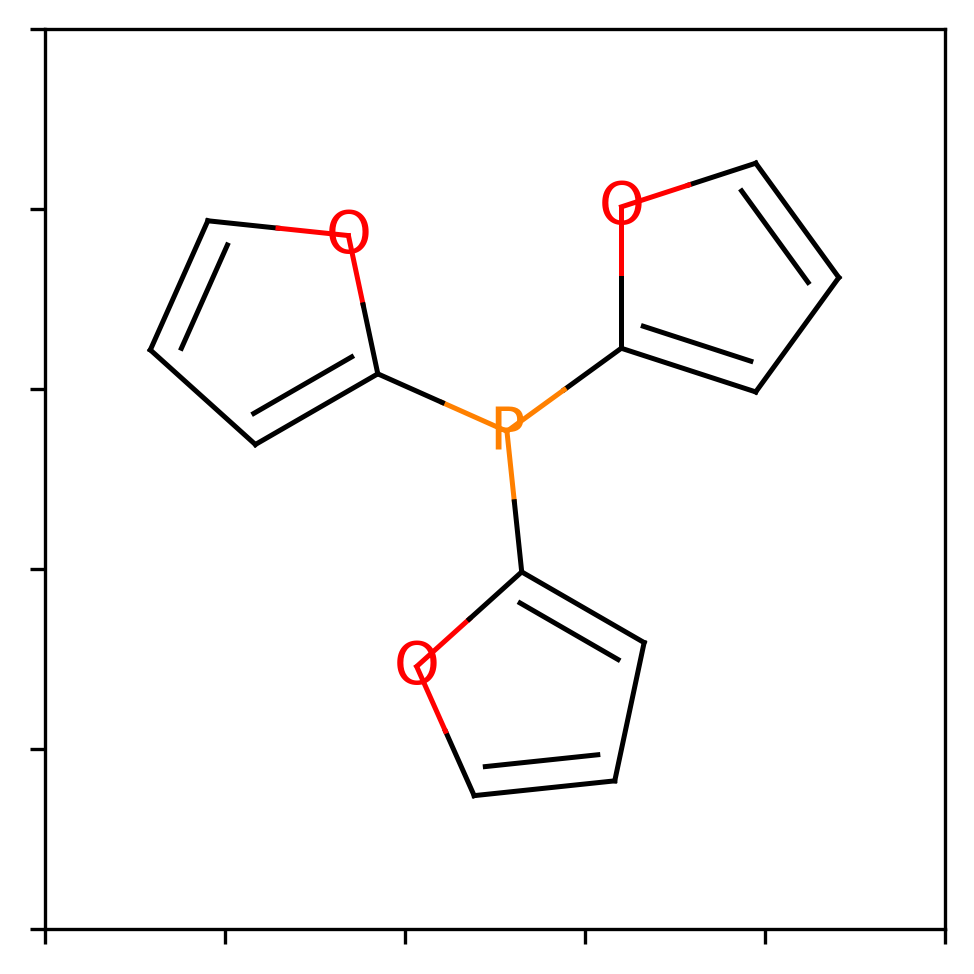

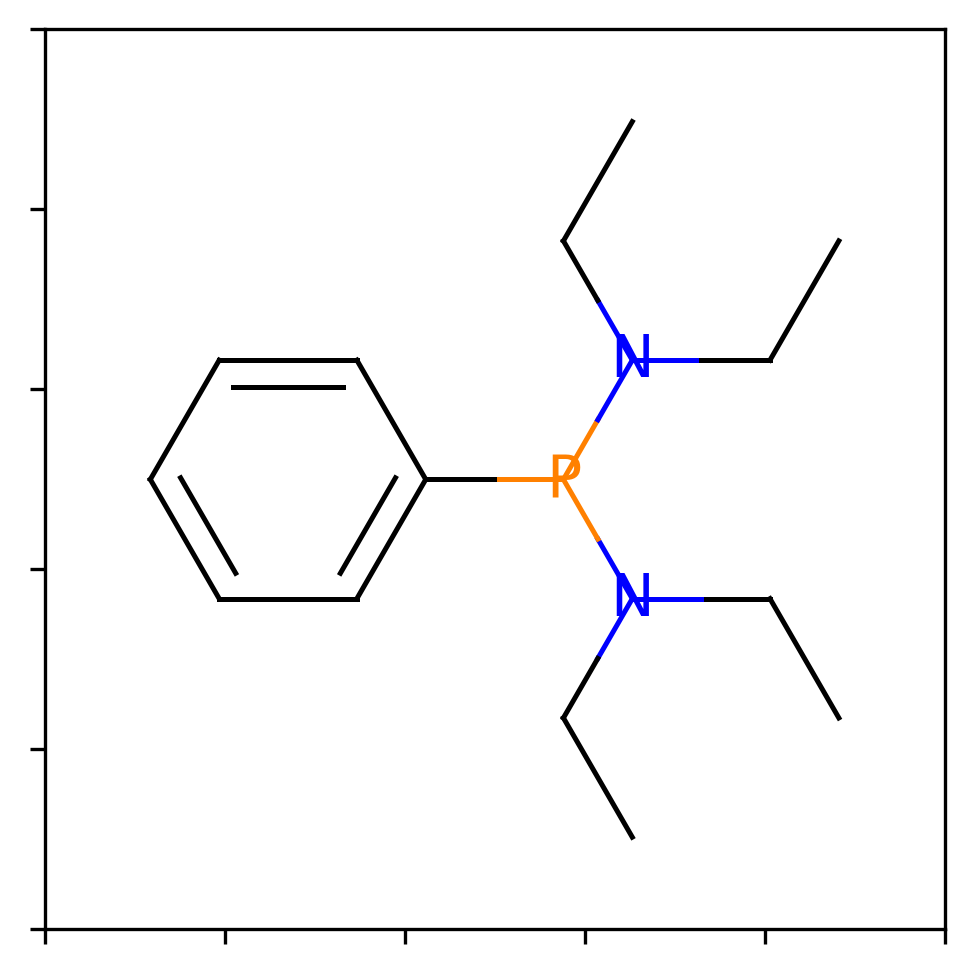

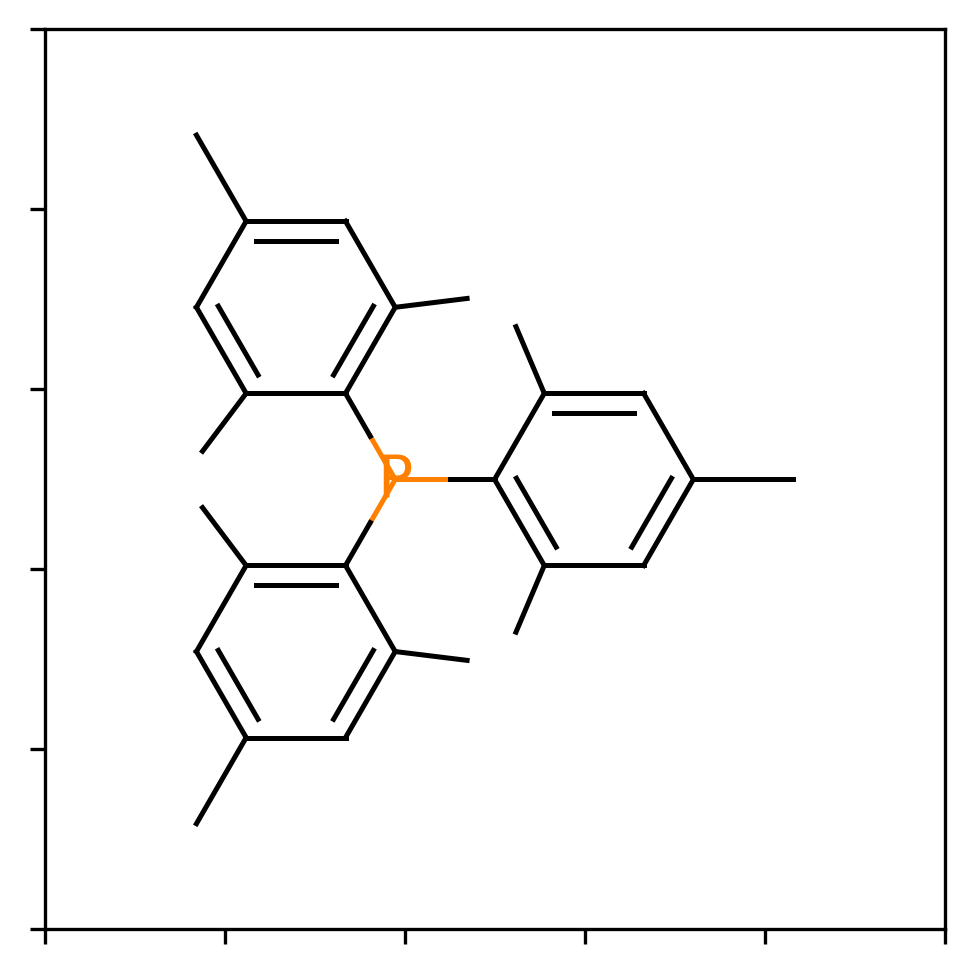

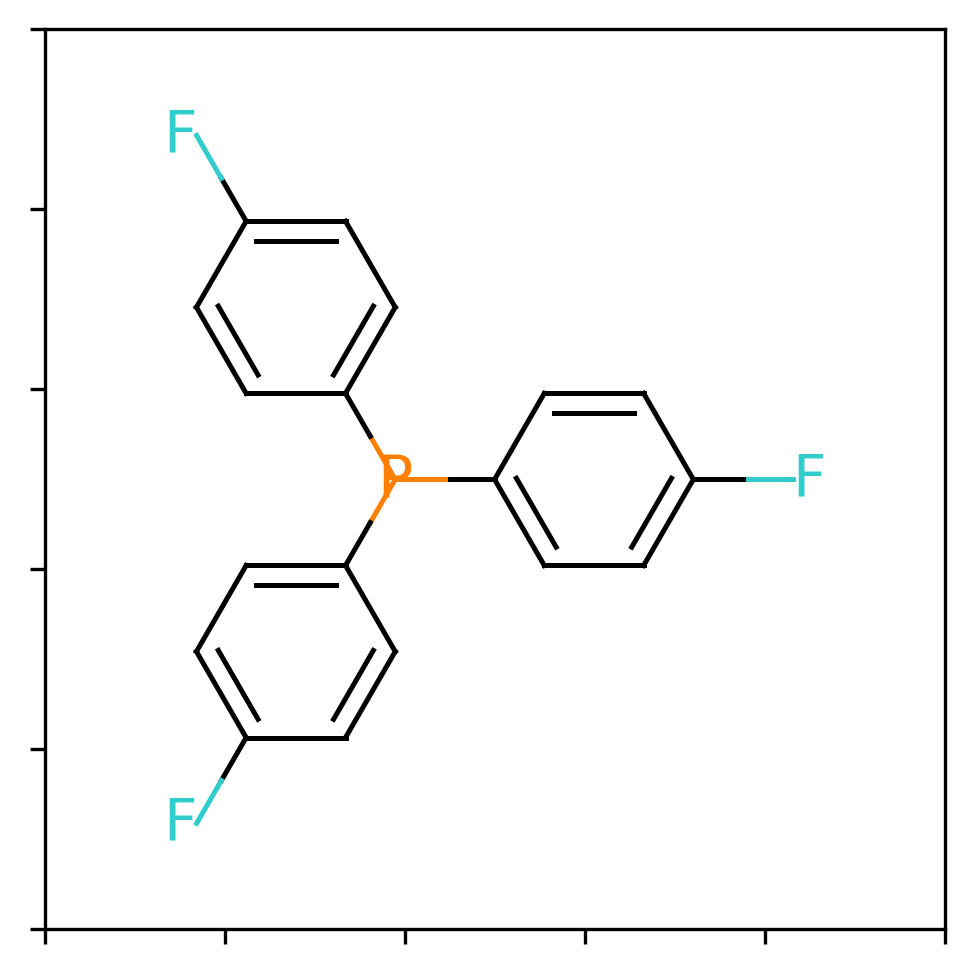

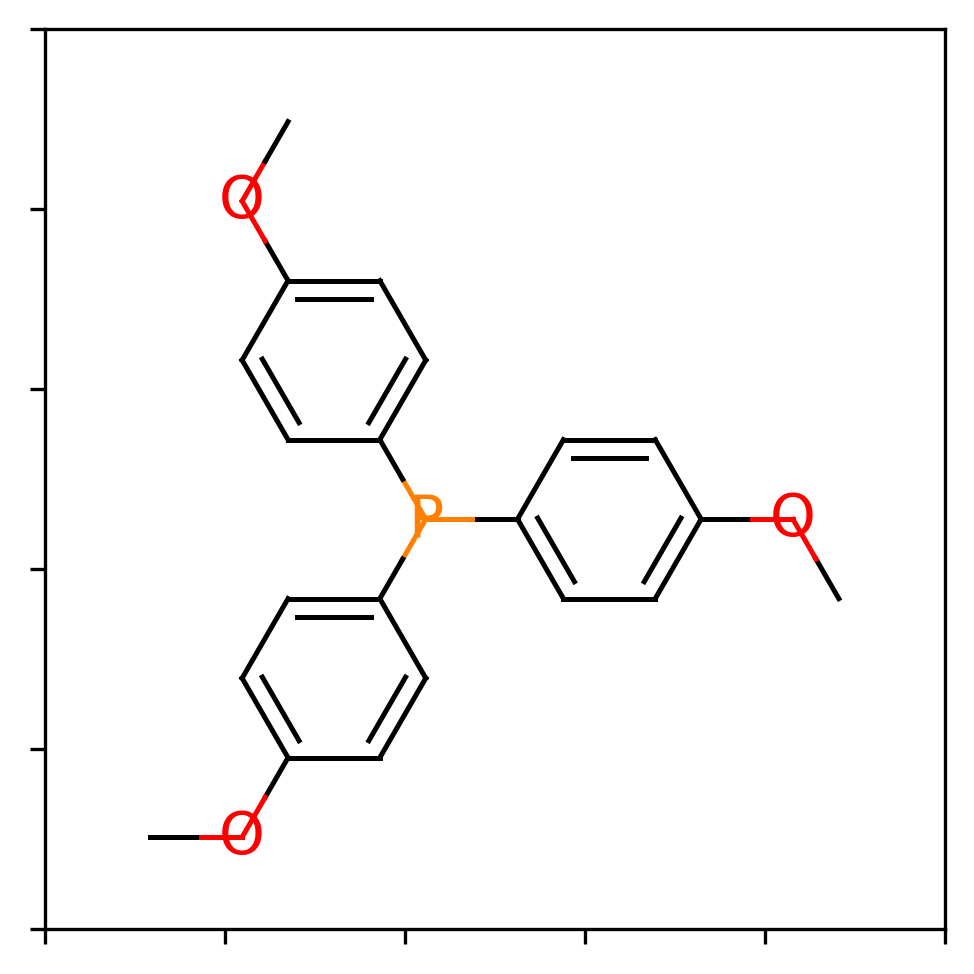

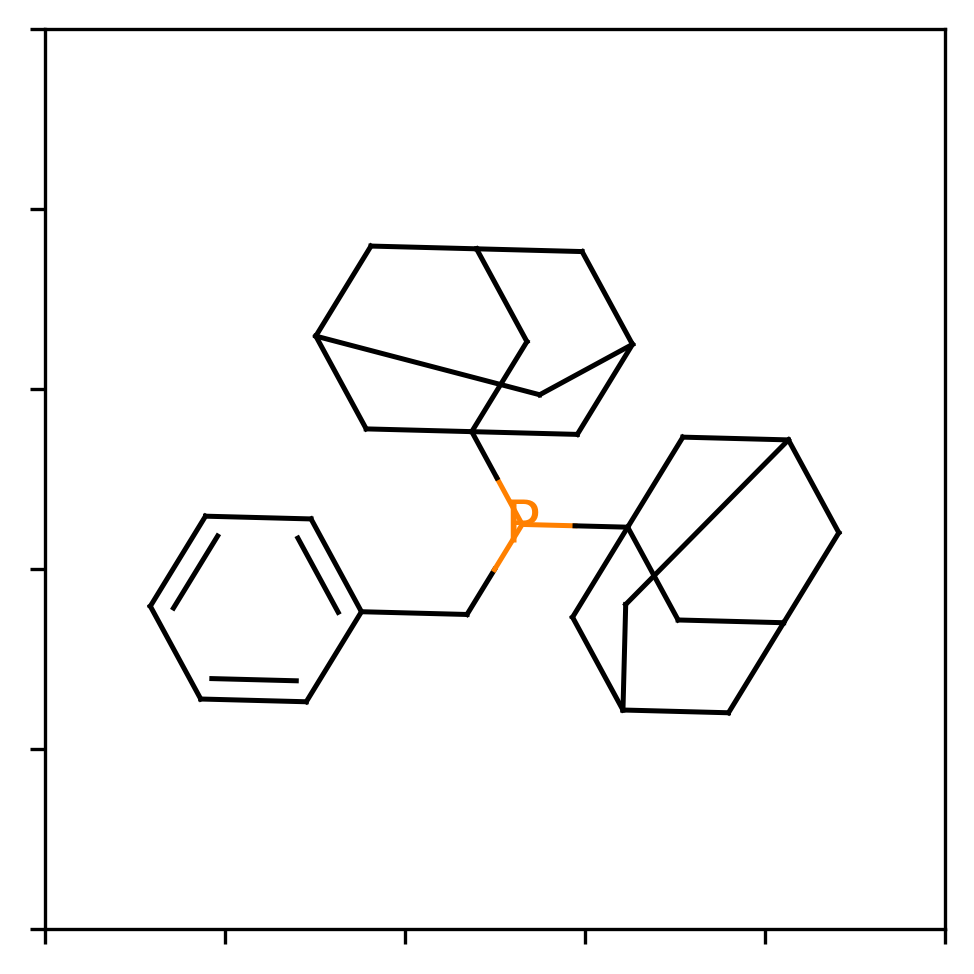

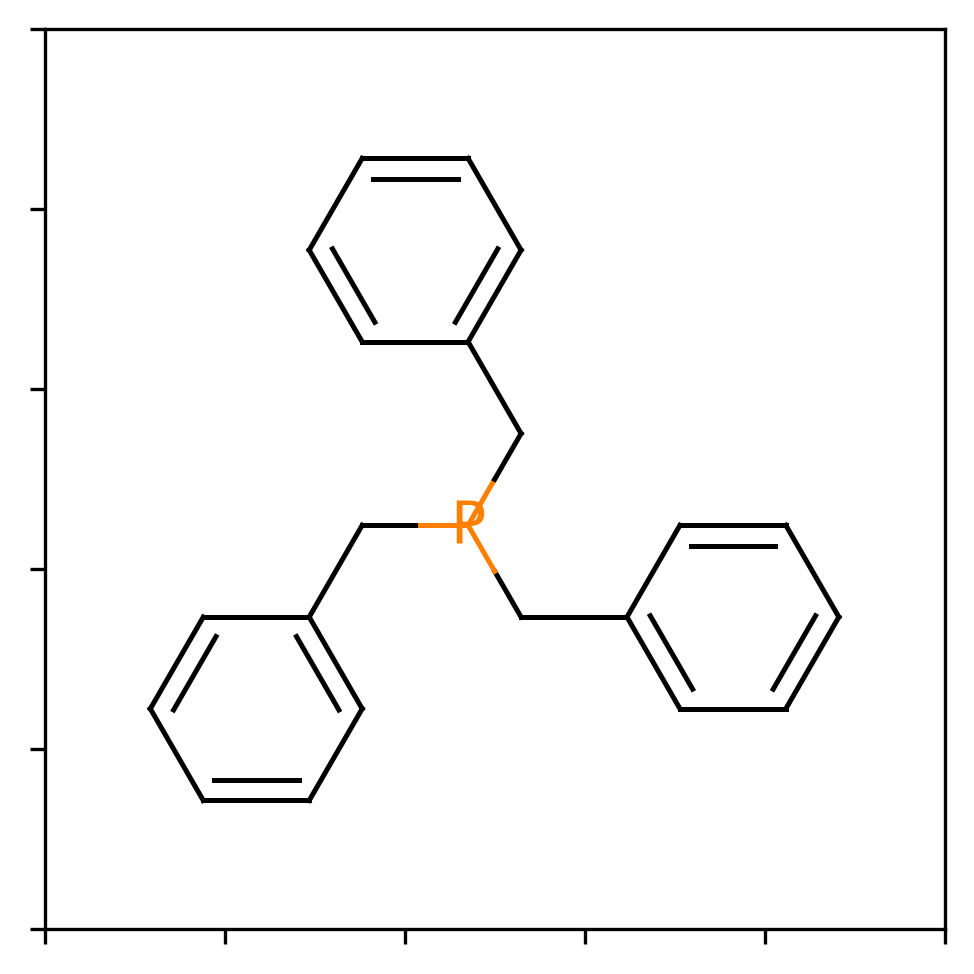

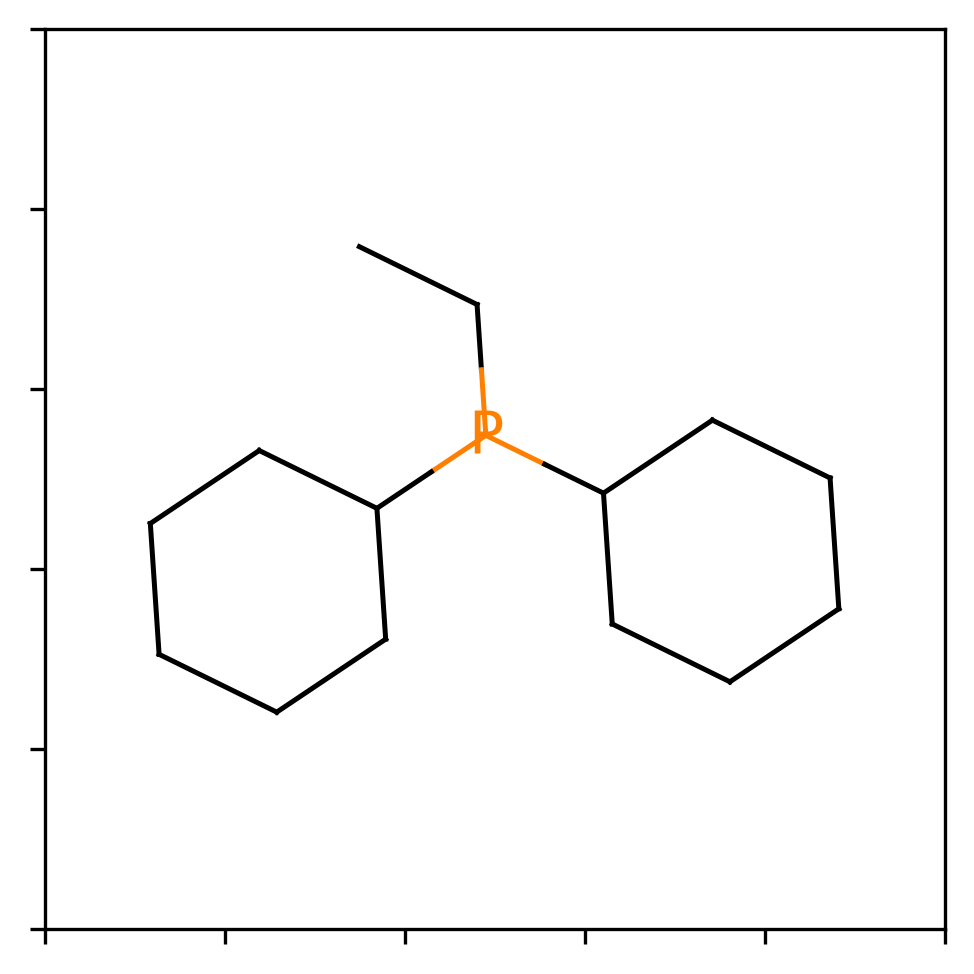

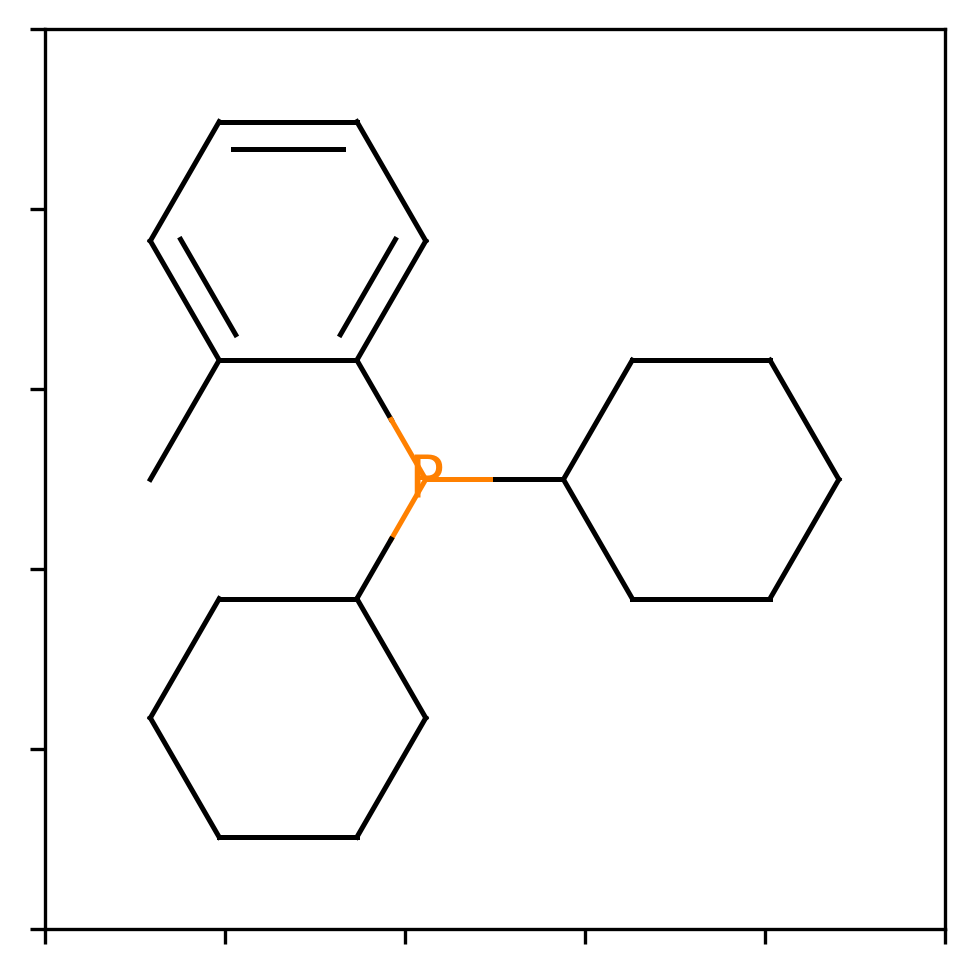

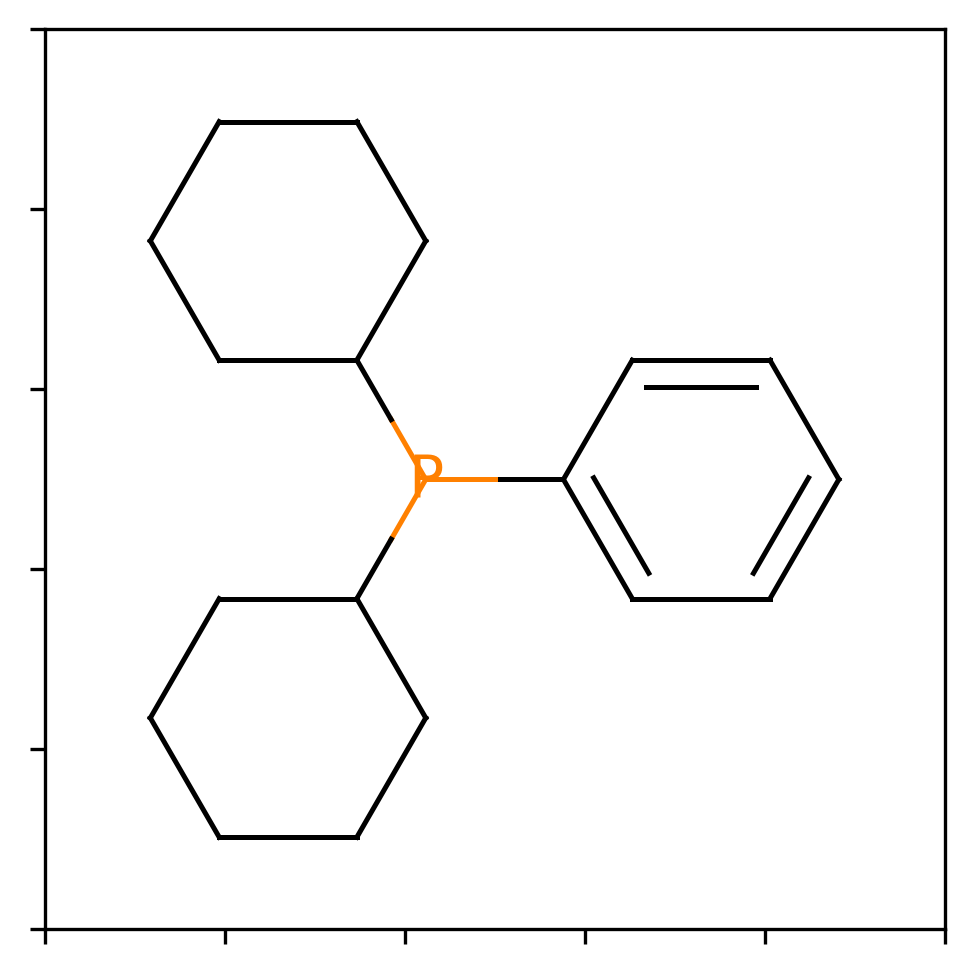

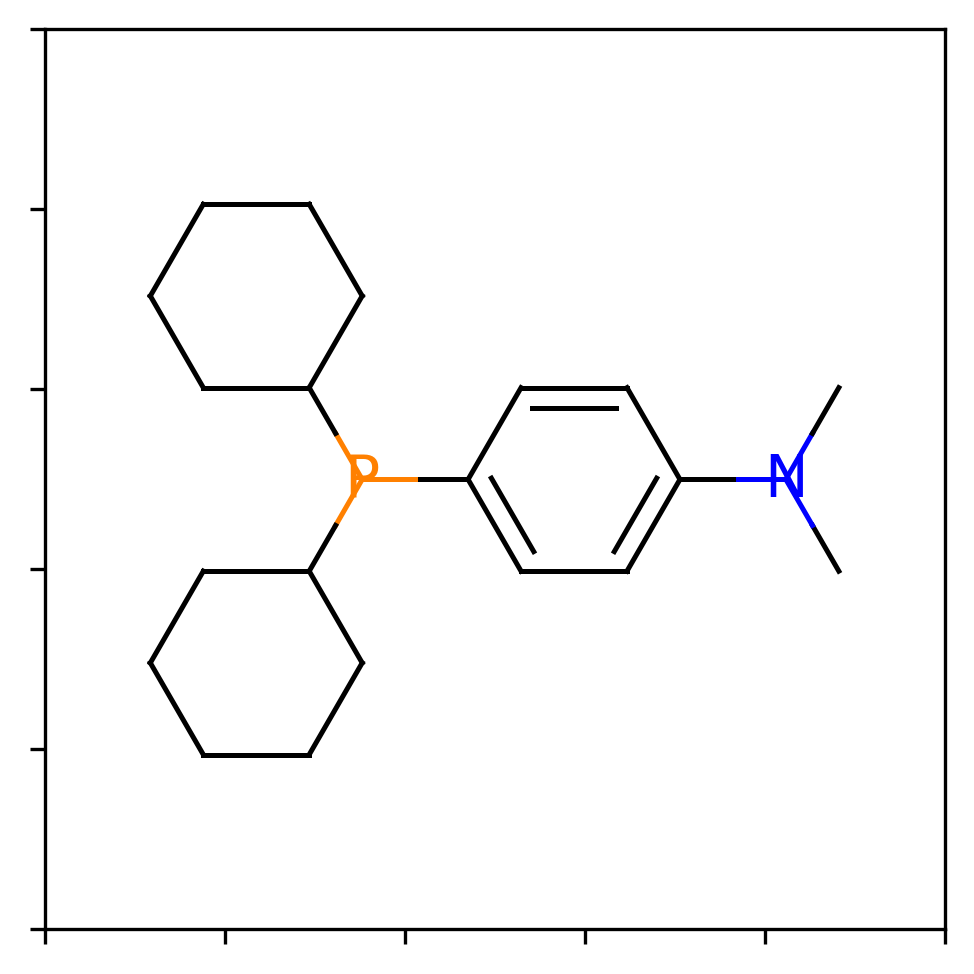

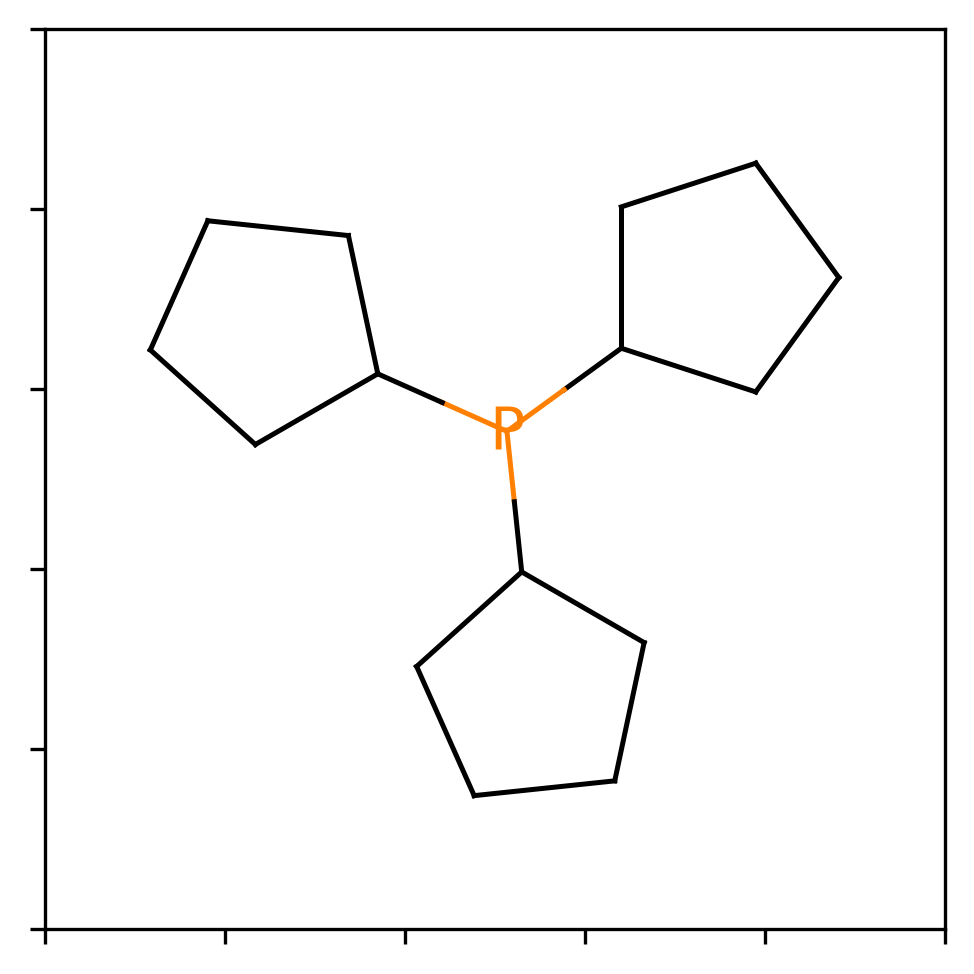

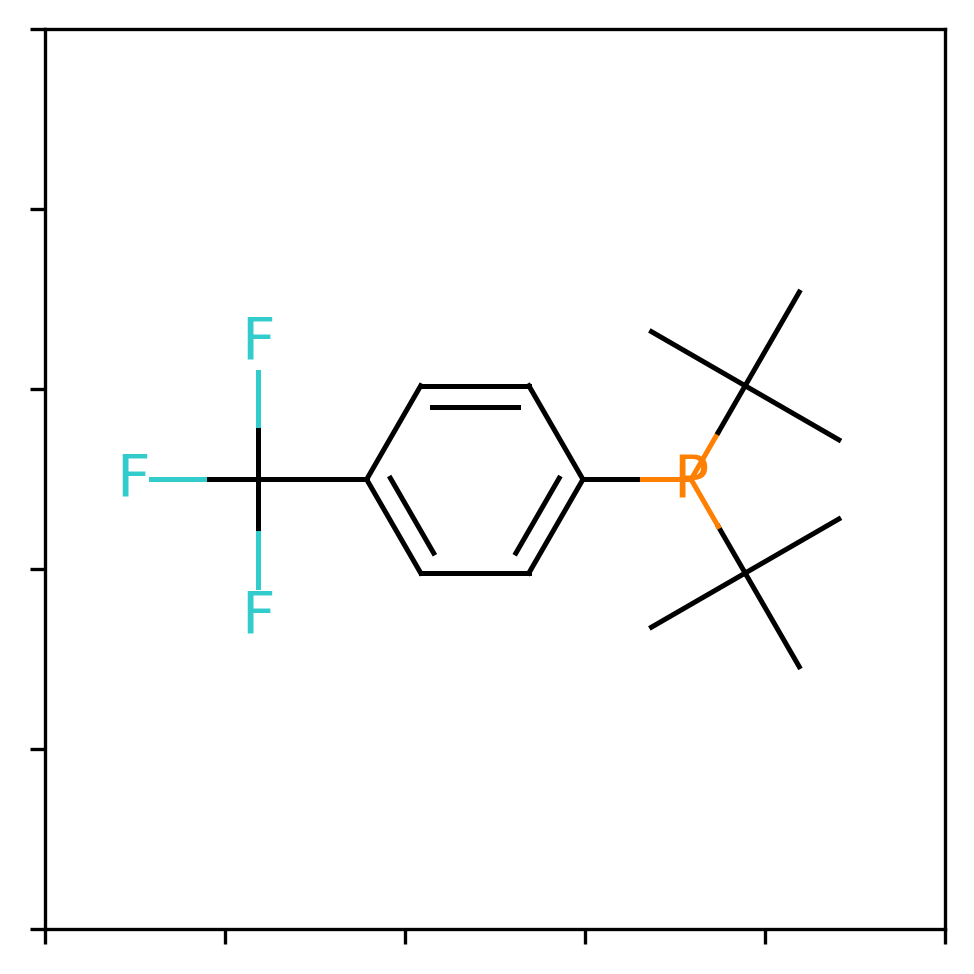

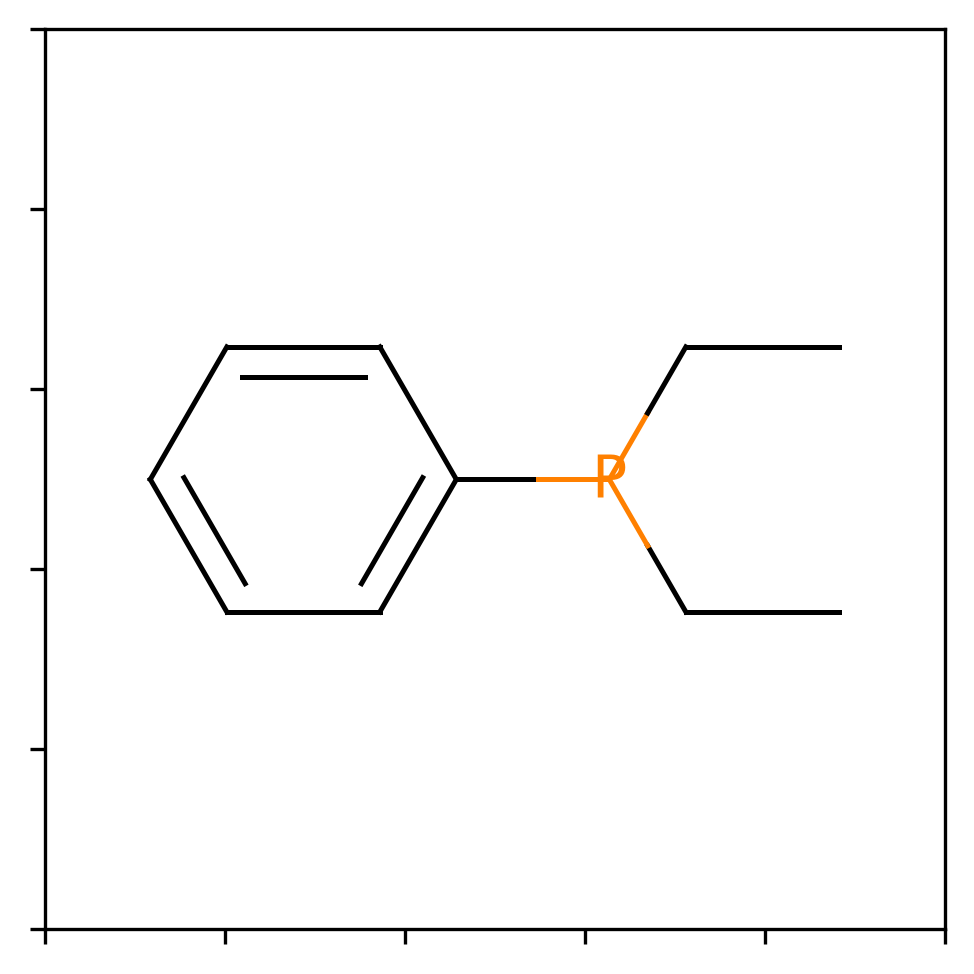

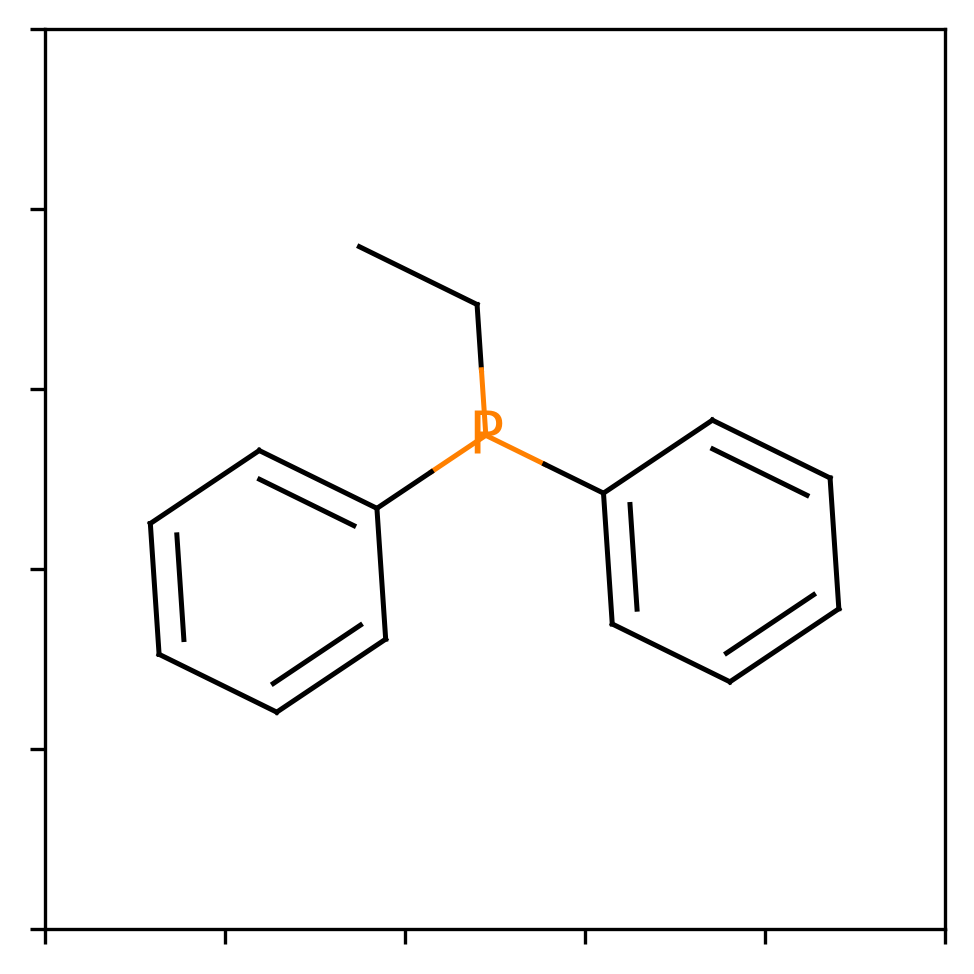

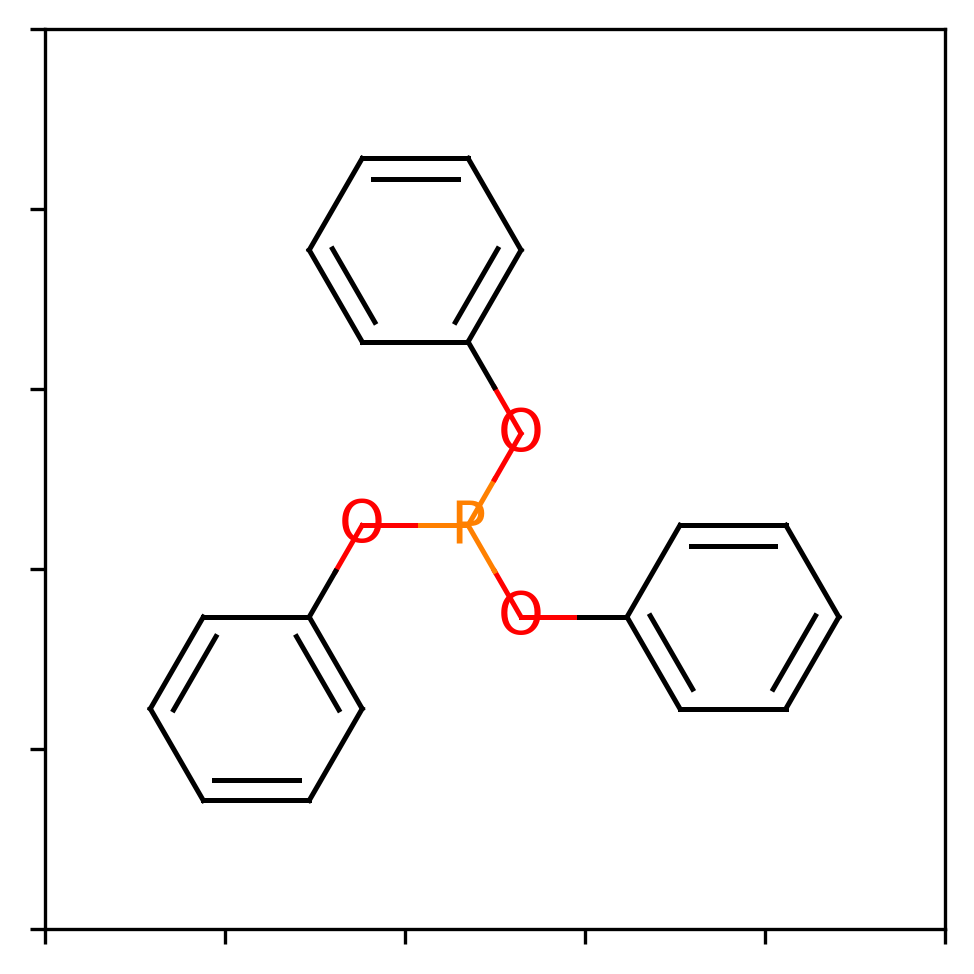

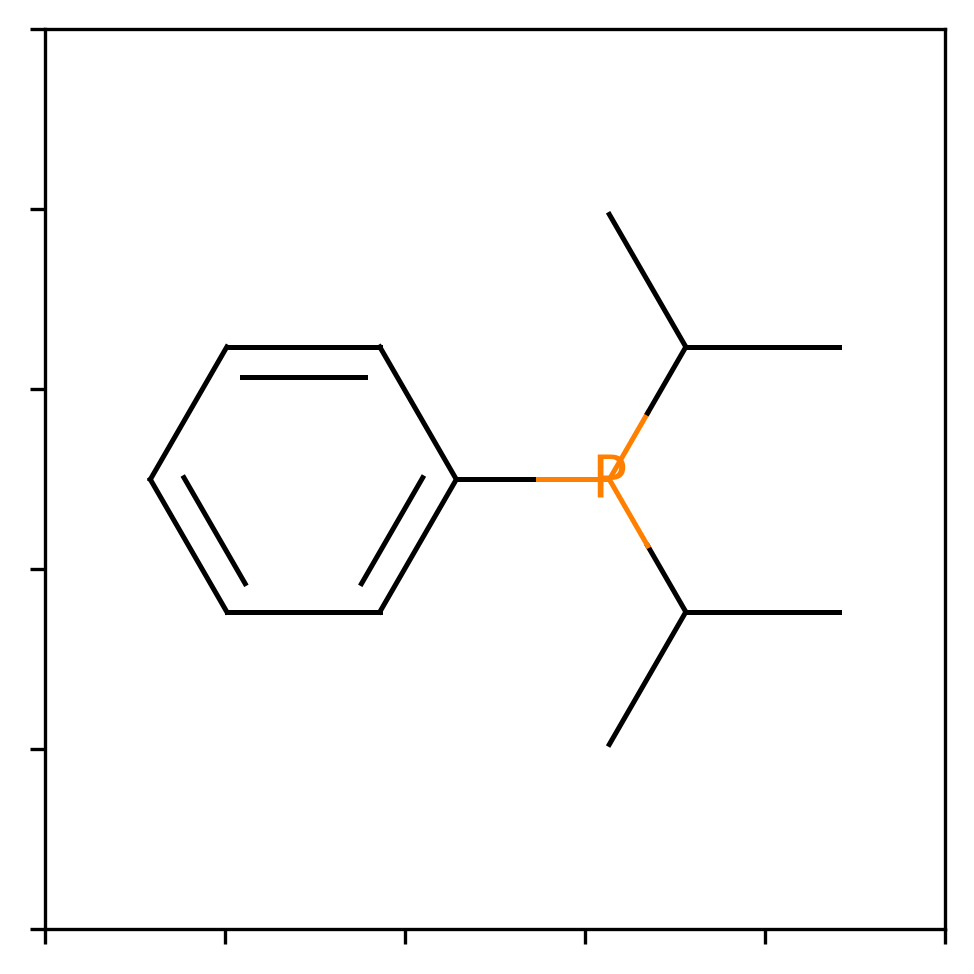

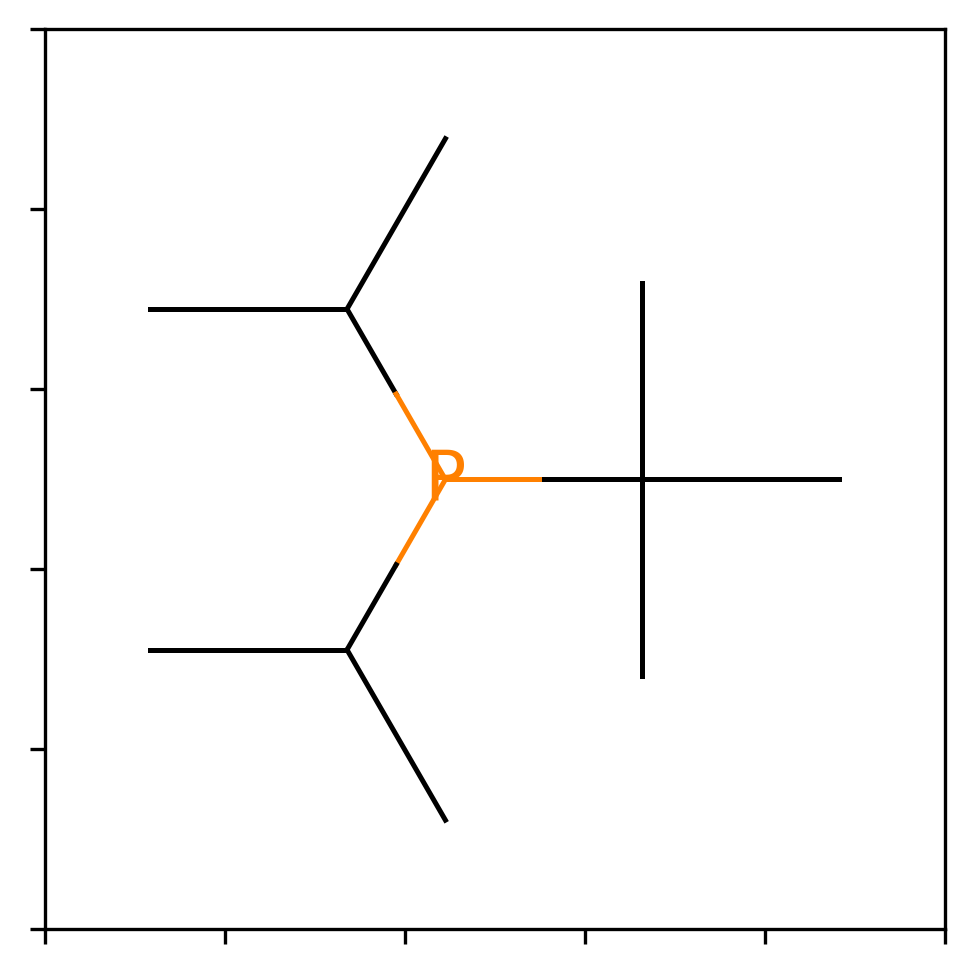

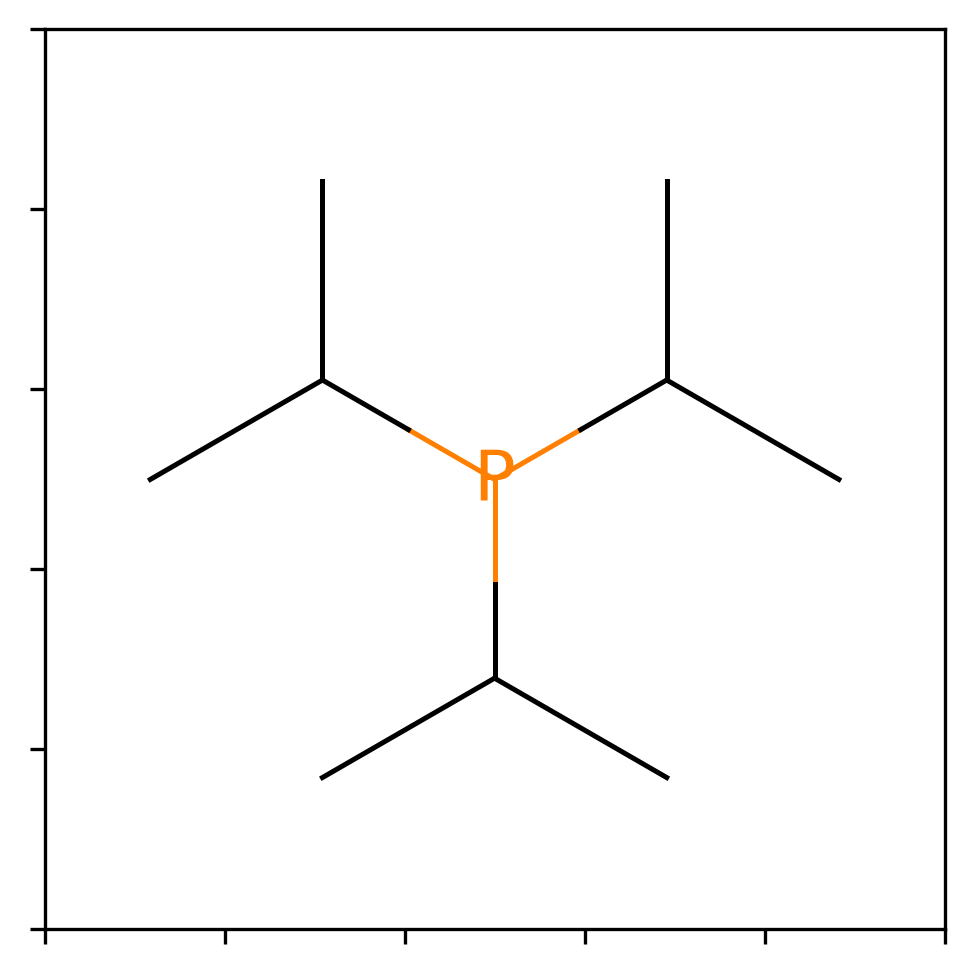

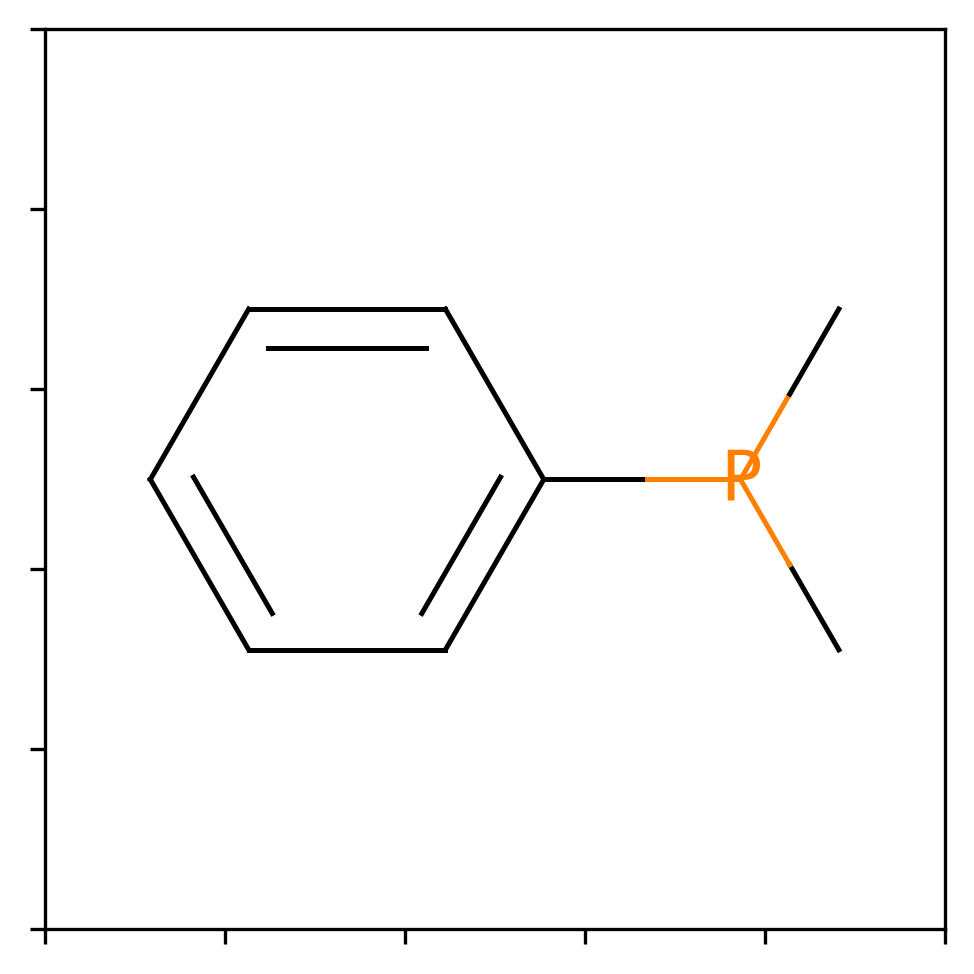

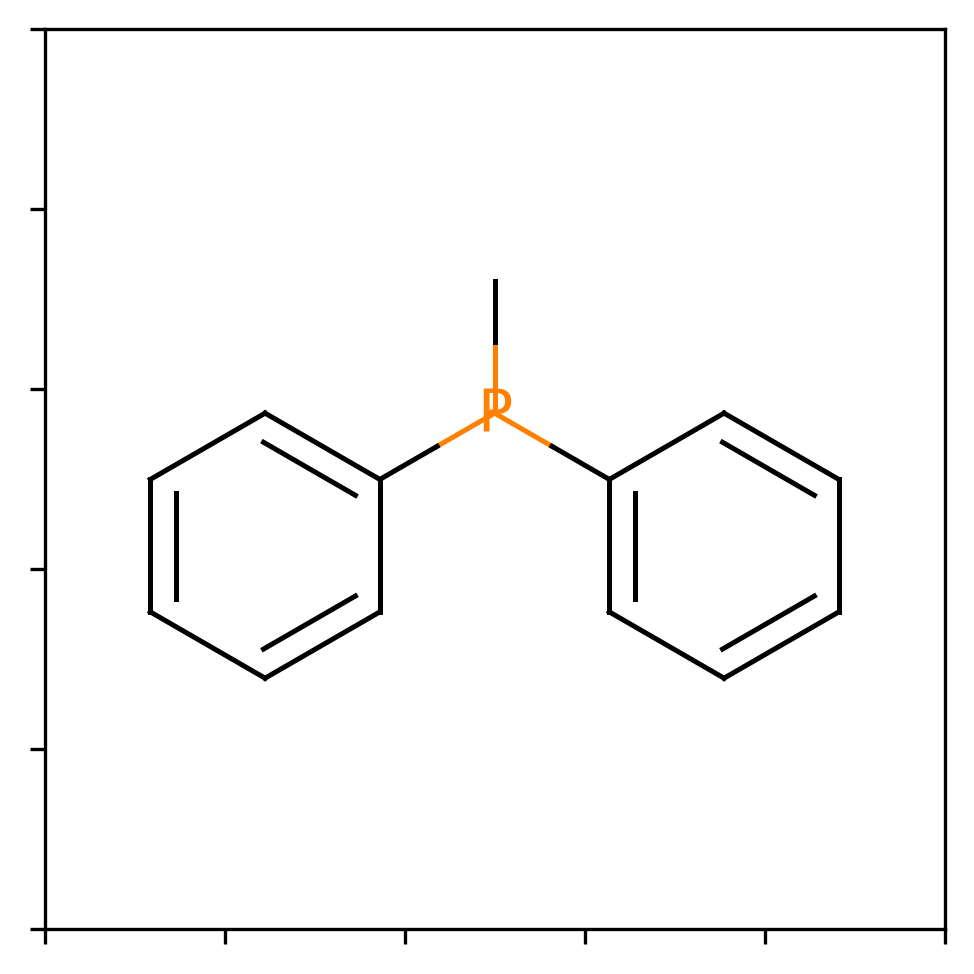

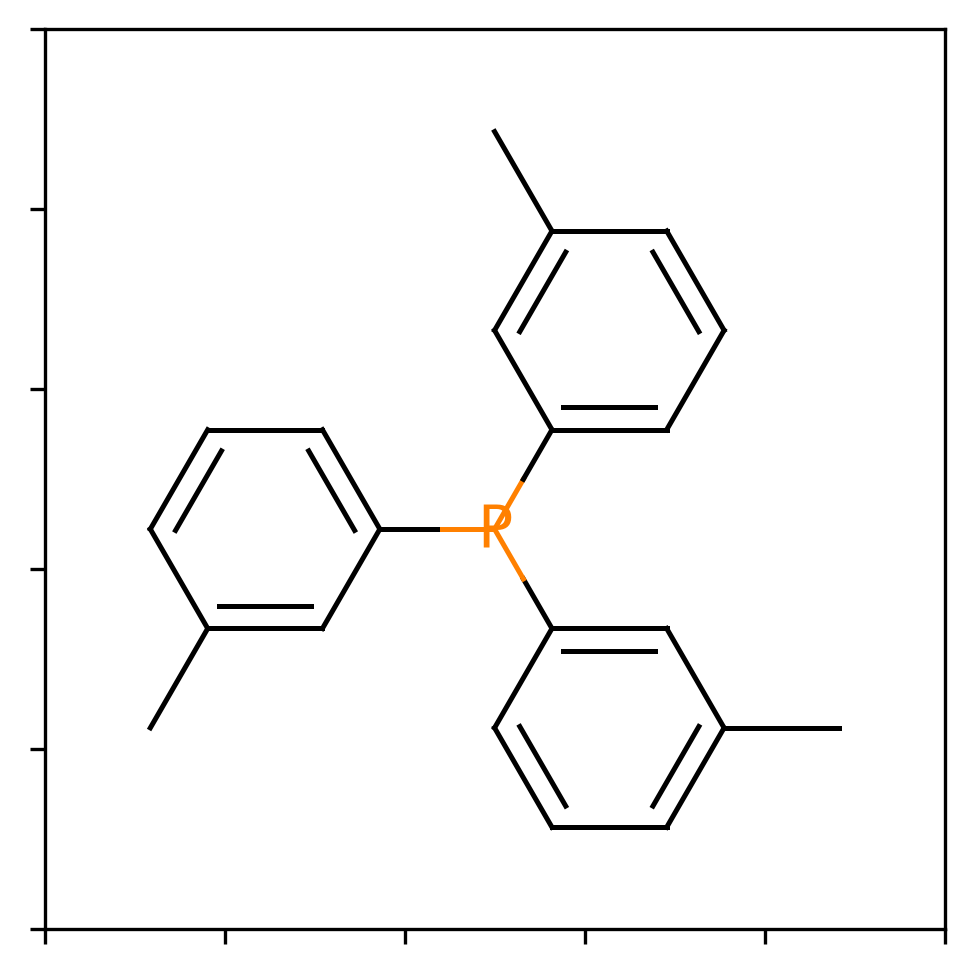

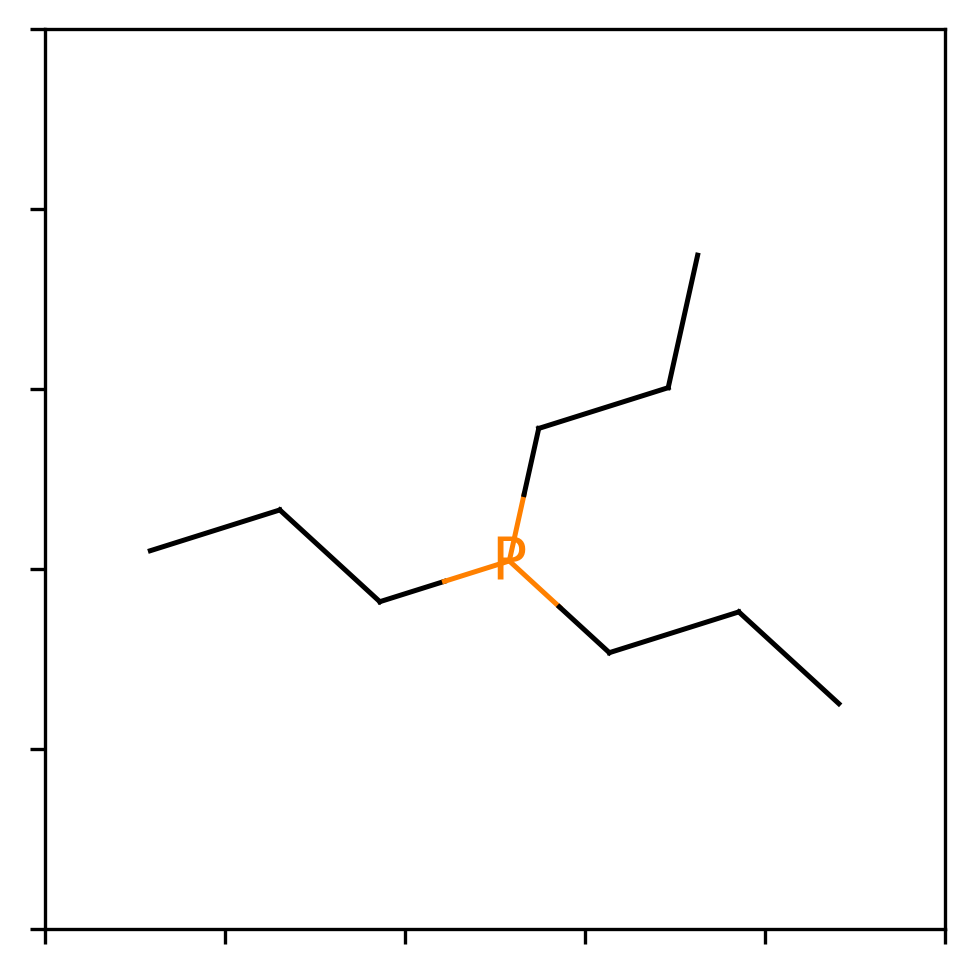

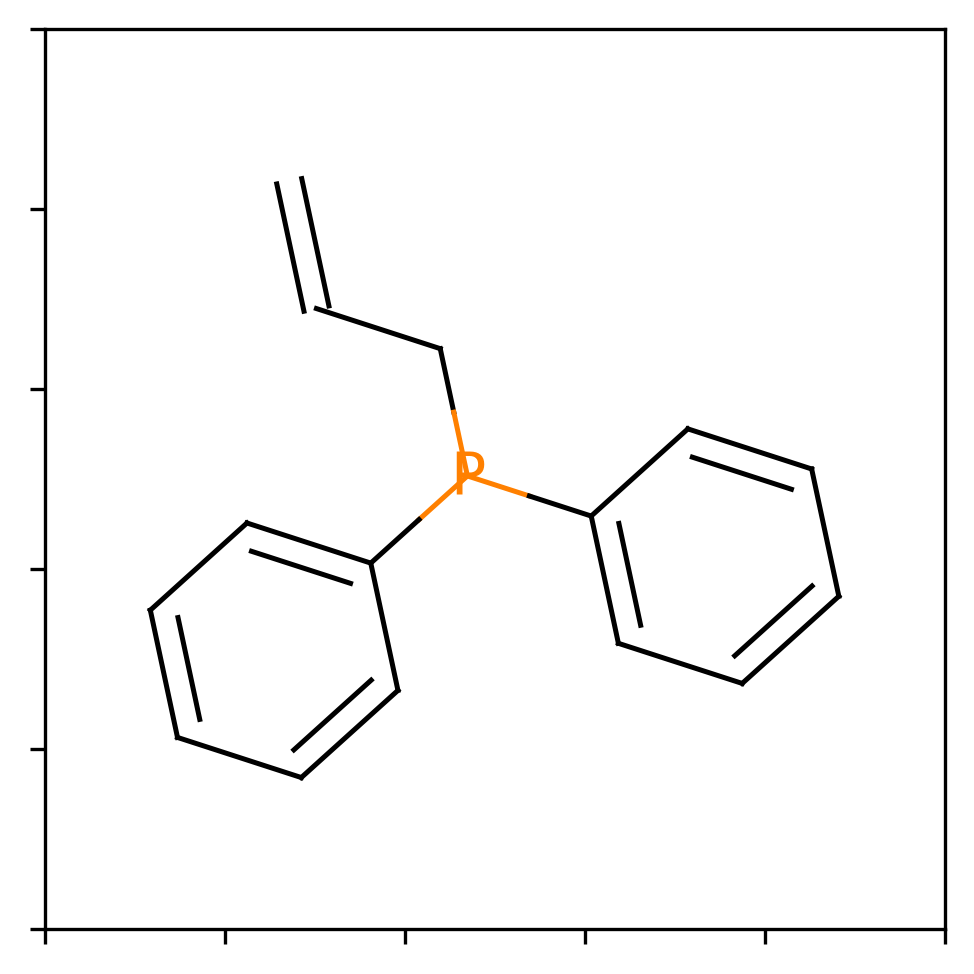

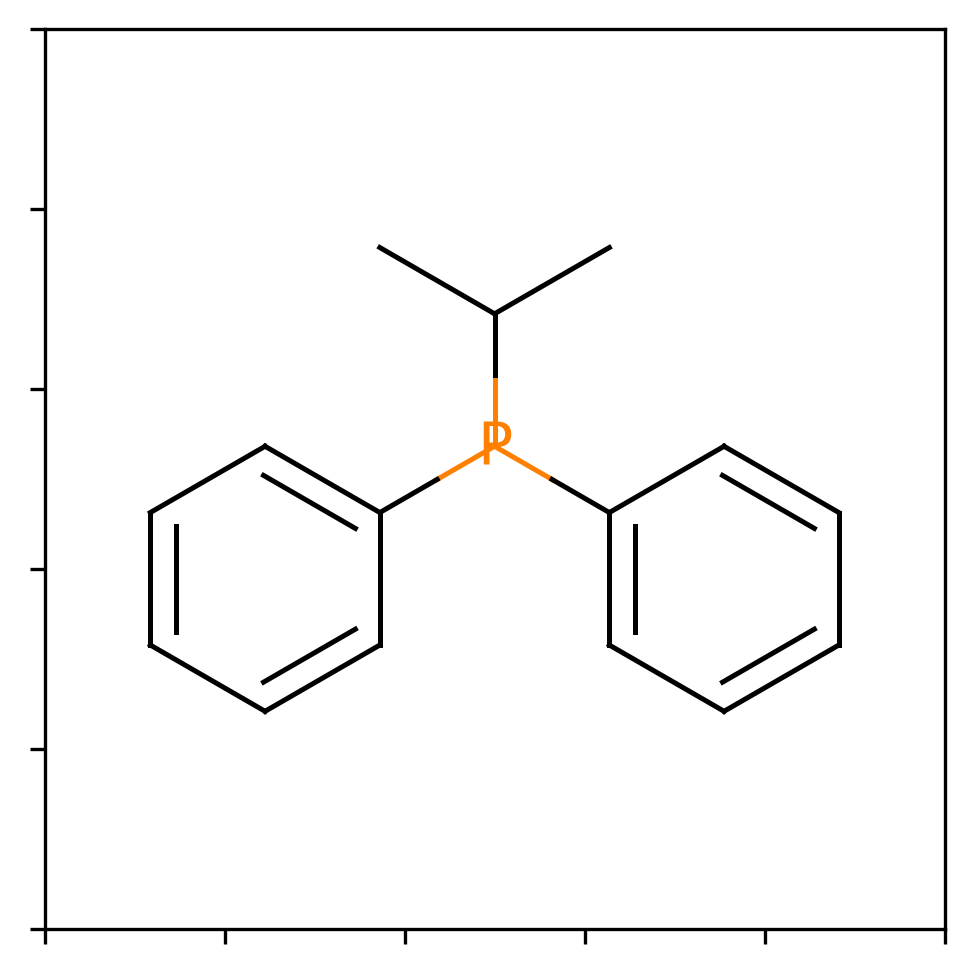

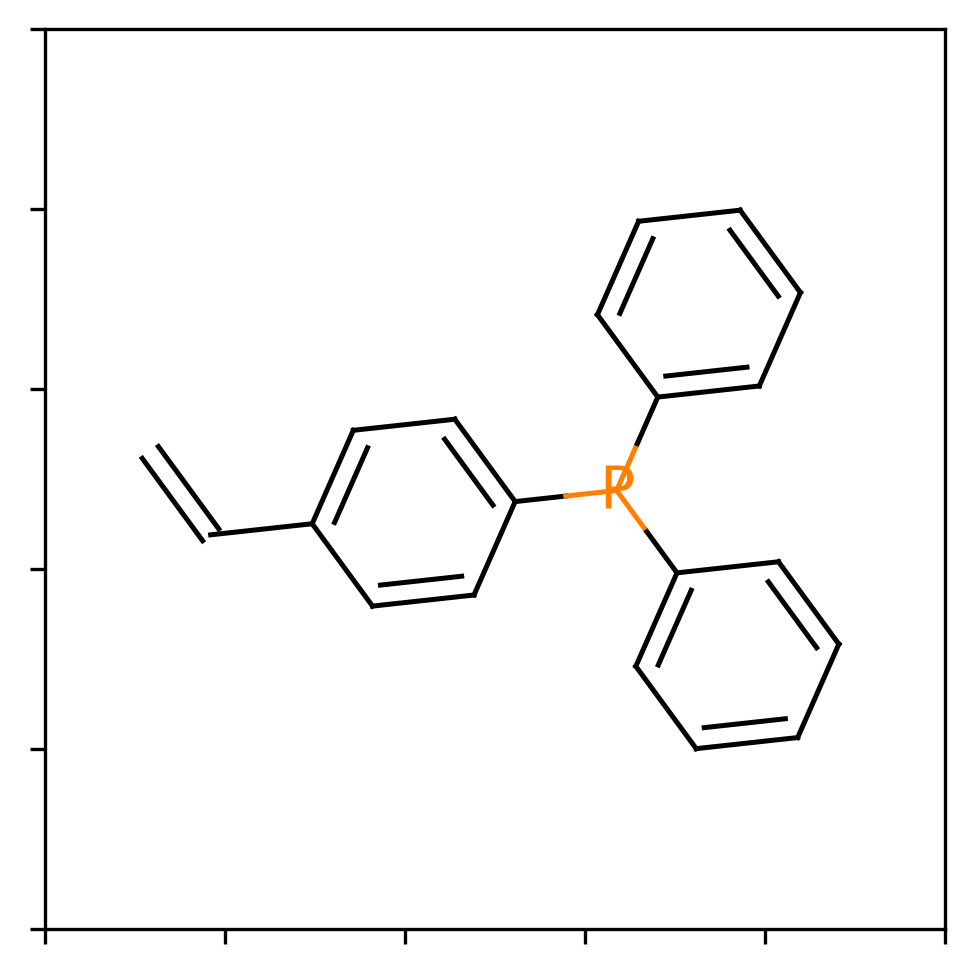

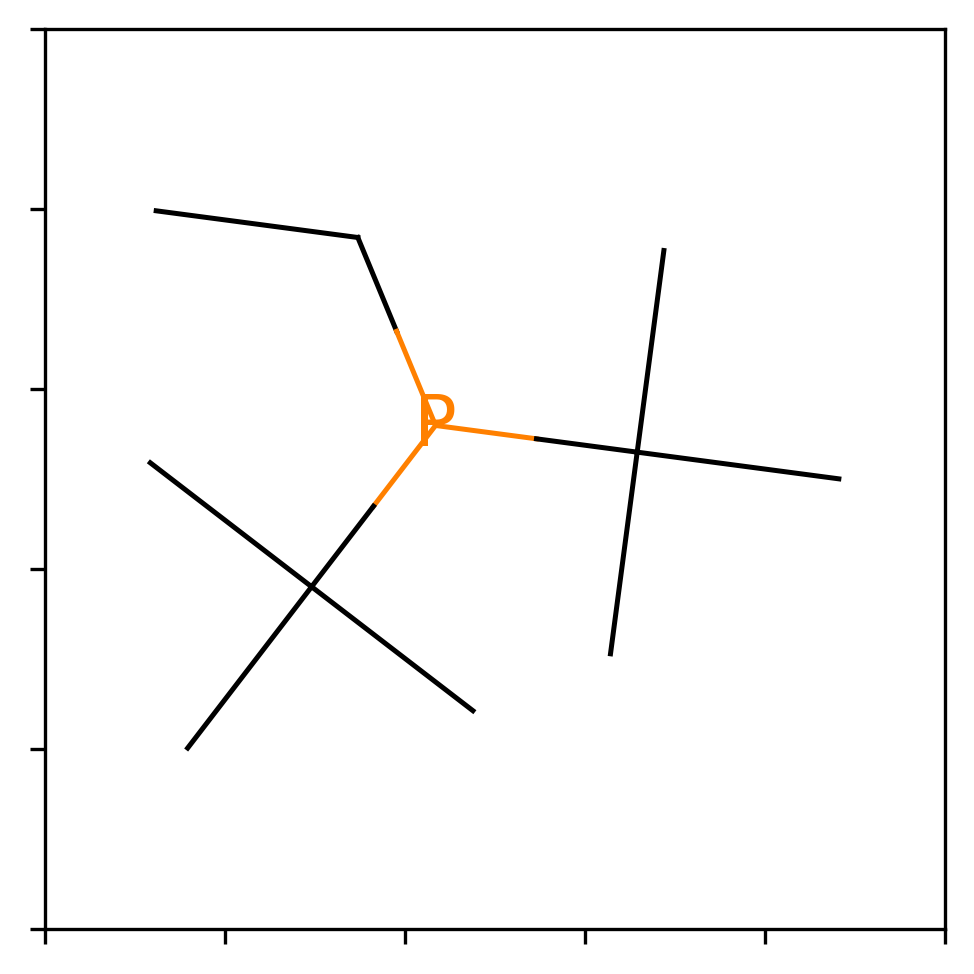

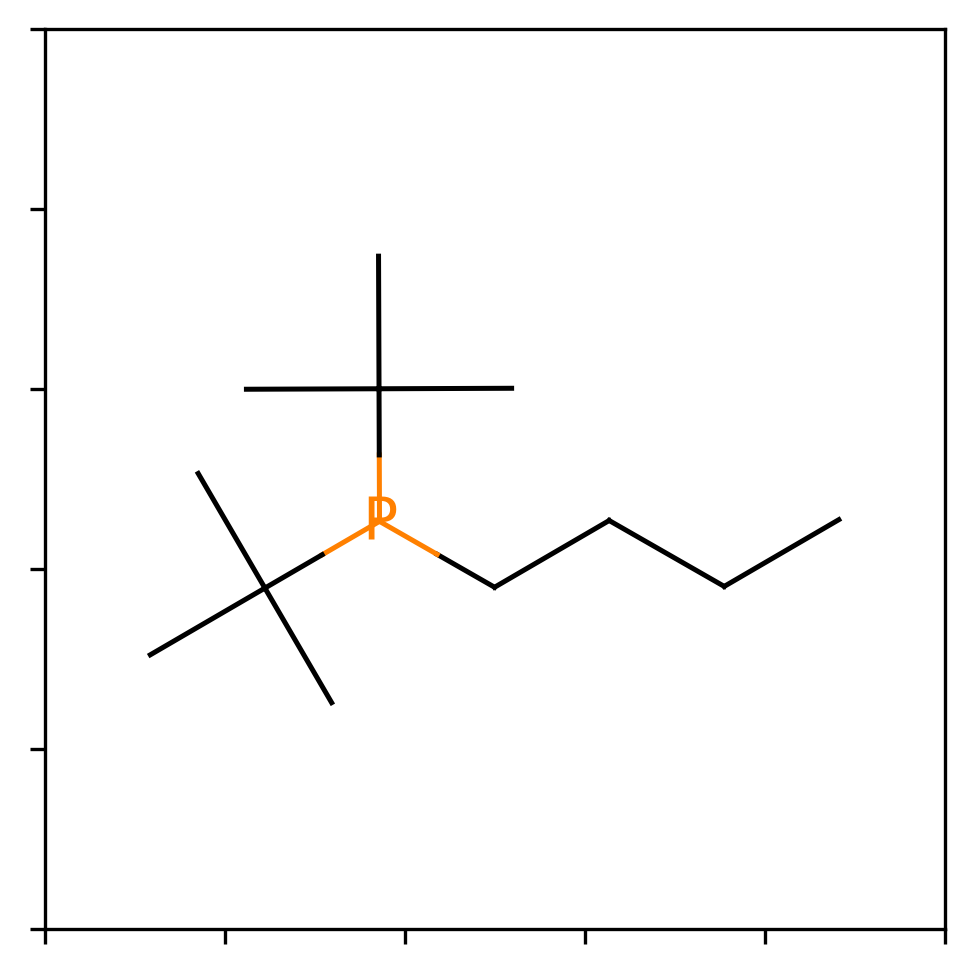

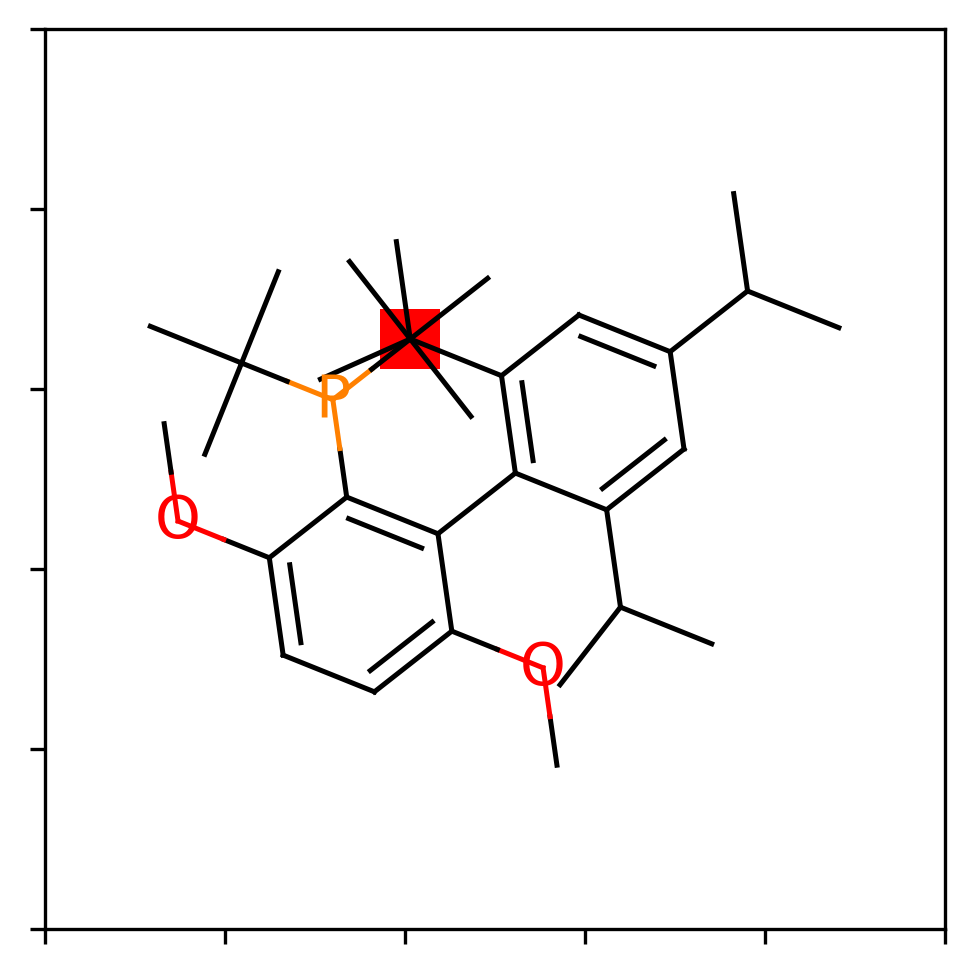

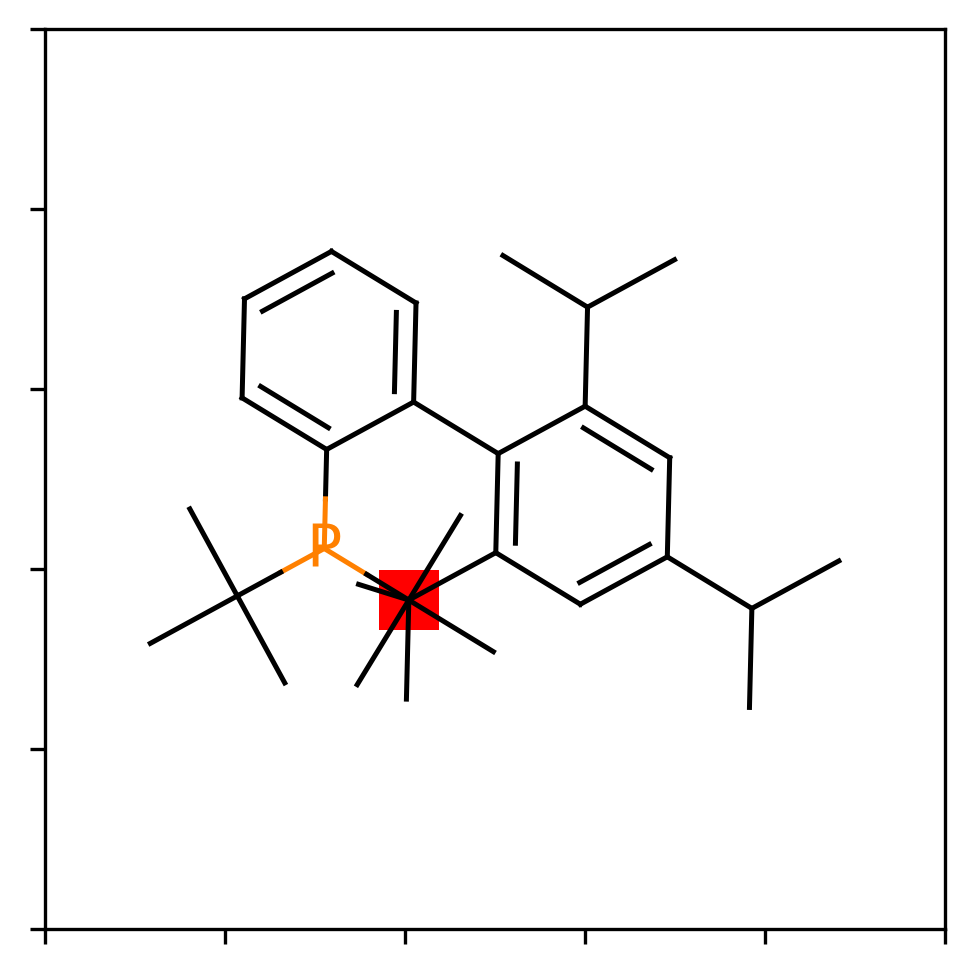

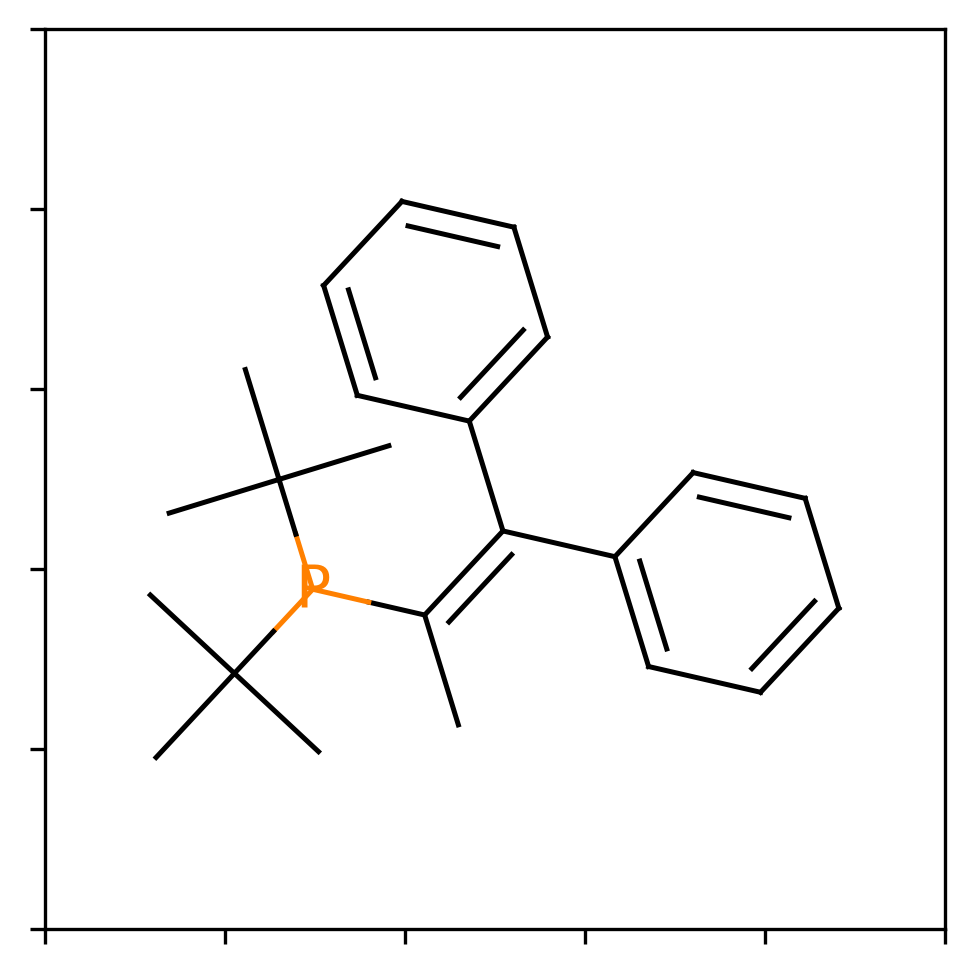

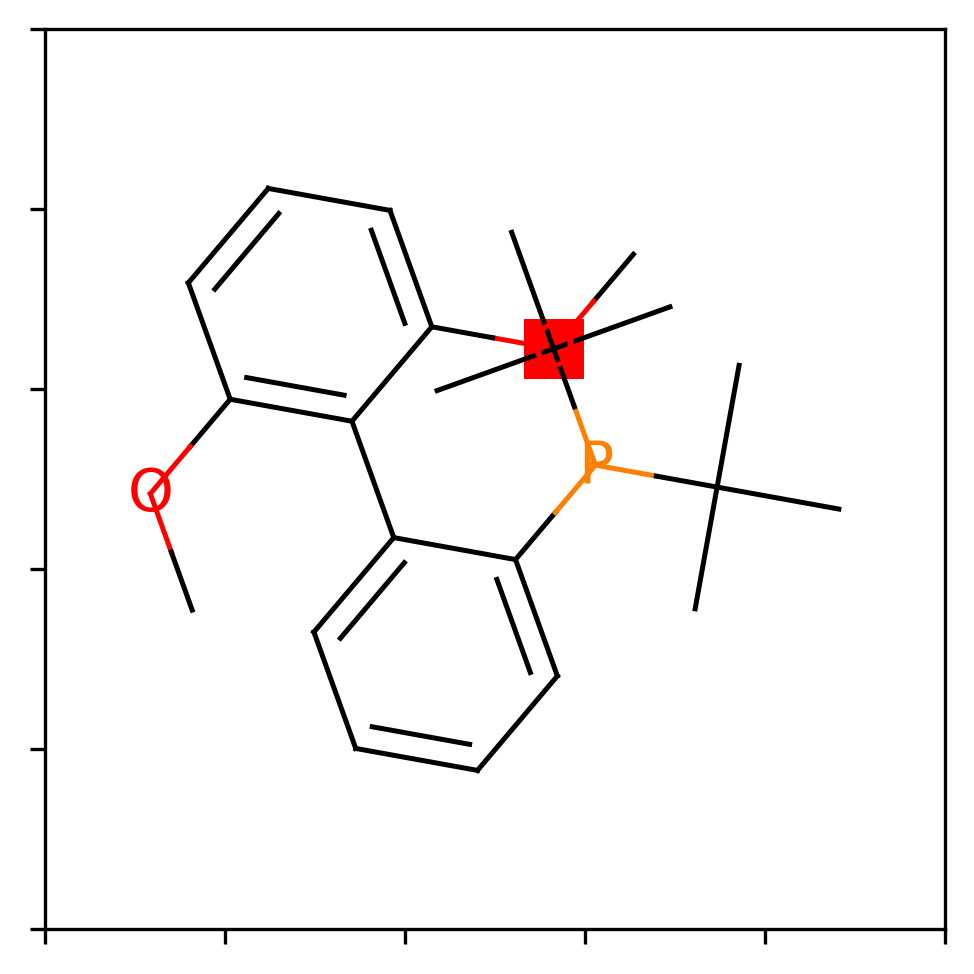

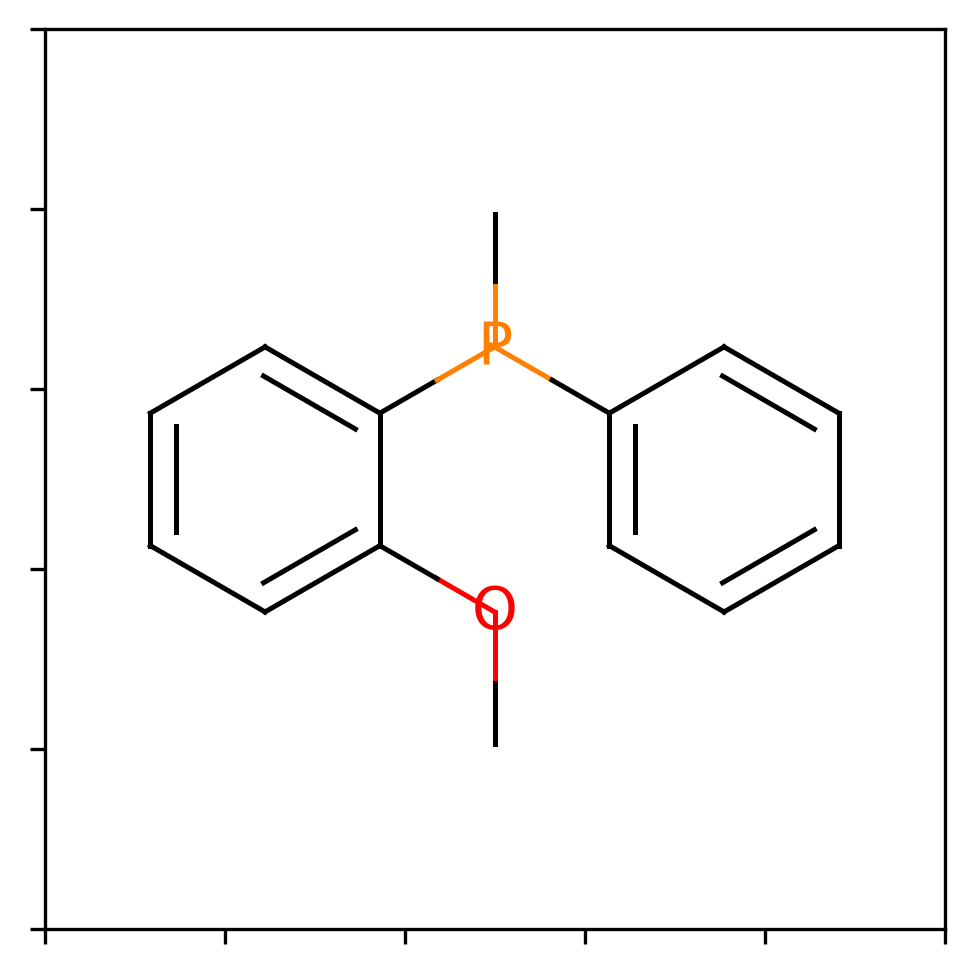

Error in callback <function flush_figures at 0x7feddbe988b0> (for post_execute):


KeyboardInterrupt: 

In [10]:
for i in range(len(smiles_com)):
    size = (120, 120)
    m = Chem.MolFromSmiles(smiles_com[i])
    fig = Draw.MolToMPL(m, size=size)


In [11]:
com_cone_all = []
smiles_com_all = []
com_E_all = []
com_vbur1_all = []
com_vbur2_all = []
zones_all = []

In [13]:
#ZONE 1
# Filter ligands from E(.21-.26) and cone angle(115-140)

for i in range(len(smiles_com)):
    if (115 <= com_cone[i] <= 140) & (0.21 <= com_E[i] <= 0.26):
        print(smiles_com[i])
        print('cone angle:',com_cone[i],)
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z1')

Cc1cp(-c2ccccc2)cc1C
cone angle: 133.138640916701
E: 0.22381 

C(#CP(C#Cc1ccccc1)c1ccccc1)c1ccccc1
cone angle: 130.57780984948
E: 0.211773081 



In [24]:
com_E_all

[0.22381, 0.211773081, 0.233734937, 0.237220142, 0.231713616]

In [14]:
#ZONE 2


for i in range(len(smiles_com)):
    if (170 <= com_cone[i] <= 200) & (0.23 <= com_E[i] <= 0.26):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z2')

CCN(CC)P(c1ccccc1)N(CC)CC
cone angle: 187.361710356174
E: 0.233734937 

Cc1cccc(P(c2cccc(C)c2C)c2cccc(C)c2C)c1C
cone angle: 194.407258400536
E: 0.237220142 

COc1ccccc1P(c1ccccc1)c1ccccc1OC
cone angle: 190.817273261422
E: 0.231713616 



In [15]:
#ZONE 3


for i in range(len(smiles_com)):
    if (170 <= com_cone[i] <= 250) & (0.205 <= com_E[i] <= 0.229):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z3')

COc1cccc(OC)c1-c1ccccc1P(C1CCCCC1)C1CCCCC1
cone angle: 233.115763052694
E: 0.209768238 

CC(C)c1cc(C(C)C)c(-c2ccccc2P(c2ccccc2)c2ccccc2)c(C(C)C)c1
cone angle: 245.633986228114
E: 0.224142295 

CN(C)c1ccc(P(C2CCCCC2)C2CCCCC2)cc1
cone angle: 192.652750321221
E: 0.206675558 

C1CCC(P(C2CCCC2)C2CCCC2)C1
cone angle: 178.362005523606
E: 0.210249773 

Cc1cc(C)c(P(c2ccccc2)c2ccccc2)c(C)c1
cone angle: 189.124220935897
E: 0.22745 

CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)C2CCCC2)cc(C(C)(C)C)c1
cone angle: 188.157163888899
E: 0.209038664 

c1ccc(-c2ccccc2P(c2ccccc2)c2ccccc2)cc1
cone angle: 199.812821369341
E: 0.220249089 

Clc1ccccc1P(c1ccccc1)c1ccccc1Cl
cone angle: 187.683376825486
E: 0.211124023 

CCN(CC)P(CC)N(CC)CC
cone angle: 183.681449723179
E: 0.213216746 

COc1ccc2ccccc2c1-c1c(P(c2ccccc2)c2ccccc2)ccc2ccccc12
cone angle: 238.073897406848
E: 0.225665497 

c1ccc2c(P(c3cccc4ccccc34)c3cccc4ccccc34)cccc2c1
cone angle: 199.893770672398
E: 0.228840975 

Brc1ccccc1P(c1ccccc1)c1ccccc1
cone angl

In [16]:
#ZONE 4


for i in range(len(smiles_com)):
    if (210 <= com_cone[i] <= 250) & (0.221 <= com_E[i] <= 0.26):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z4')

COc1cccc(OC)c1-c1ccccc1P(c1ccccc1)c1ccccc1
cone angle: 225.612021499661
E: 0.230351075 

CC(C)c1cc(C(C)C)c(-c2ccccc2P(c2ccccc2)c2ccccc2)c(C(C)C)c1
cone angle: 245.633986228114
E: 0.224142295 

COc1cc(OC)c(P(c2c(OC)cc(OC)cc2OC)c2c(OC)cc(OC)cc2OC)c(OC)c1
cone angle: 217.349465378233
E: 0.24683782 

COc1cccc(OC)c1P(c1c(OC)cccc1OC)c1c(OC)cccc1OC
cone angle: 218.019209578443
E: 0.24801249 

Cc1cc(C)c(P(c2c(C)cc(C)cc2C)c2c(C)cc(C)cc2C)c(C)c1
cone angle: 226.302970039311
E: 0.24855 

Cc1ccc(P(c2ccc(C)cc2C)c2ccc(C)cc2C)c(C)c1
cone angle: 210.490742497097
E: 0.238293402 

COc1ccc2ccccc2c1-c1c(P(c2ccccc2)c2ccccc2)ccc2ccccc12
cone angle: 238.073897406848
E: 0.225665497 

C(=C\P(/C=C\c1cccs1)/C=C\c1cccs1)\c1cccs1
cone angle: 243.444782776145
E: 0.237718811 

CN(C)c1ccccc1-c1ccccc1P(c1ccccc1)c1ccccc1
cone angle: 237.96928044416
E: 0.225553563 

c1ccc(P(c2ccccc2)c2ccc3ccccc3c2-c2nccc3ccccc23)cc1
cone angle: 218.541099282264
E: 0.223275425 

CC(C)Oc1ccc2ccccc2c1-c1c(P(c2ccccc2)c2ccccc2)ccc2ccccc12
co

In [17]:
#ZONE 5


for i in range(len(smiles_com)):
    if (110 <= com_cone[i] <= 150) & (0.181 <= com_E[i] <= 0.204):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z5')

CP(C)C
cone angle: 117.994561732252
E: 0.20119 

CCP(c1ccccc1)c1ccccc1
cone angle: 149.202076946082
E: 0.194417231 

CP(C)c1ccccc1
cone angle: 133.847369778284
E: 0.197607004 

CP(c1ccccc1)c1ccccc1
cone angle: 145.806072955774
E: 0.19825 

O=C1CCP(c2ccccc2)CC1
cone angle: 127.79520340117
E: 0.182661665 

c1ccc(P2C34C5C6C7C3[Fe]6754389%10C4C3C8C29C4%10)cc1
cone angle: 141.277522280721
E: 0.183930657 

c1ccc(P2CCCC2)cc1
cone angle: 135.732343822037
E: 0.184066348 

c1ccc(P2CCCCC2)cc1
cone angle: 129.761897446317
E: 0.196708936 

COP1OCCO1
cone angle: 140.837237785062
E: 0.195073252 

CP(C)C(C)(C)C
cone angle: 148.880863518268
E: 0.18321 

CP(C)Cc1ccccc1
cone angle: 145.574142110925
E: 0.184446558 

c1ccc(Pc2ccccc2)cc1
cone angle: 142.85040154752
E: 0.20136 

Pc1ccccc1
cone angle: 122.217675107773
E: 0.18777 

COP(OC)O[Si](C)(C)C
cone angle: 149.320630512578
E: 0.200626435 

CCC[C@H]1OP(OC)OC[C@H]1CC
cone angle: 147.596922546347
E: 0.195576402 

CCPCC
cone angle: 145.838462331129
E: 0.184

In [18]:
#ZONE 6


for i in range(len(smiles_com)):
    if (160 <= com_cone[i] <= 189) & (0.18 <= com_E[i] <= 0.20):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z6')

CP(C(C)(C)C)C(C)(C)C
cone angle: 175.391673517789
E: 0.18211 

c1ccc(CP(c2ccccc2)c2ccccc2)cc1
cone angle: 160.343072660905
E: 0.180170638 

CC(C)(C)P(c1ccccc1)C(C)(C)C
cone angle: 187.689982686053
E: 0.18062 

c1ccc(P(C2CCCCC2)C2CCCCC2)cc1
cone angle: 174.679798548167
E: 0.198602467 

CCP(CC)c1ccccc1
cone angle: 163.168102196951
E: 0.199080028 

CC(C)P(c1ccccc1)C(C)C
cone angle: 170.752211007818
E: 0.190492901 

CC(C)P(C(C)C)C(C)(C)C
cone angle: 181.29612999038
E: 0.181073685 

CC(C)P(C(C)C)C(C)C
cone angle: 176.732746385242
E: 0.19155465 

CCP(C(C)(C)C)C(C)(C)C
cone angle: 182.158328810767
E: 0.183324129 

Fc1c(F)c(F)c(P(c2ccccc2)c2ccccc2)c(F)c1F
cone angle: 168.038738430217
E: 0.18317 

CCOP(c1ccccc1)c1ccccc1
cone angle: 165.555235912694
E: 0.190069177 

CCOP(OCC)c1ccccc1
cone angle: 176.805886687364
E: 0.199112805 

c1ccc(P(c2ccccc2)C2CCCCC2)cc1
cone angle: 170.337549400936
E: 0.196931086 

CN(C)c1ccc(P(C(C)(C)C)C(C)(C)C)cc1
cone angle: 179.761252005931
E: 0.18957 

CCCCOP(c1ccccc1)

In [19]:
#ZONE 7


for i in range(len(smiles_com)):
    if (190 <= com_cone[i] <= 230) & (0.18 <= com_E[i] <= 0.20):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z7')

C1C2CC3CC1CC(P(C14CC5CC(CC(C5)C1)C4)C14CC5CC(CC(C5)C1)C4)(C2)C3
cone angle: 191.137671768411
E: 0.19322 

CC(C)(C)CP(C(C)(C)C)C(C)(C)C
cone angle: 193.519034818747
E: 0.18192 

CC(C)(C)P(C1CCCCC1)C1CCCCC1
cone angle: 196.450155505052
E: 0.183342272 

c1ccc(CP(C23CC4CC(CC(C4)C2)C3)C23CC4CC(CC(C4)C2)C3)cc1
cone angle: 199.340751473056
E: 0.196829869 

c1ccc(CP(Cc2ccccc2)Cc2ccccc2)cc1
cone angle: 196.120685233672
E: 0.18211532 

Cc1ccccc1P(C1CCCCC1)C1CCCCC1
cone angle: 205.691133569249
E: 0.199019953 

CCCCP(C(C)(C)C)C(C)(C)C
cone angle: 195.8453994096
E: 0.183732119 

c1ccc(N2CCN(c3ccccc3)P2c2ccccc2)cc1
cone angle: 205.066853281249
E: 0.18268 

CC(C)CP(C(C)(C)C)C(C)(C)C
cone angle: 197.149377469422
E: 0.183857524 

Cc1cc(C)c(P(C2CCCCC2)C2CCCCC2)c(C)c1
cone angle: 215.299958662045
E: 0.199879036 

CC(C)(C)P(N[Si](C)(C)C)C(C)(C)C
cone angle: 202.821610541558
E: 0.185660002 

Brc1ccccc1P(C1CCCCC1)C1CCCCC1
cone angle: 221.054241036652
E: 0.194292262 

CC(C)OP(C[Si](C)(C)C)OC(C)C
cone angle: 

In [20]:
#ZONE 8


for i in range(len(smiles_com)):
    if (158 <= com_cone[i] <= 170) & (0.15 <= com_E[i] <= 0.179):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z8')

CC(C)(C)P(c1ccccc1)c1ccccc1
cone angle: 162.815296454588
E: 0.17381 

c1ccc(OP(c2ccccc2)c2ccccc2)cc1
cone angle: 169.519453007875
E: 0.161784718 

ClCCP(c1ccccc1)c1ccccc1
cone angle: 160.309689217859
E: 0.178210287 

C[Si](C)(C)P(c1ccccc1)c1ccccc1
cone angle: 161.423801048635
E: 0.17077 

C[C@]12C[C@@]3(C)O[C@](C)(C[C@@](C)(O1)O3)P2c1ccccc1
cone angle: 167.069317631437
E: 0.163027956 

Cc1ccc(S(=O)(=O)N2C[C@@H]3C[C@H]2C[P@]3c2ccccc2)cc1
cone angle: 168.137579543877
E: 0.164995594 

COc1ccc([P@@]2C[C@@H]3C[C@H]2CN3S(=O)(=O)c2ccc(C)cc2)cc1
cone angle: 168.857940578894
E: 0.167756454 

Cc1ccc(S(=O)(=O)N2C[C@@H]3C[C@H]2C[P@]3c2ccc(F)cc2)cc1
cone angle: 168.777101467033
E: 0.160321665 

Cc1ccc(S(=O)(=O)N2C[C@@H]3C[C@H]2C[P@]3c2ccc3ccccc3c2)cc1
cone angle: 168.007433444875
E: 0.163677651 

C=CCP(CC=C)c1ccccc1
cone angle: 159.644866749098
E: 0.178260302 

Fc1nc(F)c(F)c(P(c2ccccc2)c2ccccc2)c1F
cone angle: 167.469973540899
E: 0.17886 

CP(c1ccccc1)c1nc(C#N)c(C#N)nc1Cl
cone angle: 159.0060233485

In [21]:
#ZONE 9


for i in range(len(smiles_com)):
    if (200 <= com_cone[i] <= 250) & (0.15 <= com_E[i] <= 0.175):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z9')

c1ccc(OCP(COc2ccccc2)COc2ccccc2)cc1
cone angle: 247.429052064922
E: 0.157847028 

C1=Cc2ccccc2C(P(c2ccccc2)C2c3ccccc3C=Cc3ccccc32)c2ccccc21
cone angle: 248.898233039363
E: 0.169098317 

CCCCOP(OCCCC)Oc1ccccc1
cone angle: 210.73299226992
E: 0.169580346 

C[C@H](c1ccccc1)N([C@H](C)c1ccccc1)P1Oc2cccc3c2C2(CC3)CCc3cccc(c32)O1
cone angle: 209.341575162144
E: 0.167858822 

CCN(CC)P1Oc2c(cc(C)cc2C(C)(C)C)Cc2cc(C)cc(C(C)(C)C)c2O1
cone angle: 236.149528508867
E: 0.169894154 

CC(C)N(C(C)C)P(OCCC#N)OCCC#N
cone angle: 238.838594268457
E: 0.166147164 

c1ccc(CC2(P(C3CCCCC3)C3CCCCC3)c3ccccc3-c3ccccc32)cc1
cone angle: 205.382810745313
E: 0.167339645 

CC(C)P(C(C)C)C1C(N(C)C)=Cc2ccccc21
cone angle: 214.521991904168
E: 0.17274341 



In [22]:
#Below E𝞂 = 0.15


for i in range(len(smiles_com)):
    if (100 <= com_cone[i] <= 300) & (0.0 <= com_E[i] <= 0.149):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z10')

CCSP(c1ccccc1)c1c(F)c(F)c(F)c(F)c1F
cone angle: 184.388717518257
E: 0.08604526 

FC(F)(F)C(F)(F)P(c1ccccc1)c1ccccc1
cone angle: 153.455146060511
E: 0.123536334 

FC(F)(F)P(C(F)(F)F)C(F)(F)F
cone angle: 141.403516117737
E: 0.06601 

CSP(SC)SC
cone angle: 169.246754780571
E: 0.058299479 

CN(c1ccccc1)P(C(Cl)(Cl)Cl)C(Cl)(Cl)Cl
cone angle: 200.474434536828
E: 0.073485772 

CCCCOP(OCCCC)C(Cl)(Cl)Cl
cone angle: 227.743455423909
E: 0.105890829 

CCOP(Oc1ccc([N+](=O)[O-])cc1)c1ccccc1
cone angle: 178.226956827815
E: 0.142330153 

O=C=NP(N=C=O)N=C=O
cone angle: 138.690105786659
E: 0.14522 

CCSP(SCC)N(CC)CC
cone angle: 203.728275145646
E: 0.07751694 

FC(F)(F)C(OP(OC(C(F)(F)F)C(F)(F)F)OC(C(F)(F)F)C(F)(F)F)C(F)(F)F
cone angle: 230.600904084629
E: 0.120791286 

CCOP(OCC)n1nc(Cl)nc1Cl
cone angle: 183.421931224896
E: 0.10585376 

CCOP(OCC)OC(C(=O)OC(C)(C)C)(C(F)(F)F)C(F)(F)F
cone angle: 214.052296000124
E: 0.134389271 

Cc1nc2ccccc2n1OP1OCC(C)([N+](=O)[O-])CO1
cone angle: 161.304583219055
E: 0.11132

In [23]:
#Zone 11


for i in range(len(smiles_com)):
    if (180 <= com_cone[i] <= 195) & (0.15 <= com_E[i] <= 0.16):
        print(smiles_com[i])
        print('cone angle:',com_cone[i])
        print('E:',com_E[i],'\n')
        com_cone_all.append(com_cone[i])
        smiles_com_all.append(smiles_com[i])
        com_E_all.append(com_E[i])
        com_vbur1_all.append(vbur1_com[i])
        com_vbur2_all.append(vbur2_com[i])
        zones_all.append('Z11')

Fc1c(F)c(F)c(P(c2c(F)c(F)c(F)c(F)c2F)c2c(F)c(F)c(F)c(F)c2F)c(F)c1F
cone angle: 180.66853972705
E: 0.15233 

Brc1ccc(N2CN(c3ccc(Br)cc3)CP(c3ccccc3)C2)cc1
cone angle: 183.092348869911
E: 0.156634254 

C1=Cc2ccccc2C(P(c2ccccc2)c2ccccc2)c2ccccc21
cone angle: 192.147940220488
E: 0.156727847 

CCOP(OCC)Oc1ccccc1Cl
cone angle: 185.320515763206
E: 0.156648538 



In [26]:
df_com = pd.DataFrame({'smiles' : smiles_com_all,
                     'E_sigma' : com_E_all,
                     'cone_angle' : com_cone_all,
                     'vbur_ovbur_min_boltz (vbur1)' : com_vbur1_all,
                     'vbur_ovtot_min_max (vbur2)' : com_vbur2_all,  
                     'zone' : zones_all})

In [27]:
writer = pd.ExcelWriter('com_all_excel_predict.xlsx', engine='xlsxwriter')

df_com.to_excel(writer, sheet_name='Sheet1', index=False)

writer.close()

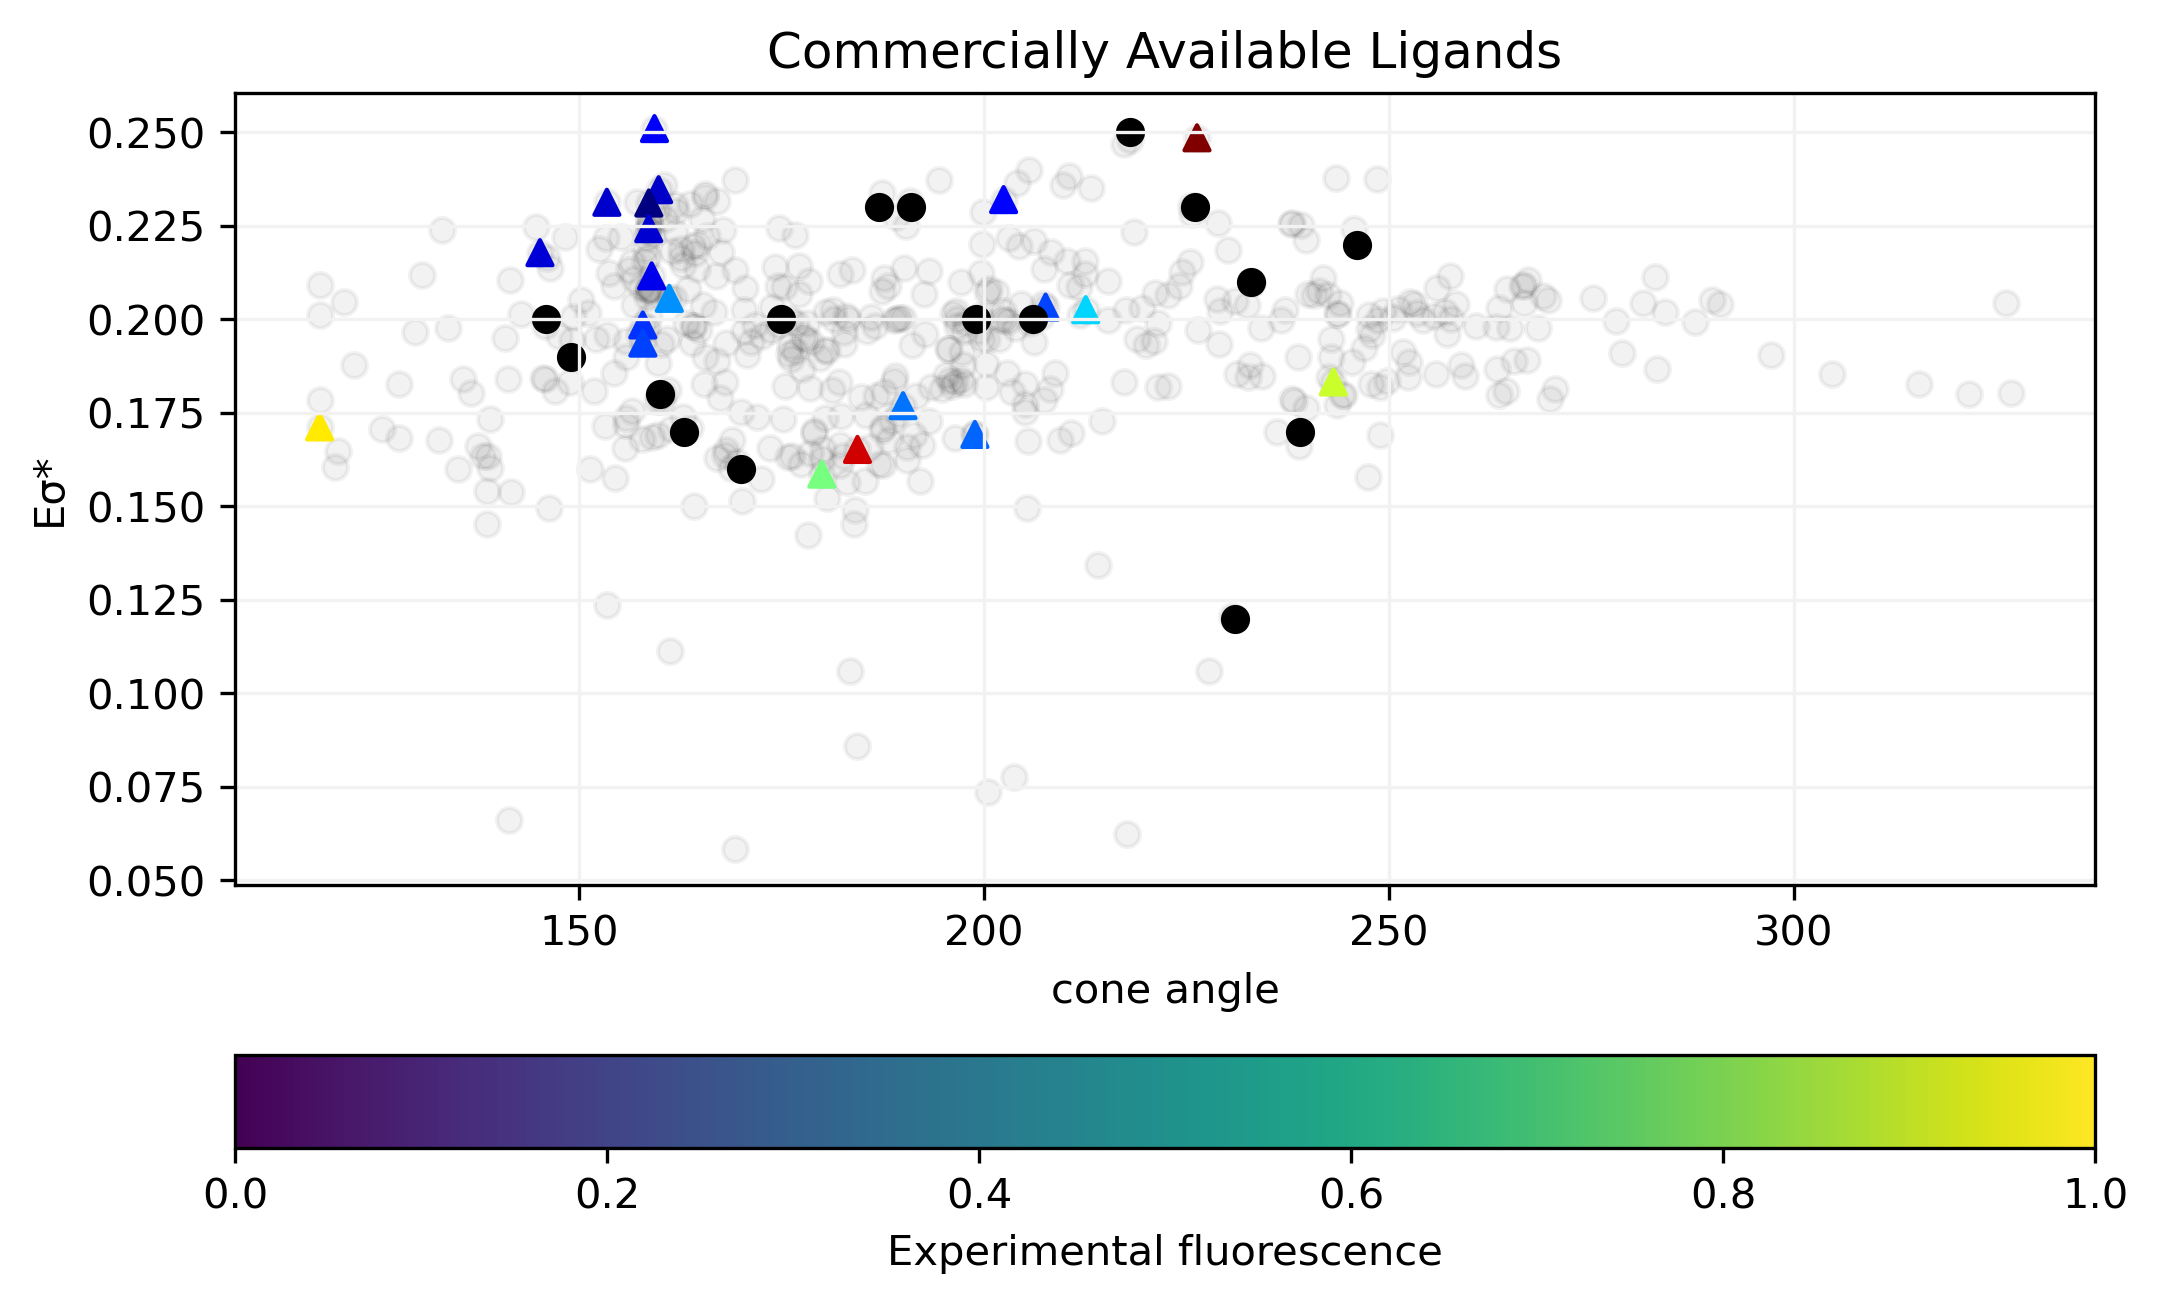

In [10]:
index = ['1','2','3','5','7','8','9','13','15','16','18','19','21','25','34','D','E','F','G','H']

# z = fluor_expr
z = [1.28,1.98,3.93,1.03,1.52,1.76,0.99,1.14,0.97,3.59,0.66,1.6,1.84,3.1,1.02,5.593258117,5.233991467,1.619285044,2.314440782,1.187104168]
# x = cone angle
x = [202.4289064,161.1591651,117.9945617,145.193538,157.8881569,198.8856236,153.454599,158.9825776,159.8444741,243.1309972,158.6354572,157.8976104,190.0126478,179.9976285,158.6208107,226.30297,184.390302,207.6134749,212.5677198,159.3299818] 
# y = nbo_bds_e_min_boltz
y = [0.232030233,0.20561503,0.17124,0.217833874,0.198499748,0.169229601,0.23131,0.21163,0.234671213,0.1832527,0.23111,0.19365,0.17692,0.158602365,0.22426,0.24855,0.165214365,0.20328868,0.202589283,0.25102] 

x_new = [191,187,233,246,226,218,149,146,175,160,199,206,163,170,239,231]
y_new = [0.23,0.23,0.21,0.22,0.23,0.25,0.19,0.20,0.20,0.18,0.20,0.20,0.17,0.16,0.17,0.12]

plt.figure(figsize=(8,5))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.scatter(com_cone,com_E, c='black',alpha=0.05)
plt.scatter(x,y,c=z,cmap='jet',marker='^')
plt.scatter(x_new,y_new,marker='o',color='black')

plt.title("Commercially Available Ligands")
plt.xlabel('cone angle')
plt.ylabel('Eσ*')
plt.grid(True,linestyle='-',color='0.95')
plt.colorbar(label="Experimental fluorescence", orientation="horizontal")
plt.show()